I. General Insights


In [1]:
library('data.table') # data manipulation
library('tibble') # data wrangling
## #Loading Data
reserve.air <- as.tibble(fread('/home/kautu/Downloads/Recruit/air_reserve.csv'))
reserve.hpg <- as.tibble(fread('/home/kautu/Downloads/Recruit/hpg_reserve.csv'))

store.air <- as.tibble(fread('/home/kautu/Downloads/Recruit/air_store_info.csv'))
store.hpg <- as.tibble(fread('/home/kautu/Downloads/Recruit/hpg_store_info.csv'))
store.cross <- as.tibble(fread('/home/kautu/Downloads/Recruit/store_id_relation.csv'))

date.info <- as.tibble(fread('/home/kautu/Downloads/Recruit/date_info.csv'))

visitor <- as.tibble(fread('/home/kautu/Downloads/Recruit/air_visit_data.csv'))
visitor.test <- as.tibble(fread('/home/kautu/Downloads/Recruit/sample_submission.csv'))

Read 2000320 rows and 4 (of 4) columns from 0.118 GB file in 00:00:03


In [5]:
str(store.cross)

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	150 obs. of  2 variables:
 $ air_store_id: chr  "air_63b13c56b7201bd9" "air_a24bf50c3e90d583" "air_c7f78b4f3cba33ff" "air_947eb2cae4f3e8f2" ...
 $ hpg_store_id: chr  "hpg_4bc649e72e2a239a" "hpg_c34b496d0305a809" "hpg_cd8ae0d9bbd58ff9" "hpg_de24ea49dc25d6b8" ...
 - attr(*, ".internal.selfref")=<externalptr> 


In [13]:
str(visitor.test)

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	32019 obs. of  2 variables:
 $ id      : chr  "air_00a91d42b08b08d9_2017-04-23" "air_00a91d42b08b08d9_2017-04-24" "air_00a91d42b08b08d9_2017-04-25" "air_00a91d42b08b08d9_2017-04-26" ...
 $ visitors: int  0 0 0 0 0 0 0 0 0 0 ...
 - attr(*, ".internal.selfref")=<externalptr> 


In [67]:
#Collecting store_id from the previous tibbles
set.reserve.air <- reserve.air$air_store_id[!duplicated(reserve.air$air_store_id)] 
set.store.air <- store.air$air_store_id[!duplicated(store.air$air_store_id)] 
set.cross.air <- store.cross$air_store_id[!duplicated(store.cross$air_store_id)] 

set.reserve.hpg <- reserve.hpg$hpg_store_id[!duplicated(reserve.hpg$hpg_store_id)] 
set.store.hpg <- store.hpg$hpg_store_id[!duplicated(store.hpg$hpg_store_id)] 
set.cross.hpg <- store.cross$hpg_store_id[!duplicated(store.cross$hpg_store_id)]


set.visitor <- visitor$air_store_id[!duplicated(visitor$air_store_id)]

test.substr <- substr(visitor.test$id, 0, 20)  #Reformating structure of the sample submission
set.visitor.test <- test.substr[!duplicated(test.substr)] 

In [3]:
head(set.visitor)
head(set.visitor.test)

[1] "air_ba937bf13d40fb24" "air_25e9888d30b386df" "air_8e4360a64dbd4c50"
[4] "air_35512c42db0868da" "air_a271c9ba19e81d17" "air_fd6aac1043520e83"

[1] "air_00a91d42b08b08d9" "air_0164b9927d20bcc3" "air_0241aa3964b7f861"
[4] "air_0328696196e46f18" "air_034a3d5b40d5b1b1" "air_036d4f1ee7285390"

In [32]:
library('VennDiagram')
#sketches from Venn Diagram

venn.plot <- venn.diagram(list(Reservation = set.reserve.air, 
                               Store = set.store.air, 
                               Cross = set.cross.air, 
                               Visitor = set.visitor),
                          resolution = 350,
                          imagetype = "tiff", 
                          alpha = c(0.5, 0.5, 0.5, 0.5),
                          fill = c("red", "yellow", "blue", "green"), 
                          cat.fontface = 4, 
                          fontfamily = 3, 
                          filename = "VennDiagram.tif")

air.venn.plot <- venn.diagram(list(Reservation = set.reserve.air, 
                                   Store = set.store.air, 
                                   HPG = set.cross.air),
                             resolution = 350,
                             imagetype = "tiff", 
                             alpha = c(0.5, 0.5, 0.5),
                             fill = c("#E9B54B", "#5EC9E9", "#D80c28"), 
                             main.fontface = "plain",
                             main.fontfamily = "serif",
                             main = "Air REGI Venn Diagram", 
                             filename = "VennAir.tif") 

hpg.venn.plot <- venn.diagram(list(Reservation = set.reserve.hpg, 
                                   Store = set.store.hpg, 
                                   Air = set.cross.hpg),
                             resolution = 350,
                             imagetype = "tiff", 
                             alpha = c(0.5, 0.5, 0.5),
                             fill = c("#AE2D5B", "#C90d06", "#31A5ED"), 
                             main.fontface = "plain",
                             main.fontfamily = "serif",
                             main = "Hot Pepper Gourmet Venn Diagram", 
                             filename = "Vennhpg.tif") 

test.venn.plot <- venn.diagram(list(Visitor = set.visitor, 
                                    Test = set.visitor.test),
                              resolution = 350,
                              imagetype = "tiff", 
                              alpha = c(0.5, 0.5),
                              fill = c("#EBBF79", "#CCC5D2"), 
                              main.fontface = "plain",
                              main.fontfamily = "serif",
                              main = "Visitor and Test Set Venn Diagram", 
                              filename = "Venntest.tif") 

II. Data Preprocessing
 Resevation Featuring

In [4]:
str(reserve.hpg)

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	2000320 obs. of  4 variables:
 $ hpg_store_id    : chr  "hpg_c63f6f42e088e50f" "hpg_dac72789163a3f47" "hpg_c8e24dcf51ca1eb5" "hpg_24bb207e5fd49d4a" ...
 $ visit_datetime  : chr  "2016-01-01 11:00:00" "2016-01-01 13:00:00" "2016-01-01 16:00:00" "2016-01-01 17:00:00" ...
 $ reserve_datetime: chr  "2016-01-01 09:00:00" "2016-01-01 06:00:00" "2016-01-01 14:00:00" "2016-01-01 11:00:00" ...
 $ reserve_visitors: int  1 3 2 5 13 2 2 2 2 6 ...
 - attr(*, ".internal.selfref")=<externalptr> 


In [2]:
library('dplyr') # data manipulation
library('lubridate') # date and time

#Preprocessing
reserve.hpg <- reserve.hpg %>%
  mutate(visit_date = ymd(substr(visit_datetime, 0, 10)),
         visit_time = as.numeric(substr(visit_datetime, 11, 13)),
         reserve_date = ymd(substr(reserve_datetime, 0, 10)),
         visit_datetime = ymd_hms(visit_datetime),
         reserve_datetime = ymd_hms(reserve_datetime),
         duration_day = as.numeric(difftime(visit_date, reserve_date, units = c("days"))),
         duration_hour = as.numeric(difftime(visit_datetime, reserve_datetime, units = c("hours")))) 

head(reserve.hpg)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:data.table’:

    between, first, last

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘lubridate’

The following objects are masked from ‘package:data.table’:

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year

The following object is masked from ‘package:base’:

    date



hpg_store_id         visit_datetime      reserve_datetime    reserve_visitors
1 hpg_c63f6f42e088e50f 2016-01-01 11:00:00 2016-01-01 09:00:00  1              
2 hpg_dac72789163a3f47 2016-01-01 13:00:00 2016-01-01 06:00:00  3              
3 hpg_c8e24dcf51ca1eb5 2016-01-01 16:00:00 2016-01-01 14:00:00  2              
4 hpg_24bb207e5fd49d4a 2016-01-01 17:00:00 2016-01-01 11:00:00  5              
5 hpg_25291c542ebb3bc2 2016-01-01 17:00:00 2016-01-01 03:00:00 13              
6 hpg_28bdf7a336ec6a7b 2016-01-01 17:00:00 2016-01-01 15:00:00  2              
  visit_date visit_time reserve_date duration_day duration_hour
1 2016-01-01 11         2016-01-01   0             2           
2 2016-01-01 13         2016-01-01   0             7           
3 2016-01-01 16         2016-01-01   0             2           
4 2016-01-01 17         2016-01-01   0             6           
5 2016-01-01 17         2016-01-01   0            14           
6 2016-01-01 17         2016-01-01   0             2

In [3]:
summary(reserve.hpg)

 hpg_store_id       visit_datetime                reserve_datetime             
 Length:2000320     Min.   :2016-01-01 11:00:00   Min.   :2016-01-01 00:00:00  
 Class :character   1st Qu.:2016-06-26 19:00:00   1st Qu.:2016-06-21 12:00:00  
 Mode  :character   Median :2016-11-19 20:00:00   Median :2016-11-10 20:00:00  
                    Mean   :2016-10-15 06:55:20   Mean   :2016-10-07 19:57:59  
                    3rd Qu.:2017-02-03 19:00:00   3rd Qu.:2017-01-27 13:00:00  
                    Max.   :2017-05-31 23:00:00   Max.   :2017-04-22 23:00:00  
 reserve_visitors    visit_date          reserve_date         duration_day    
 Min.   :  1.000   Min.   :2016-01-01   Min.   :2016-01-01   Min.   :  0.000  
 1st Qu.:  2.000   1st Qu.:2016-06-26   1st Qu.:2016-06-21   1st Qu.:  2.000  
 Median :  3.000   Median :2016-11-19   Median :2016-11-10   Median :  4.000  
 Mean   :  5.074   Mean   :2016-10-14   Mean   :2016-10-07   Mean   :  7.345  
 3rd Qu.:  6.000   3rd Qu.:2017-02-03   3rd Q

In [3]:
library('tidyr') # data wrangling

date.info <- date.info %>%
  mutate(calendar_date = ymd(calendar_date))

dayorder.hpg <- reserve.hpg %>%
  group_by(hpg_store_id, visit_date) %>%
  filter(duration_day == 0) %>%
  transmute(dayorder_counts = n()) %>%
  unite(hsi_vd, hpg_store_id, visit_date, sep = "_", remove = TRUE)

reservation.hpg <- reserve.hpg %>%
  group_by(hpg_store_id, visit_date) %>%
  summarise(visitors = sum(reserve_visitors), 
            visitors_mean = mean(reserve_visitors),
            order_counts = n(), 
            visit_time = mean(visit_time),
            sum_dday = sum(duration_day),
            mean_dday = mean(duration_day),
            sum_dhour = sum(duration_hour),
            mean_dhour = mean(duration_hour)) 

reservation.hpg <- reservation.hpg %>%
  left_join(date.info, by = c("visit_date" = "calendar_date")) %>%
  unite(hsi_vd, hpg_store_id, visit_date, remove = FALSE) %>%
  left_join(dayorder.hpg, by = "hsi_vd")

reservation.hpg <- subset(reservation.hpg, select = -hsi_vd)

head(reservation.hpg)

Adding missing grouping variables: `hpg_store_id`, `visit_date`


hpg_store_id         visit_date visitors visitors_mean order_counts
1 hpg_001112ef76b9802c 2016-02-26  9        9            1           
2 hpg_001112ef76b9802c 2016-03-17  3        3            1           
3 hpg_001112ef76b9802c 2016-03-31  5        5            1           
4 hpg_001112ef76b9802c 2016-04-05 13       13            1           
5 hpg_001112ef76b9802c 2016-04-18  9        9            1           
6 hpg_001112ef76b9802c 2016-07-05  3        3            1           
  visit_time sum_dday mean_dday sum_dhour mean_dhour day_of_week holiday_flg
1 19         17       17        414       414        Friday      0          
2 19         14       14        336       336        Thursday    0          
3 18          6        6        143       143        Thursday    0          
4 18          4        4        104       104        Tuesday     0          
5 17          3        3         77        77        Monday      0          
6 18         11       11        269       269        Tuesday     0          
  dayorder_counts
1 NA             
2 NA             
3 NA             
4 NA             
5 NA             
6 NA

In [6]:
summary(reservation.hpg)

 hpg_store_id         visit_date            visitors       visitors_mean    
 Length:1373989     Min.   :2016-01-01   Min.   :  1.000   Min.   :  1.000  
 Class :character   1st Qu.:2016-06-14   1st Qu.:  3.000   1st Qu.:  2.000  
 Mode  :character   Median :2016-10-29   Median :  5.000   Median :  3.667  
                    Mean   :2016-10-05   Mean   :  7.561   Mean   :  5.164  
                    3rd Qu.:2017-01-30   3rd Qu.:  9.000   3rd Qu.:  6.000  
                    Max.   :2017-05-31   Max.   :334.000   Max.   :100.000  
                                                                            
  order_counts       sum_dday         mean_dday         sum_dhour      
 Min.   : 1.000   Min.   :   0.00   Min.   :  0.000   Min.   :    0.0  
 1st Qu.: 1.000   1st Qu.:   2.00   1st Qu.:  2.000   1st Qu.:   55.0  
 Median : 1.000   Median :   6.00   Median :  4.500   Median :  145.0  
 Mean   : 1.505   Mean   :  10.79   Mean   :  7.061   Mean   :  263.2  
 3rd Qu.: 2.000   3rd Qu

In [5]:
holiday.hpg <- reservation.hpg %>%
  filter(holiday_flg == 1) %>%
  group_by(hpg_store_id) %>%
  summarise(holiday_visitors = sum(visitors),
            holiday_visitors_mean = mean(visitors_mean),
            holiday_order_counts = sum(order_counts),
            holiday_order_counts_mean = mean(order_counts),
            holiday_visit_time = mean(visit_time),
            holiday_dayorder_counts = mean(dayorder_counts),
            holiday_sum_dday = sum(sum_dday),
            holiday_mean_dday = mean(mean_dday),
            holiday_sum_dhour = sum(sum_dhour),
            holiday_mean_dhour = mean(mean_dhour))

sunday.hpg <- reservation.hpg %>%
  filter(holiday_flg == 0) %>%
  filter(day_of_week == "Sunday") %>%
  group_by(hpg_store_id) %>%
  summarise(sunday_visitors = sum(visitors),
            sunday_visitors_mean = mean(visitors_mean),
            sunday_order_counts = sum(order_counts),
            sunday_order_counts_mean = mean(order_counts),
            sunday_visit_time = mean(visit_time),
            sunday_dayorder_counts = mean(dayorder_counts),
            sunday_sum_dday = sum(sum_dday),
            sunday_mean_dday = mean(mean_dday),
            sunday_sum_dhour = sum(sum_dhour),
            sunday_mean_dhour = mean(mean_dhour))

saturday.hpg <- reservation.hpg %>%
  filter(holiday_flg == 0) %>%
  filter(day_of_week == "Saturday") %>%
  group_by(hpg_store_id) %>%
  summarise(saturday_visitors = sum(visitors),
            saturday_visitors_mean = mean(visitors_mean),
            saturday_order_counts = sum(order_counts),
            saturday_order_counts_mean = mean(order_counts),
            saturday_visit_time = mean(visit_time),
            saturday_dayorder_counts = mean(dayorder_counts),
            saturday_sum_dday = sum(sum_dday),
            saturday_mean_dday = mean(mean_dday),
            saturday_sum_dhour = sum(sum_dhour),
            saturday_mean_dhour = mean(mean_dhour))

friday.hpg <- reservation.hpg %>%
  filter(holiday_flg == 0) %>%
  filter(day_of_week == "Friday") %>%
  group_by(hpg_store_id) %>%
  summarise(friday_visitors = sum(visitors),
            friday_visitors_mean = mean(visitors_mean),
            friday_order_counts = sum(order_counts),
            friday_order_counts_mean = mean(order_counts),
            friday_visit_time = mean(visit_time),
            friday_dayorder_counts = mean(dayorder_counts),
            friday_sum_dday = sum(sum_dday),
            friday_mean_dday = mean(mean_dday),
            friday_sum_dhour = sum(sum_dhour),
            friday_mean_dhour = mean(mean_dhour))

weekday.hpg <- reservation.hpg %>%
  filter(holiday_flg == 0) %>%
  filter(day_of_week %in% c("Monday", "Tuesday", "Wednesday", "Thursday")) %>%
  group_by(hpg_store_id) %>%
  summarise(weekday_visitors = sum(visitors),
            weekday_visitors_mean = mean(visitors_mean),
            weekday_order_counts = sum(order_counts),
            weekday_order_counts_mean = mean(order_counts),
            weekday_visit_time = mean(visit_time),
            weekday_dayorder_counts = mean(dayorder_counts),
            weekday_sum_dday = sum(sum_dday),
            weekday_mean_dday = mean(mean_dday),
            weekday_sum_dhour = sum(sum_dhour),
            weekday_mean_dhour = mean(mean_dhour))

In [7]:
facet.hpg <- weekday.hpg %>%
  left_join(friday.hpg, by = "hpg_store_id") %>%
  left_join(saturday.hpg, by = "hpg_store_id") %>%
  left_join(sunday.hpg, by = "hpg_store_id") %>%
  left_join(holiday.hpg, by = "hpg_store_id")

reserve.store.hpg <- store.hpg %>%
  left_join(facet.hpg, by = "hpg_store_id") 

str(reserve.store.hpg)

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	4690 obs. of  55 variables:
 $ hpg_store_id              : chr  "hpg_6622b62385aec8bf" "hpg_e9e068dd49c5fa00" "hpg_2976f7acb4b3a3bc" "hpg_e51a522e098f024c" ...
 $ hpg_genre_name            : chr  "Japanese style" "Japanese style" "Japanese style" "Japanese style" ...
 $ hpg_area_name             : chr  "Tōkyō-to Setagaya-ku Taishidō" "Tōkyō-to Setagaya-ku Taishidō" "Tōkyō-to Setagaya-ku Taishidō" "Tōkyō-to Setagaya-ku Taishidō" ...
 $ latitude                  : num  35.6 35.6 35.6 35.6 35.6 ...
 $ longitude                 : num  140 140 140 140 140 ...
 $ weekday_visitors          : int  402 125 333 233 509 55 788 665 487 203 ...
 $ weekday_visitors_mean     : num  3.9 5.76 6.59 4.65 15.74 ...
 $ weekday_order_counts      : int  100 21 50 46 32 5 124 56 37 35 ...
 $ weekday_order_counts_mean : num  1.22 1.11 1.22 1.35 1.1 ...
 $ weekday_visit_time        : num  19 18.5 17.9 18.6 18.8 ...
 $ weekday_dayorder_counts   : num  NA NA NA NA NA NA N

In [8]:
write.csv(reserve.store.hpg, file = "store_reserve_hpg.csv") ##Store Prediction Model

In [9]:
summary(reserve.store.hpg)

 hpg_store_id       hpg_genre_name     hpg_area_name         latitude    
 Length:4690        Length:4690        Length:4690        Min.   :33.31  
 Class :character   Class :character   Class :character   1st Qu.:34.69  
 Mode  :character   Mode  :character   Mode  :character   Median :35.66  
                                                          Mean   :35.81  
                                                          3rd Qu.:35.70  
                                                          Max.   :43.77  
                                                                         
   longitude     weekday_visitors weekday_visitors_mean weekday_order_counts
 Min.   :130.3   Min.   :   2.0   Min.   : 1.593        Min.   :  1.00      
 1st Qu.:135.5   1st Qu.: 179.0   1st Qu.: 4.147        1st Qu.: 30.00      
 Median :139.5   Median : 335.0   Median : 5.484        Median : 58.00      
 Mean   :137.7   Mean   : 379.5   Mean   : 6.394        Mean   : 68.38      
 3rd Qu.:139.7   3rd Qu

In [7]:
#write.csv(reservation.hpg, file = "reservation_hpg.csv") 

In [10]:
library(tree)
tree.genre <- tree(hpg_genre_name ~ . - hpg_area_name - latitude - longitude, reserve.store.hpg)

ERROR: Error in tree(hpg_genre_name ~ . - hpg_area_name - latitude - longitude, : no observations from which to fit a model


III. HPG Store

In [11]:
library('dplyr') # data manipulation
store.hpg <- store.hpg %>%
  mutate(hpg_area_name = as.factor(hpg_area_name))

area.levels <- levels(store.hpg$hpg_area_name)  #extracting the factor levels
str(area.levels)
area.levels

 chr [1:119] "Fukuoka-ken Chikushino-shi Yamaguchi" ...


[1] "Fukuoka-ken Chikushino-shi Yamaguchi"                         
  [2] "Fukuoka-ken Fukuoka-shi Daimyō"                               
  [3] "Fukuoka-ken Fukuoka-shi Hakata Ekimae"                        
  [4] "Fukuoka-ken Fukuoka-shi Matsushima"                           
  [5] "Fukuoka-ken Fukuoka-shi Minamishō"                            
  [6] "Fukuoka-ken Fukuoka-shi None"                                 
  [7] "Fukuoka-ken Fukuoka-shi Ōmiya"                                
  [8] "Fukuoka-ken Iizuka-shi Mashiki"                               
  [9] "Fukuoka-ken Kitakyūshū-shi Aoyama"                            
 [10] "Fukuoka-ken Kitakyūshū-shi Sunatsu"                           
 [11] "Fukuoka-ken Kurume-shi Higashimachi"                          
 [12] "Hiroshima-ken Fukuyama-shi Sannomaruchō"                      
 [13] "Hiroshima-ken Higashihiroshima-shi Hachihonmatsuchō Yoshikawa"
 [14] "Hiroshima-ken Hiroshima-shi Hondōri"                          
 [15] "Hiroshima-ken Hiroshima-shi Yokogawachō"                      
 [16] "Hokkaidō Asahikawa-shi 3 Jōdōri"                              
 [17] "Hokkaidō Asahikawa-shi Higashi 6 Jō"                          
 [18] "Hokkaidō Ashibetsu-shi None"                                  
 [19] "Hokkaidō Hakodate-shi None"                                   
 [20] "Hokkaidō Sapporo-shi Hondōri (Kita)"                          
 [21] "Hokkaidō Sapporo-shi Kita 30 Jōhigashi"                       
 [22] "Hokkaidō Sapporo-shi Minami 4 Jōnishi"                        
 [23] "Hokkaidō Sapporo-shi None"                                    
 [24] "Hokkaidō Sapporo-shi Sumikawa 2 Jō"                           
 [25] "Hokkaidō Tokachi-gun Kawakami"                                
 [26] "Hyōgo-ken Akashi-shi Nishiakashichō"                          
 [27] "Hyōgo-ken Amagasaki-shi Minamitsukaguchichō"                  
 [28] "Hyōgo-ken Himeji-shi Tsuchiyama"                              
 [29] "Hyōgo-ken Kakogawa-shi Noguchichō Yoshino"                    
 [30] "Hyōgo-ken Kōbe-shi Mikage Nakamachi"                          
 [31] "Hyōgo-ken Kōbe-shi None"                                      
 [32] "Hyōgo-ken Kōbe-shi Tainohata Higashimachi"                    
 [33] "Hyōgo-ken Nishinomiya-shi Okadayama"                          
 [34] "Kanagawa-ken Yokohama-shi Nagatsutachō"                       
 [35] "Miyagi-ken Ōsaki-shi Furukawa"                                
 [36] "Miyagi-ken Sendai-shi Ichibanchō"                             
 [37] "Miyagi-ken Sendai-shi Izumizaki"                              
 [38] "Miyagi-ken Sendai-shi Miyamachi"                              
 [39] "Miyagi-ken Sendai-shi Nanakita"                               
 [40] "Miyagi-ken Sendai-shi None"                                   
 [41] "Miyagi-ken Shiogama-shi Shōyōdai"                             
 [42] "Niigata-ken Jōetsu-shi Minamitaya Shinden"                    
 [43] "Niigata-ken Nagaoka-shi Rokusho"                              
 [44] "Niigata-ken Nagaoka-shi Yamada"                               
 [45] "Niigata-ken Niigata-shi Furumachidōri 7 Banchō"               
 [46] "Niigata-ken Niigata-shi Higashiōdōri"                         
 [47] "Niigata-ken Niigata-shi Kurumaba"                             
 [48] "Niigata-ken Niigata-shi Meike"                                
 [49] "Niigata-ken Niigata-shi Sakaihigashi"                         
 [50] "Niigata-ken Niigata-shi Yoneyama"                             
 [51] "Niigata-ken Shibata-shi Miyukichō"                            
 [52] "None None None"                                               
 [53] "Ōsaka-fu Higashiōsaka-shi Wakaenishishinmachi"                
 [54] "Ōsaka-fu Ibaraki-shi Shimochūjōchō"                           
 [55] "Ōsaka-fu Kaizuka-shi Umizuka"                                 
 [56] "Ōsaka-fu Minoo-shi Hanjo"                                     
 [57] "Ōsaka-fu Neyagawa-shi Kotobukichō"                            
 [58] "Ōsaka

In [12]:
library('dplyr') # data manipulation
library('tidyr') # data wrangling

store.hpg <- store.hpg %>%
  mutate(hpg_genre_name = as.factor(hpg_genre_name),
         hpg_area_name = as.factor(hpg_area_name),
         latitude = as.factor(latitude),
         longitude = as.factor(longitude)) %>%
  separate(hpg_area_name, into = c("area_ken", "area_shi", "area_local"), sep = " ") %>% #prefecture levels
  
  mutate(area_ken = as.factor(area_ken),
         area_shi = as.factor(area_shi),
         area_local = as.factor(area_local)) 

area.hpg <- store.hpg %>%
  unite(ken_shi, area_ken, area_shi, sep = " ") %>%
  transmute(hpg_store_id = hpg_store_id,
            ken_shi = as.factor(ken_shi))
store.area.hpg <- store.hpg %>%
  left_join(area.hpg, by = "hpg_store_id")

str(store.area.hpg)

Warning message:
“Too many values at 483 locations: 606, 607, 608, 609, 610, 611, 696, 697, 698, 699, 700, 701, 702, 703, 704, 705, 706, 707, 708, 709, ...”

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	4690 obs. of  8 variables:
 $ hpg_store_id  : chr  "hpg_6622b62385aec8bf" "hpg_e9e068dd49c5fa00" "hpg_2976f7acb4b3a3bc" "hpg_e51a522e098f024c" ...
 $ hpg_genre_name: Factor w/ 34 levels "Amusement bar",..: 16 16 16 16 16 16 16 16 16 16 ...
 $ area_ken      : Factor w/ 13 levels "Fukuoka-ken",..: 13 13 13 13 13 13 13 13 13 13 ...
 $ area_shi      : Factor w/ 72 levels "Adachi-ku","Akashi-shi",..: 56 56 56 56 56 56 56 56 56 56 ...
 $ area_local    : Factor w/ 100 levels "3","Abenosuji",..: 85 85 85 85 85 85 85 85 85 85 ...
 $ latitude      : Factor w/ 129 levels "33.3116451885167",..: 65 65 65 65 65 65 65 65 65 65 ...
 $ longitude     : Factor w/ 129 levels "130.339313030944",..: 82 82 82 82 82 82 82 82 82 82 ...
 $ ken_shi       : Factor w/ 73 levels "Fukuoka-ken Chikushino-shi",..: 65 65 65 65 65 65 65 65 65 65 ...


In [7]:
#head(store.hpg)
summary(store.hpg)

 hpg_store_id                     hpg_genre_name          area_ken   
 Length:4690        Japanese style       :1750   Tōkyō-to     :2076  
 Class :character   International cuisine: 700   Ōsaka-fu     : 514  
 Mode  :character   Creation             : 410   Fukuoka-ken  : 380  
                    Seafood              : 339   Hyōgo-ken    : 331  
                    Grilled meat         : 325   Hokkaidō     : 298  
                    Italian              : 249   Hiroshima-ken: 245  
                    (Other)              : 917   (Other)      : 846  
        area_shi               area_local               latitude   
 Ōsaka-shi  : 315   None            :1441   35.6913840261435: 257  
 Shinjuku-ku: 294   Ginza           : 198   35.6686002312873: 198  
 Chūō-ku    : 284   Shinsaibashisuji: 150   34.6921090191178: 160  
 Fukuoka-shi: 257   Hondōri         : 148   34.6695141138059: 150  
 Minato-ku  : 241   Osaka           : 145   34.7015189521487: 145  
 Sapporo-shi: 221   Takanawa    

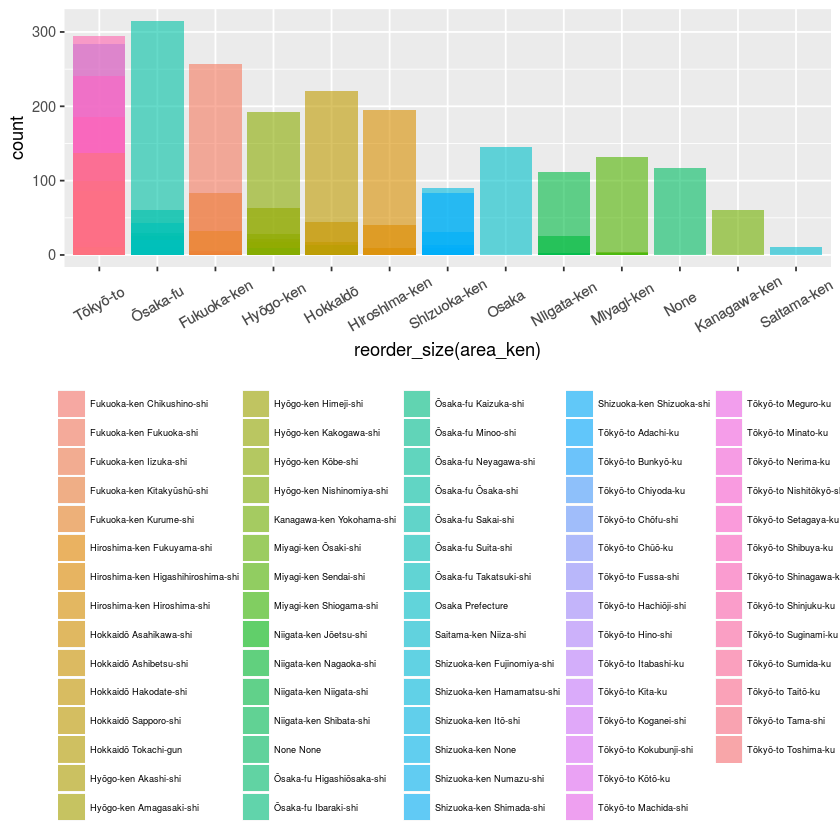

In [40]:
library('ggplot2') # visualisation
# To change plot order of bars, change levels in underlying factor
reorder_size <- function(x) {
  factor(x, levels = names(sort(table(x), decreasing = TRUE)))
}

ggplot(data = store.area.hpg, mapping = aes(x = reorder_size(area_ken), fill = ken_shi)) + 
  geom_bar(alpha = 3/5, position = "identity") +
  theme(legend.position = "bottom", 
        legend.title = element_blank(),
        legend.text = element_text(size = 5.5), 
        axis.text.x = element_text(vjust = 0.5, hjust = 0.5, angle = 30))

Warning message:
“Ignoring unknown parameters: stats”

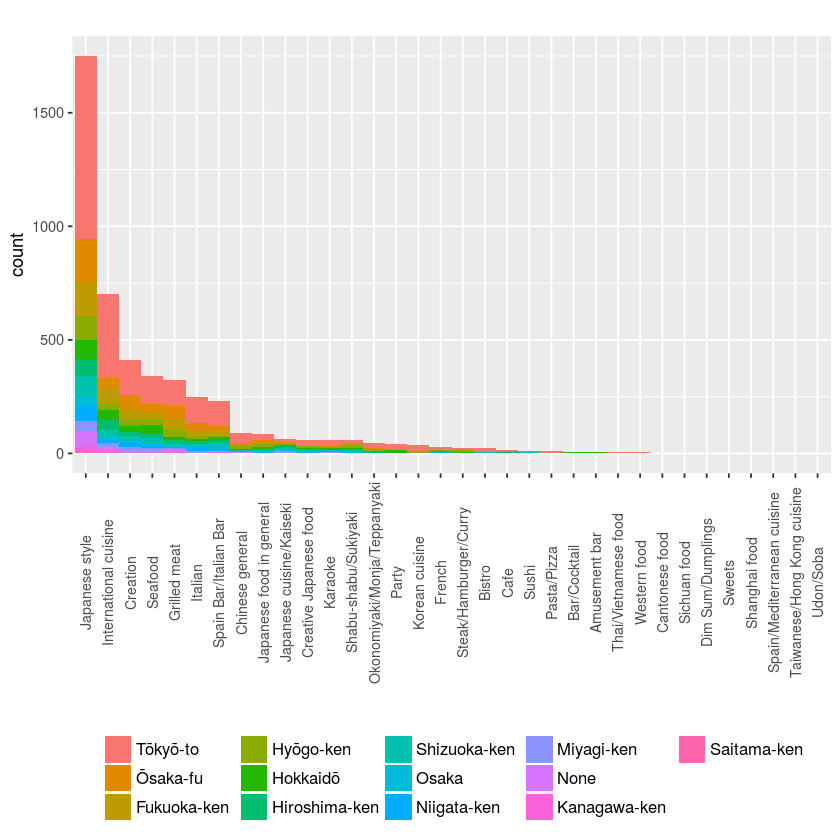

In [45]:
library('ggplot2') # visualisation
reorder_size <- function(x) {
  factor(x, levels = names(sort(table(x), decreasing = TRUE)))
}

ggplot(store.hpg, aes(x = reorder_size(hpg_genre_name), fill = reorder_size(area_ken))) +
  geom_bar(width = 1, stats = "identity")  +
# coord_polar("y", start = 0) +
  labs(x = "", title = "") + 
  theme(legend.position = "bottom",
        legend.title = element_blank(),
        legend.text = element_text(size = 10), 
        axis.text.x = element_text(size = 8.5, vjust = 0.5, hjust = 0.5, angle = 90))

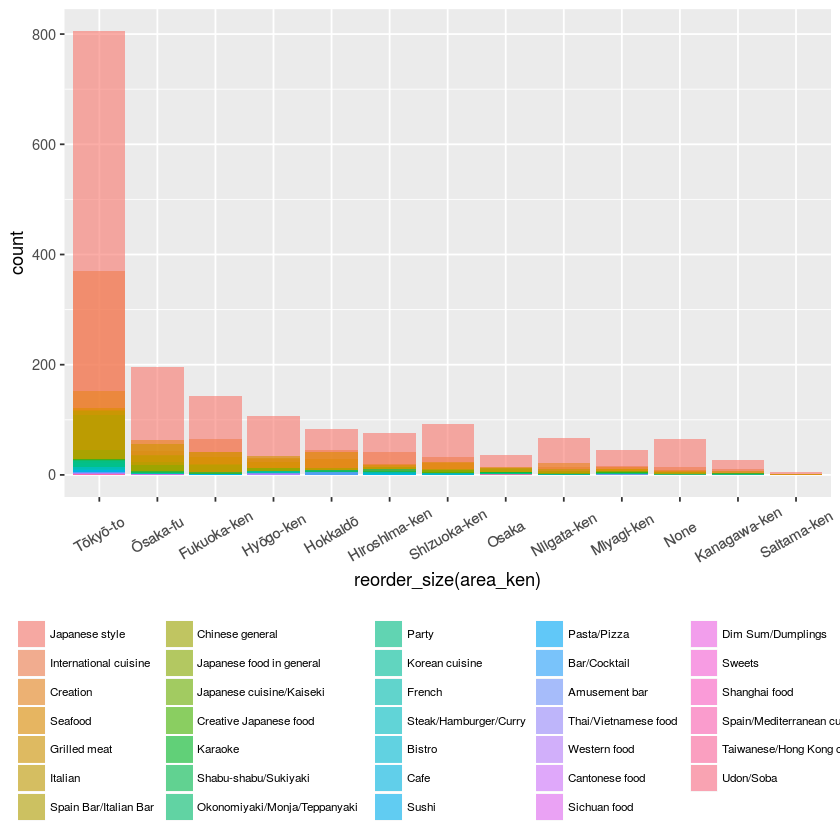

In [32]:
library('ggplot2') # visualisation
# To change plot order of bars, change levels in underlying factor
reorder_size <- function(x) {
  factor(x, levels = names(sort(table(x), decreasing = TRUE)))
}

ggplot(data = store.area.hpg, mapping = aes(x = reorder_size(area_ken), fill = reorder_size(hpg_genre_name))) + 
  geom_bar(alpha = 3/5, position = "identity") +
  theme(legend.position = "bottom", 
        legend.title = element_blank(),
        legend.text = element_text(size = 7), 
        axis.text.x = element_text(vjust = 0.5, hjust = 0.5, angle = 30))

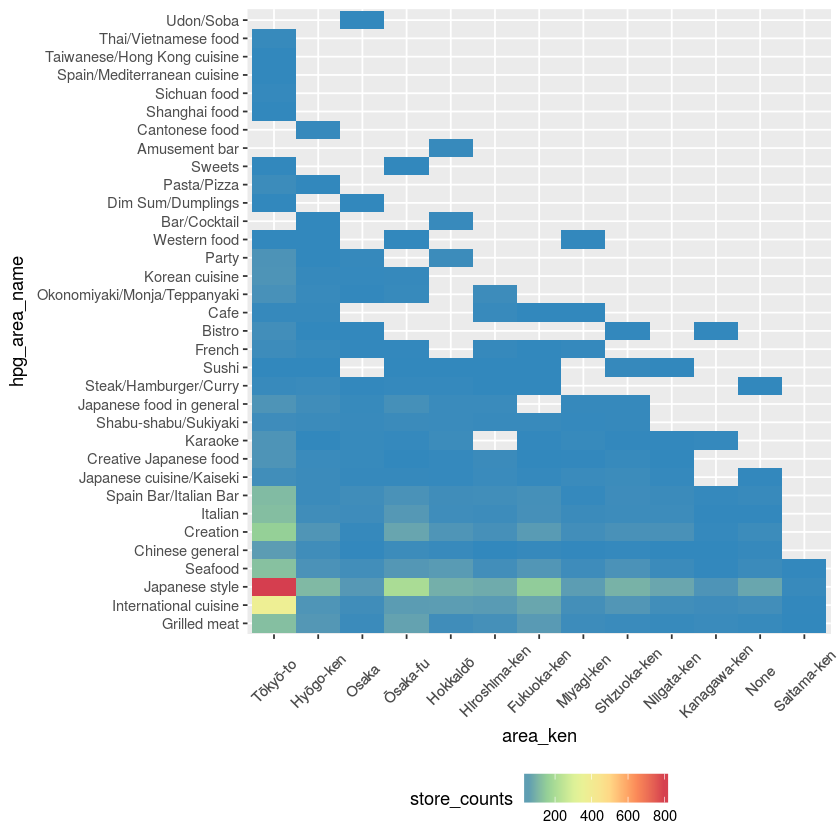

In [48]:
library('ggplot2') # visualisation
store.area.hpg %>%
  group_by(area_ken, hpg_genre_name) %>%
  summarise(store_counts = n()) %>%
  ggplot(aes(reorder_size(area_ken), reorder_size(hpg_genre_name), fill = store_counts)) +
         geom_tile() +
         labs(x = "area_ken", y = "hpg_area_name") +
         theme(legend.position = "bottom",
               axis.text.x = element_text(vjust = 0.5, hjust = 0.5, angle = 45)) +
         scale_fill_distiller(palette = "Spectral") 

In [18]:
head(store.area.hpg)

hpg_store_id         hpg_genre_name area_ken area_shi    area_local
1 hpg_6622b62385aec8bf Japanese style Tōkyō-to Setagaya-ku Taishidō  
2 hpg_e9e068dd49c5fa00 Japanese style Tōkyō-to Setagaya-ku Taishidō  
3 hpg_2976f7acb4b3a3bc Japanese style Tōkyō-to Setagaya-ku Taishidō  
4 hpg_e51a522e098f024c Japanese style Tōkyō-to Setagaya-ku Taishidō  
5 hpg_e3d0e1519894f275 Japanese style Tōkyō-to Setagaya-ku Taishidō  
6 hpg_530cd91db13b938e Japanese style Tōkyō-to Setagaya-ku Taishidō  
  latitude         longitude        ken_shi             
1 35.6436746642265 139.668220854814 Tōkyō-to Setagaya-ku
2 35.6436746642265 139.668220854814 Tōkyō-to Setagaya-ku
3 35.6436746642265 139.668220854814 Tōkyō-to Setagaya-ku
4 35.6436746642265 139.668220854814 Tōkyō-to Setagaya-ku
5 35.6436746642265 139.668220854814 Tōkyō-to Setagaya-ku
6 35.6436746642265 139.668220854814 Tōkyō-to Setagaya-ku

In [19]:
write.csv(store.area.hpg, file = "store_area_hpg.csv")

In [50]:
gps.lat.levels <- levels(store.area.hpg$latitude)
gps.lon.levels <- levels(store.area.hpg$longitude)

gps.lat.levels
gps.lon.levels

[1] "33.3116451885167" "33.459353333184"  "33.5568813625172"
  [4] "33.5690428275857" "33.576378885814"  "33.5797340853351"
  [7] "33.586969256765"  "33.5893363895301" "33.5898057431799"
 [10] "33.5938114369172" "33.6253345645257" "33.8618400940539"
 [13] "33.8815002311681" "34.3874999304076" "34.3921061951814"
 [16] "34.405829139868"  "34.4438143992744" "34.4896774918856"
 [19] "34.5343100355169" "34.5429737840978" "34.6188256463165"
 [22] "34.6463123135796" "34.6541547389256" "34.6575376688925"
 [25] "34.6633947065657" "34.6642578923122" "34.6649455287861"
 [28] "34.6695141138059" "34.6864822282026" "34.6921090191178"
 [31] "34.6961072081487" "34.7008890686831" "34.7013913398396"
 [34] "34.7015189521487" "34.7168187850391" "34.721643852576" 
 [37] "34.7491925683586" "34.7526220020618" "34.7528255827152"
 [40] "34.7628842428802" "34.7833546642214" "34.8128200803455"
 [43] "34.8192452150664" "34.8285115727567" "34.8299255519268"
 [46] "34.8446959955273" "34.8483344010984" "34.89895181957"  
 [49] "34.9345598371853" "34.9761959856874" "35.0169242595713"
 [52] "35.1435065774705" "35.2286300184325" "35.5127621813484"
 [55] "35.5496703891492" "35.6065644629997" "35.6066348830337"
 [58] "35.6194544011121" "35.6198993105808" "35.6245326769377"
 [61] "35.6273684971615" "35.6284593898344" "35.6371829456301"
 [64] "35.6373649334246" "35.6436746642265" "35.6467447985159"
 [67] "35.6482309999929" "35.6500406201583" "35.6572000631066"
 [70] "35.6592135750057" "35.6631812401236" "35.6641613578352"
 [73] "35.6661365113171" "35.6674650422837" "35.6686002312873"
 [76] "35.6707278552571" "35.6754199339039" "35.6772067238161"
 [79] "35.6825041877889" "35.68858932521"   "35.6913840261435"
 [82] "35.6957799197548" "35.700459562678"  "35.7019030598891"
 [85] "35.7033806289694" "35.7034722044097" "35.7045268734617"
 [88] "35.7049600607628" "35.7113526946999" "35.7124105538004"
 [91] "35.7300682724374" "35.7316384246169" "35.7329919391343"
 [94] "35.7487613697795" "35.7504730896129" "35.7554126329199"
 [97] "35.7563293056277" "35.7704936763352" "35.7712603764982"
[100] "37.1397777679231" "37.4475520983702" "37.5704782355036"
[103] "37.838267244892"  "37.8697297318579" "37.8968937017632"
[106] "37.9098086109062" "37.9141796404018" "37.9218089873865"
[109] "37.9224038247084" "37.9496613371687" "38.2211741466384"
[112] "38.2609292213358" "38.2637658039492" "38.2680706340227"
[115] "38.3282072863035" "38.3305179893434" "38.586508041042" 
[118] "41.7867642774289" "42.9426007881073" "43.0171684632422"
[121] "43.0393556174936" "43.0550467342327" "43.0626508559011"
[124] "43.0710451863794" "43.0981588902961" "43.1298785546459"
[127] "43.4737679144369" "43.7680334140293" "43.7748457584393"

[1] "130.339313030944" "130.392800598517" "130.400170103423"
  [4] "130.401762444701" "130.407306147911" "130.415134494467"
  [7] "130.418461937543" "130.431896363042" "130.501845827137"
 [10] "130.518556071422" "130.610252475554" "130.751425402895"
 [13] "130.887364287386" "132.453737641663" "132.461913549062"
 [16] "132.661308799626" "133.362129875602" "134.67307503026" 
 [19] "134.84764167701"  "134.967793581374" "135.097043633343"
 [22] "135.19169838649"  "135.200009648607" "135.252629859974"
 [25] "135.351271325934" "135.359104867502" "135.410836568174"
 [28] "135.455217027399" "135.465790031662" "135.483425913341"
 [31] "135.484354119315" "135.495215366821" "135.498858596496"
 [34] "135.501425073088" "135.504173905849" "135.511015877611"
 [37] "135.513197204085" "135.523532507624" "135.530684753628"
 [40] "135.553402986219" "135.567196195081" "135.574890561587"
 [43] "135.59431702676"  "135.617700846468" "135.626893879107"
 [46] "137.738944248312" "138.194795335294" "138.251520899663"
 [49] "138.344235678092" "138.395167116889" "138.483531738964"
 [52] "138.616270553172" "138.824720764706" "138.841401954853"
 [55] "138.873286079977" "138.971622613575" "139.038831703075"
 [58] "139.04490438335"  "139.060023533565" "139.062169682261"
 [61] "139.096332944694" "139.104301421225" "139.111617459975"
 [64] "139.320881857858" "139.333801249646" "139.369090338226"
 [67] "139.373869598931" "139.421325138687" "139.437613780568"
 [70] "139.448494440035" "139.470149586499" "139.495732838814"
 [73] "139.52388554909"  "139.540968681458" "139.554190917653"
 [76] "139.558725129422" "139.593794420619" "139.633061874363"
 [79] "139.633401431252" "139.658380363957" "139.660343438851"
 [82] "139.668220854814" "139.668412382952" "139.668428354733"
 [85] "139.671710927319" "139.684337716716" "139.691129568101"
 [88] "139.699736413293" "139.701256018243" "139.701280416651"
 [91] "139.704180393047" "139.706563865451" "139.707924045163"
 [94] "139.711742036854" "139.712665228437" "139.722434229872"
 [97] "139.725523823653" "139.731970982304" "139.733978129589"
[100] "139.733984177229" "139.737998019487" "139.746450221751"
[103] "139.763042710922" "139.768452660487" "139.773619351768"
[106] "139.778927275065" "139.782683762559" "139.808819886617"
[109] "139.824575523243" "139.828642317999" "140.743511351584"
[112] "140.864111861762" "140.870328746743" "140.873967041258"
[115] "140.879943773246" "140.883916167353" "140.941775545589"
[118] "141.021907735053" "141.309260567281" "141.35141885084" 
[121] "141.351928620239" "141.353236099251" "141.364464259678"
[124] "141.381244720474" "141.42905073338"  "142.121081840925"
[127] "142.359663830444" "142.37740311615"  "143.714585146618"

IV. Visitor analysis with calendar features

In [2]:
str(date.info)

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	517 obs. of  3 variables:
 $ calendar_date: chr  "2016-01-01" "2016-01-02" "2016-01-03" "2016-01-04" ...
 $ day_of_week  : chr  "Friday" "Saturday" "Sunday" "Monday" ...
 $ holiday_flg  : int  1 1 1 0 0 0 0 0 0 0 ...
 - attr(*, ".internal.selfref")=<externalptr> 


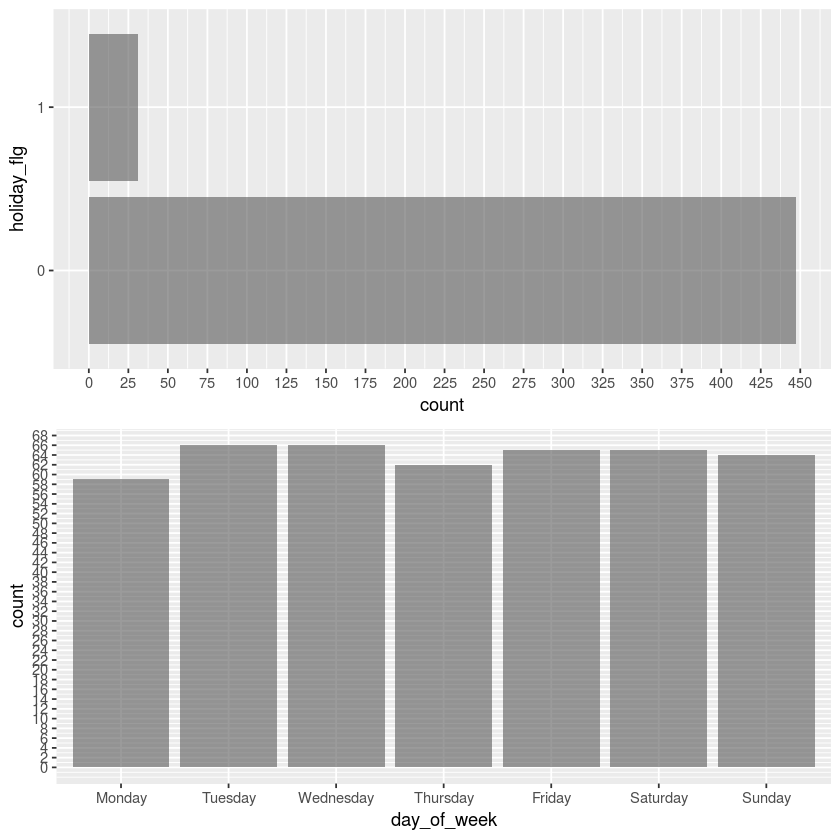

In [51]:
library('dplyr') # data manipulation
library('ggplot2') # visualisation

date.train.info <- date.info[1:478,] ##Visiting date in air_visit_data
date.train.info$day_of_week = factor(date.train.info$day_of_week, 
                                     levels = c("Monday", "Tuesday", "Wednesday", "Thursday", 
                                                "Friday", "Saturday", "Sunday"))   ## 设置柱条的顺序

date.train.day <- date.train.info %>%
  mutate(day_of_week = as.factor(day_of_week)) %>%
  filter(holiday_flg == 0) 

plot.d <- ggplot(date.train.day, aes(x = day_of_week)) +
            geom_bar(alpha = 3/5, position = "identity") +
            scale_y_continuous(breaks = seq(0, 70, 2))

date.train.holiday <- date.train.info %>%
  mutate(holiday_flg = as.factor(holiday_flg))

plot.h <- ggplot(date.train.holiday, aes(x = holiday_flg)) +
            geom_bar(alpha = 3/5, position = "identity") +
            scale_y_continuous(breaks = seq(0, 500, 25)) +
            coord_flip()

multiplot(plot.h, plot.d)

In [12]:
str(date.train.info)

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	478 obs. of  3 variables:
 $ calendar_date: chr  "2016-01-01" "2016-01-02" "2016-01-03" "2016-01-04" ...
 $ day_of_week  : chr  "Friday" "Saturday" "Sunday" "Monday" ...
 $ holiday_flg  : int  1 1 1 0 0 0 0 0 0 0 ...


Visitors and opendays

In [38]:
summary(visitor)

 air_store_id        visit_date           visitors     
 Length:252108      Length:252108      Min.   :  1.00  
 Class :character   Class :character   1st Qu.:  9.00  
 Mode  :character   Mode  :character   Median : 17.00  
                                       Mean   : 20.97  
                                       3rd Qu.: 29.00  
                                       Max.   :877.00  

In [2]:
library('dplyr') # data manipulation
library('tidyr') # data wrangling

## #
visitor.join <- visitor %>%
  group_by(air_store_id) %>%
  summarise(opendays = n(),
            store_visitors = sum(visitors)) %>%
  left_join(store.air, by = "air_store_id")  %>%
  mutate(air_store_id = as.factor(air_store_id),
         air_genre_name = as.factor(air_genre_name),
         air_area_name = as.factor(air_area_name),
         latitude = as.factor(latitude),
         longitude = as.factor(longitude),
         visitors_per_day = store_visitors/opendays) %>%
  separate(air_area_name, into = c("area_ken", "area_shi", "area_local"), sep = " ") %>%
  mutate(area_ken = as.factor(area_ken),
         area_shi = as.factor(area_shi),
         area_local = as.factor(area_local))  

summary(visitor.join)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:data.table’:

    between, first, last

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Warning message:
“Too many values at 87 locations: 11, 14, 16, 28, 36, 38, 44, 54, 61, 62, 83, 89, 132, 135, 140, 144, 147, 149, 150, 161, ...”

               air_store_id    opendays     store_visitors 
 air_00a91d42b08b08d9:  1   Min.   : 20.0   Min.   :  190  
 air_0164b9927d20bcc3:  1   1st Qu.:243.0   1st Qu.: 3328  
 air_0241aa3964b7f861:  1   Median :284.0   Median : 5474  
 air_0328696196e46f18:  1   Mean   :304.1   Mean   : 6378  
 air_034a3d5b40d5b1b1:  1   3rd Qu.:391.0   3rd Qu.: 8791  
 air_036d4f1ee7285390:  1   Max.   :477.0   Max.   :18717  
 (Other)             :823                                  
        air_genre_name          area_ken          area_shi       area_local 
 Izakaya       :197    Tōkyō-to     :444   Fukuoka-shi:103   Daimyō   : 64  
 Cafe/Sweets   :181    Fukuoka-ken  :127   Ōsaka-shi  : 66   Shibuya  : 58  
 Dining bar    :108    Ōsaka-fu     : 74   Shibuya-ku : 64   Shibakōen: 51  
 Italian/French:102    Hyōgo-ken    : 57   Minato-ku  : 61   Kabukichō: 39  
 Bar/Cocktail  : 79    Hokkaidō     : 46   Chūō-ku    : 43   Setagaya : 30  
 Japanese food : 63    Hiroshima-ken: 32   Shinjuku-ku: 43

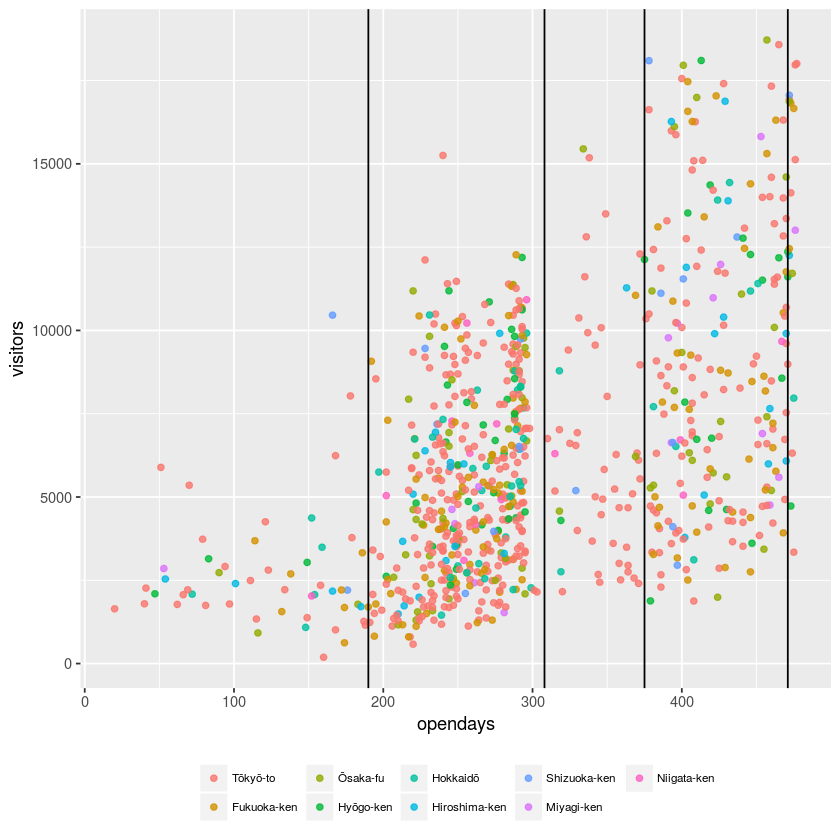

In [68]:
library(ggplot2)
reorder_size <- function(x) {
  factor(x, levels = names(sort(table(x), decreasing = TRUE)))
}
ggplot(visitor.join, aes(x = opendays, y = store_visitors, colour = reorder_size(area_ken))) +
  geom_point(alpha = 4/5) +
  geom_vline(xintercept = 190) +
  geom_vline(xintercept = 308) +
  geom_vline(xintercept = 375) +
  geom_vline(xintercept = 471) +
  theme(legend.position = "bottom",
        legend.title = element_blank(),
        legend.text = element_text(size = 7))

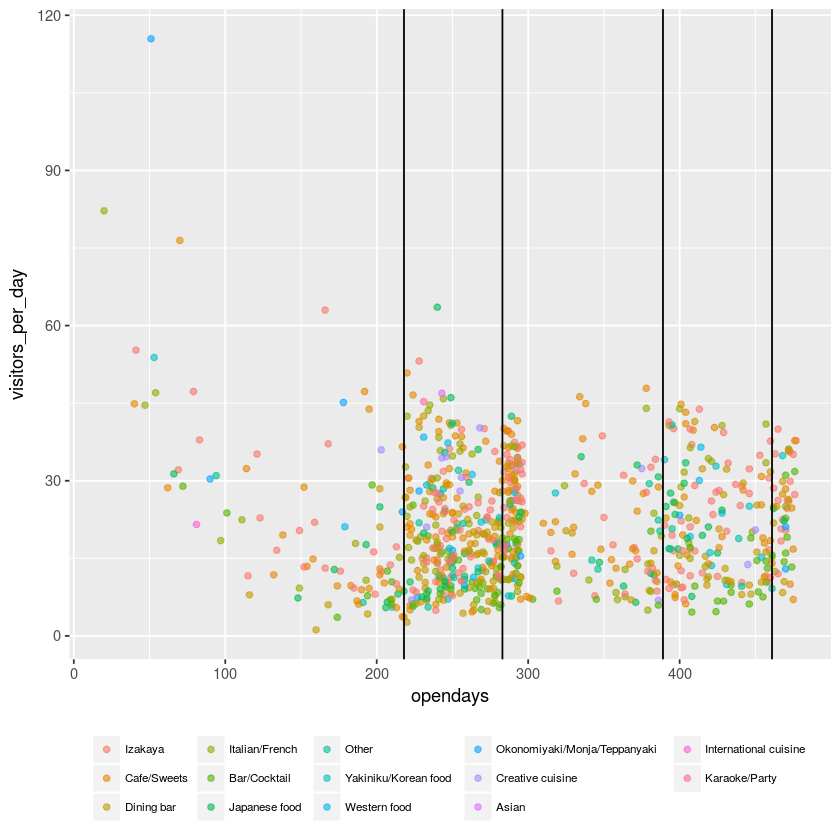

In [70]:
library(ggplot2)
reorder_size <- function(x) {
  factor(x, levels = names(sort(table(x), decreasing = TRUE)))
}
ggplot(visitor.join, aes(x = opendays, y = visitors_per_day, 
                         colour = reorder_size(air_genre_name))) +
  geom_point(alpha = 3/5) +
  geom_vline(xintercept = 218) +
  geom_vline(xintercept = 283) +
  geom_vline(xintercept = 389) +
  geom_vline(xintercept = 461) +
  theme(legend.position = "bottom",
        legend.title = element_blank(),
        legend.text = element_text(size = 7)) 

In [19]:
str(visitor.join)

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	829 obs. of  7 variables:
 $ air_store_id  : Factor w/ 829 levels "air_00a91d42b08b08d9",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ date_counts   : int  232 149 396 116 251 281 298 429 472 258 ...
 $ visitors      : int  6051 1378 3919 921 3722 6310 7059 16877 16931 2975 ...
 $ air_genre_name: Factor w/ 14 levels "Asian","Bar/Cocktail",..: 7 7 8 5 3 3 3 8 8 9 ...
 $ air_area_name : Factor w/ 103 levels "Fukuoka-ken Fukuoka-shi Daimyō",..: 57 75 97 43 46 32 83 16 79 1 ...
 $ latitude      : Factor w/ 108 levels "33.2119674","33.3192865",..: 69 55 81 29 27 38 44 16 90 10 ...
 $ longitude     : Factor w/ 108 levels "130.195555","130.3484363",..: 86 84 91 36 27 25 61 16 54 5 ...



Regression tree:
tree(formula = visitors ~ opendays, data = visitor.join)
Number of terminal nodes:  5 
Residual mean deviance:  10430000 = 8.593e+09 / 824 
Distribution of residuals:
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-8157.0 -2234.0  -545.9     0.0  1946.0 11110.0 

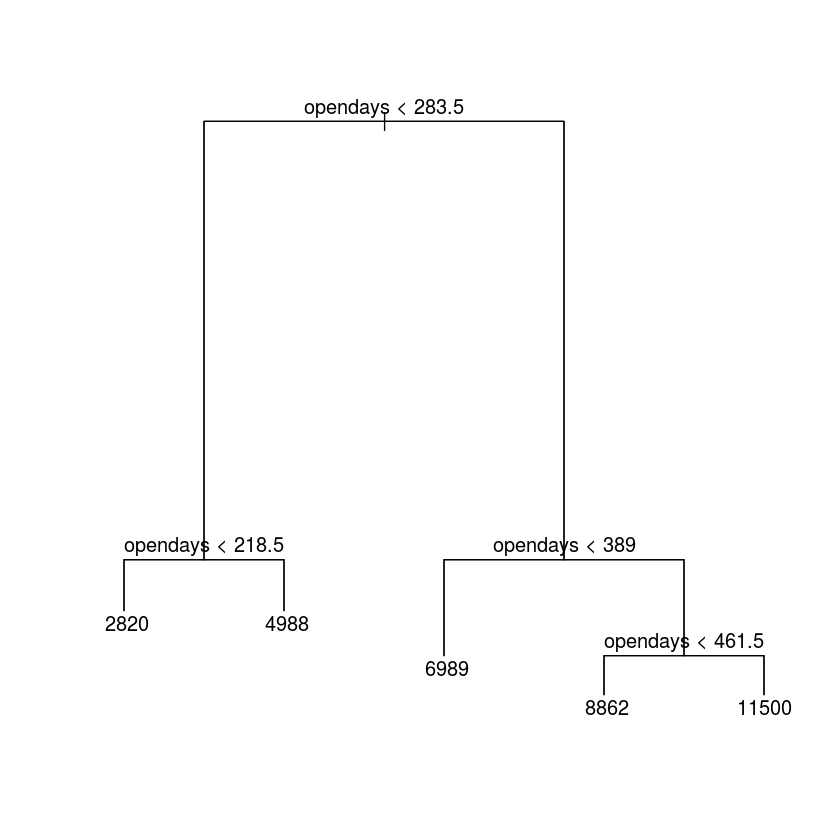

In [7]:
library(tree)
tree.visit <- tree(store_visitors ~ opendays, visitor.join)
summary(tree.visit)
plot(tree.visit)
text(tree.visit, pretty = 0)


Regression tree:
tree(formula = visitors ~ air_genre_name, data = visitor.join)
Number of terminal nodes:  3 
Residual mean deviance:  14740000 = 1.217e+10 / 826 
Distribution of residuals:
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-6079.0 -2877.0  -833.4     0.0  2290.0 11840.0 

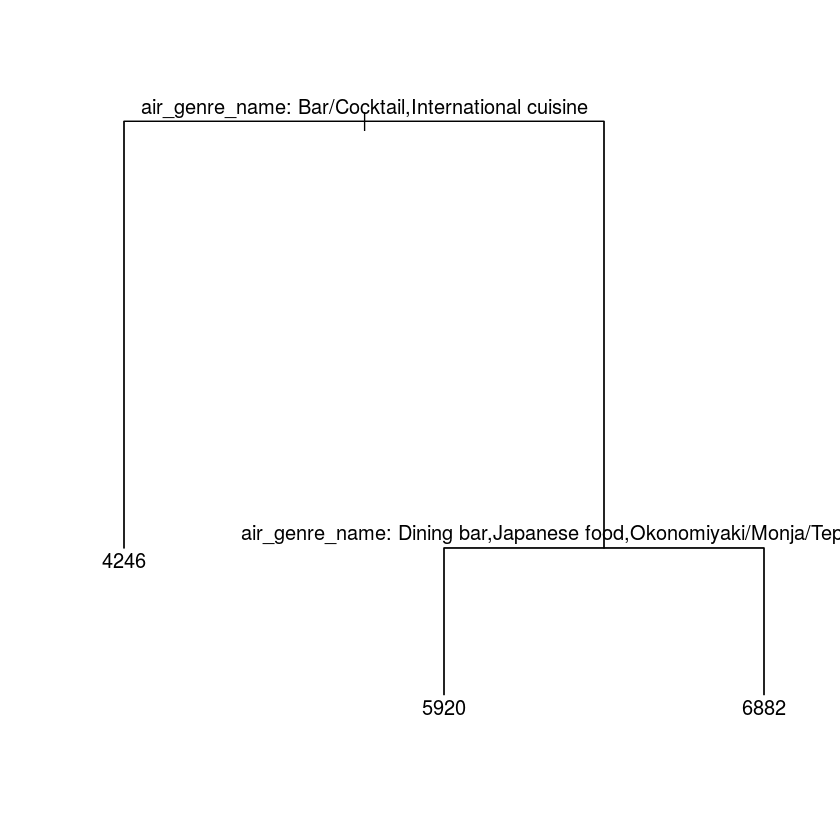

In [3]:
library(tree)
tree.visit.genre <- tree(store_visitors ~ air_genre_name, visitor.join)
summary(tree.visit.genre)
plot(tree.visit.genre)
text(tree.visit.genre, pretty = 0)


Regression tree:
tree(formula = visitors ~ opendays + air_genre_name, data = visitor.join)
Number of terminal nodes:  7 
Residual mean deviance:  9930000 = 8.162e+09 / 822 
Distribution of residuals:
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-9827.0 -2229.0  -479.8     0.0  1871.0 10820.0 

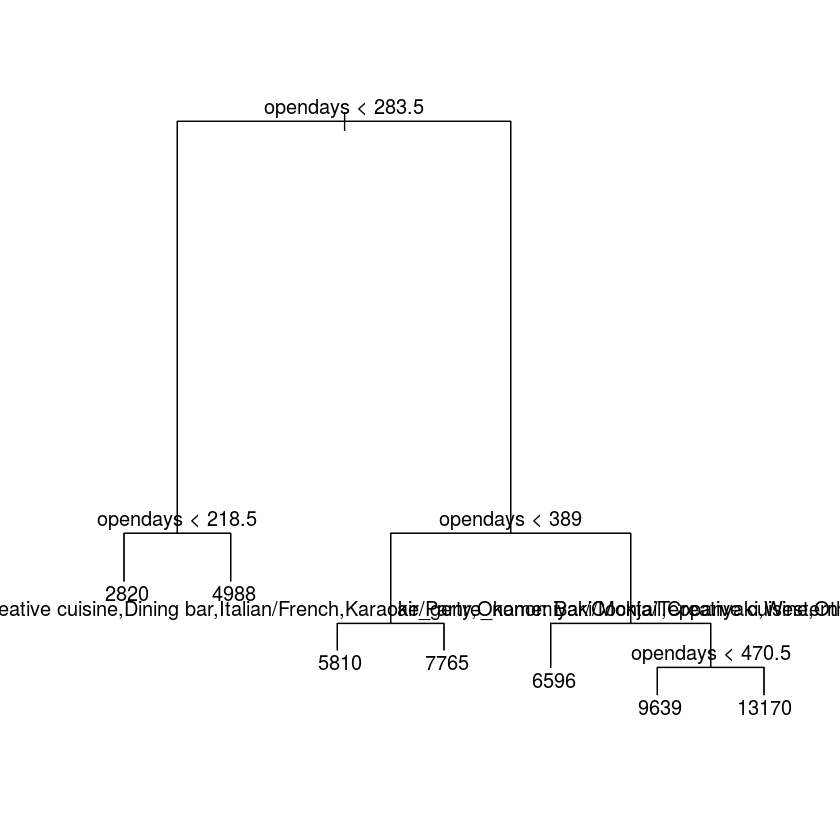

In [6]:
tree.visit.dg <- tree(store_visitors ~ opendays + air_genre_name, visitor.join)
summary(tree.visit.dg)
plot(tree.visit.dg)
text(tree.visit.dg, pretty = 0)

In [45]:
# Multiple plot function
#
# ggplot objects can be passed in ..., or to plotlist (as a list of ggplot objects)
# - cols:   Number of columns in layout
# - layout: A matrix specifying the layout. If present, 'cols' is ignored.
#
# If the layout is something like matrix(c(1,2,3,3), nrow=2, byrow=TRUE),
# then plot 1 will go in the upper left, 2 will go in the upper right, and
# 3 will go all the way across the bottom.

multiplot <- function(..., plotlist=NULL, file, cols=1, layout=NULL) {
  library(grid)

  # Make a list from the ... arguments and plotlist
  plots <- c(list(...), plotlist)

  numPlots = length(plots)

  # If layout is NULL, then use 'cols' to determine layout
  if (is.null(layout)) {
    # Make the panel
    # ncol: Number of columns of plots
    # nrow: Number of rows needed, calculated from # of cols
    layout <- matrix(seq(1, cols * ceiling(numPlots/cols)),
                    ncol = cols, nrow = ceiling(numPlots/cols))
  }

 if (numPlots==1) {
    print(plots[[1]])

  } else {
    # Set up the page
    grid.newpage()
    pushViewport(viewport(layout = grid.layout(nrow(layout), ncol(layout))))

    # Make each plot, in the correct location
    for (i in 1:numPlots) {
      # Get the i,j matrix positions of the regions that contain this subplot
      matchidx <- as.data.frame(which(layout == i, arr.ind = TRUE))

      print(plots[[i]], vp = viewport(layout.pos.row = matchidx$row,
                                      layout.pos.col = matchidx$col))
    }
  }
}

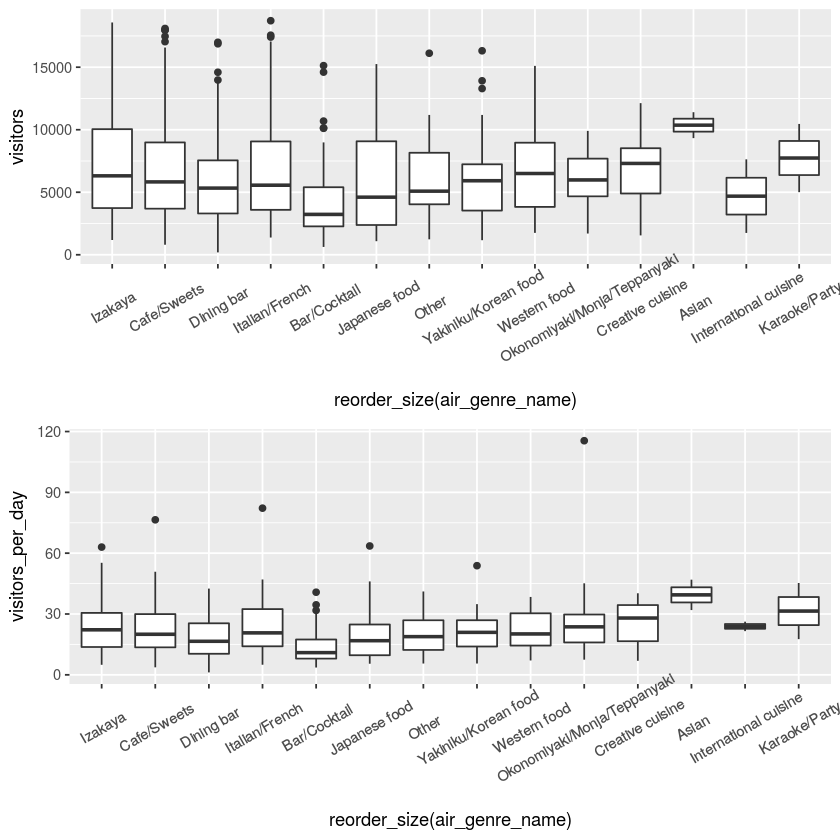

In [54]:
library('ggplot2') # visualisation
# To change plot order of bars, change levels in underlying factor
reorder_size <- function(x) {
  factor(x, levels = names(sort(table(x), decreasing = TRUE)))
}
box.visitor <- ggplot(data = visitor.join, mapping = aes(x = reorder_size(air_genre_name), y = store_visitors)) + 
                 geom_boxplot() +
                 theme(axis.text.x = element_text(vjust = 0.7, hjust = 0.5, angle = 30))
box.day <- ggplot(data = visitor.join, mapping = aes(x = reorder_size(air_genre_name), y = visitors_per_day)) + 
             geom_boxplot() +
             theme(axis.text.x = element_text(vjust = 0.7, hjust = 0.5, angle = 30))

multiplot(box.visitor, box.day)

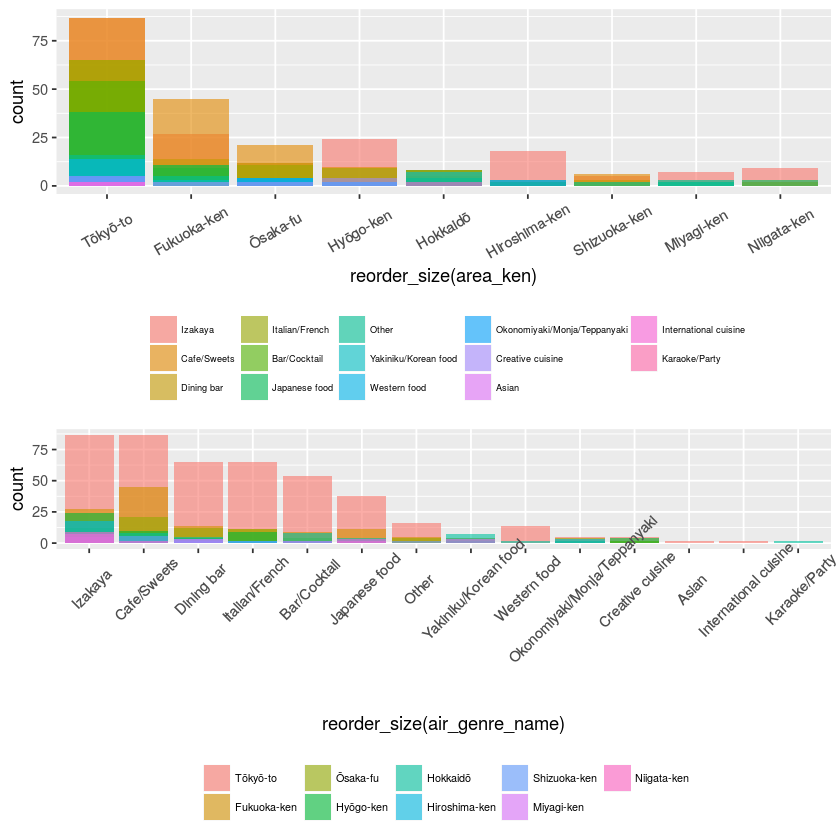

In [58]:
library('ggplot2') # visualisation
# To change plot order of bars, change levels in underlying factor
reorder_size <- function(x) {
  factor(x, levels = names(sort(table(x), decreasing = TRUE)))
}

bar.ar <-ggplot(data = visitor.join, mapping = aes(x = reorder_size(area_ken), 
                                                   fill = reorder_size(air_genre_name))) + 
           geom_bar(alpha = 3/5, position = "identity") +
           theme(legend.position = "bottom", 
                 legend.title = element_blank(),
                 legend.text = element_text(size = 5.5), 
                 axis.text.x = element_text(vjust = 0.5, hjust = 0.5, angle = 30))

bar.ge <- ggplot(data = visitor.join, mapping = aes(x = reorder_size(air_genre_name), 
                                                    fill = reorder_size(area_ken))) + 
            geom_bar(alpha = 3/5, position = "identity") +
            theme(legend.position = "bottom", 
                  legend.title = element_blank(),
                  legend.text = element_text(size = 6.5), 
                  axis.text.x = element_text(vjust = 0.8, hjust = 0.5, angle = 45))

multiplot(bar.ar, bar.ge)

Operation Rate

In [60]:
head(visitor)

air_store_id         visit_date visitors
1 air_ba937bf13d40fb24 2016-01-13 25      
2 air_ba937bf13d40fb24 2016-01-14 32      
3 air_ba937bf13d40fb24 2016-01-15 29      
4 air_ba937bf13d40fb24 2016-01-16 22      
5 air_ba937bf13d40fb24 2016-01-18  6      
6 air_ba937bf13d40fb24 2016-01-19  9

In [41]:
library('tidyr') # data wrangling
visitor.sp <- spread(visitor, key = visit_date, value = visitors)
head(visitor.sp)

air_store_id         2016-01-01 2016-01-02 2016-01-03 2016-01-04 2016-01-05
1 air_00a91d42b08b08d9 NA         NA         NA         NA         NA        
2 air_0164b9927d20bcc3 NA         NA         NA         NA         NA        
3 air_0241aa3964b7f861 NA         NA         10          9         17        
4 air_0328696196e46f18 NA         NA         NA         NA         NA        
5 air_034a3d5b40d5b1b1 NA         NA         NA         NA         NA        
6 air_036d4f1ee7285390 NA         NA         NA         NA         NA        
  2016-01-06 2016-01-07 2016-01-08 2016-01-09 ⋯ 2017-04-13 2017-04-14
1 NA         NA         NA         NA         ⋯ 34         39        
2 NA         NA         NA         NA         ⋯ 13          7        
3 10         NA          5          8         ⋯ NA          4        
4 NA         NA         NA         NA         ⋯ NA          9        
5 NA         NA         NA         NA         ⋯ 22         18        
6 NA         NA         NA         NA         ⋯  4         11        
  2017-04-15 2017-04-16 2017-04-17 2017-04-18 2017-04-19 2017-04-20 2017-04-21
1 NA         NA         19         35         17         38         55        
2  1         NA          2          1          8          1         26        
3 15         10         12         19          8         NA          3        
4  4          3          3         NA         24         NA         19        
5 31         39         25         20         31         12         37        
6 22         30          6         32         52         18         29        
  2017-04-22
1 18        
2  6        
3 13        
4  8        
5 35        
6 23

In [81]:
summary(visitor.sp)

 air_store_id         2016-01-01       2016-01-02    2016-01-03    
 Length:829         Min.   :  1.00   Min.   : 2    Min.   :  1.00  
 Class :character   1st Qu.:  5.75   1st Qu.:12    1st Qu.: 12.00  
 Mode  :character   Median : 14.00   Median :24    Median : 24.00  
                    Mean   : 21.52   Mean   :28    Mean   : 29.23  
                    3rd Qu.: 32.25   3rd Qu.:38    3rd Qu.: 40.00  
                    Max.   :102.00   Max.   :96    Max.   :132.00  
                    NA's   :781      NA's   :766   NA's   :748     
   2016-01-04      2016-01-05     2016-01-06      2016-01-07      2016-01-08   
 Min.   : 1.00   Min.   : 1.0   Min.   : 1.00   Min.   : 1.00   Min.   : 1.00  
 1st Qu.:10.00   1st Qu.: 8.0   1st Qu.: 7.00   1st Qu.: 7.00   1st Qu.:10.00  
 Median :17.00   Median :15.0   Median :13.00   Median :14.00   Median :18.00  
 Mean   :21.18   Mean   :17.0   Mean   :16.62   Mean   :16.98   Mean   :22.08  
 3rd Qu.:28.00   3rd Qu.:22.5   3rd Qu.:23.75   3rd Qu.:

In [3]:
library('dplyr') # data manipulation
library('tidyr') # data wrangling

## #
visitor.date <- visitor %>%
  left_join(date.info, by = c("visit_date" = "calendar_date"))
vi.hd <- visitor.date %>%
  filter(holiday_flg == 1) %>%
  group_by(air_store_id) %>%
  summarise(holiday = n())

vi.fr <- visitor.date %>%
  filter(holiday_flg == 0, day_of_week == 'Friday') %>%
  group_by(air_store_id) %>% 
  summarise(fri = n())
vi.sat <- visitor.date %>%
  filter(holiday_flg == 0, day_of_week == 'Saturday') %>%
  group_by(air_store_id) %>% 
  summarise(sat = n())
vi.su <- visitor.date %>%
  filter(holiday_flg == 0, day_of_week == 'Sunday') %>%
  group_by(air_store_id) %>% 
  summarise(sun = n())

vi.mo <- visitor.date %>%
  filter(holiday_flg == 0, day_of_week == 'Monday') %>%
  group_by(air_store_id) %>% 
  summarise(mon = n())
vi.tu <- visitor.date %>%
  filter(holiday_flg == 0, day_of_week == 'Tuesday') %>%
  group_by(air_store_id) %>% 
  summarise(tue = n())
vi.wed <- visitor.date %>%
  filter(holiday_flg == 0, day_of_week == 'Wednesday') %>%
  group_by(air_store_id) %>% 
  summarise(wed = n())
vi.thu <- visitor.date %>%
  filter(holiday_flg == 0, day_of_week == 'Thursday') %>%
  group_by(air_store_id) %>% 
  summarise(thu = n())

visitor.cal <- vi.hd %>%
  full_join(vi.fr, by = "air_store_id") %>%
  full_join(vi.sat, by = "air_store_id") %>%
  full_join(vi.su, by = "air_store_id") %>%
  full_join(vi.mo, by = "air_store_id") %>%
  full_join(vi.tu, by = "air_store_id") %>%
  full_join(vi.wed, by = "air_store_id") %>%
  full_join(vi.thu, by = "air_store_id") 

visitor.cal[is.na(visitor.cal)] <- 0  # NA represents closed

In [28]:
head(visitor.cal)

air_store_id         holiday fri sat sun mon tue wed thu
1 air_00a91d42b08b08d9  1      40  38   1  34  40  40  38 
2 air_0164b9927d20bcc3  5      26  21   0  20  25  27  25 
3 air_0241aa3964b7f861 17      59  63  62  56  65  66   8 
4 air_0328696196e46f18  6      22  16  16  10  14  16  16 
5 air_034a3d5b40d5b1b1 15      40  38  37  31  17  37  36 
6 air_036d4f1ee7285390 10      40  40  40  35  40  39  37

In [15]:
summary(visitor.cal) 

               air_store_id    holiday           fri             sat       
 air_00a91d42b08b08d9:  1   Min.   : 1.00   Min.   : 1.00   Min.   : 1.00  
 air_0164b9927d20bcc3:  1   1st Qu.:11.00   1st Qu.:40.00   1st Qu.:39.00  
 air_0241aa3964b7f861:  1   Median :16.00   Median :41.00   Median :40.00  
 air_0328696196e46f18:  1   Mean   :15.64   Mean   :46.82   Mean   :45.46  
 air_034a3d5b40d5b1b1:  1   3rd Qu.:20.00   3rd Qu.:63.00   3rd Qu.:63.00  
 air_036d4f1ee7285390:  1   Max.   :31.00   Max.   :65.00   Max.   :65.00  
 (Other)             :823   NA's   :12      NA's   :2       NA's   :4      
      sun             mon            tue             wed             thu      
 Min.   : 1.00   Min.   : 1.0   Min.   : 1.00   Min.   : 1.00   Min.   : 1.0  
 1st Qu.:25.00   1st Qu.:29.0   1st Qu.:37.00   1st Qu.:38.00   1st Qu.:36.0  
 Median :39.00   Median :34.0   Median :40.00   Median :40.00   Median :38.0  
 Mean   :36.63   Mean   :34.7   Mean   :43.04   Mean   :43.73   Mean   :42.2

In [5]:
summary(visitor.cal) 

 air_store_id          holiday           fri             sat       
 Length:829         Min.   : 0.00   Min.   : 0.00   Min.   : 0.00  
 Class :character   1st Qu.:11.00   1st Qu.:40.00   1st Qu.:39.00  
 Mode  :character   Median :16.00   Median :41.00   Median :40.00  
                    Mean   :15.41   Mean   :46.71   Mean   :45.24  
                    3rd Qu.:20.00   3rd Qu.:63.00   3rd Qu.:63.00  
                    Max.   :31.00   Max.   :65.00   Max.   :65.00  
      sun          mon             tue             wed             thu       
 Min.   : 0   Min.   : 0.00   Min.   : 0.00   Min.   : 0.00   Min.   : 0.00  
 1st Qu.:21   1st Qu.:27.00   1st Qu.:36.00   1st Qu.:38.00   1st Qu.:36.00  
 Median :39   Median :34.00   Median :40.00   Median :40.00   Median :38.00  
 Mean   :35   Mean   :33.66   Mean   :42.83   Mean   :43.31   Mean   :41.95  
 3rd Qu.:43   3rd Qu.:47.00   3rd Qu.:60.00   3rd Qu.:60.00   3rd Qu.:58.00  
 Max.   :64   Max.   :59.00   Max.   :66.00   Max.   :66

In [4]:
require(reshape2)
## #
operation.rate <- visitor.cal %>% 
  transmute(air_store_id = air_store_id, 
            hdy = holiday/31,
            fri = fri/65,
            sat = sat/65,
            sun = sun/64,
            mon = mon/59,
            tue = tue/66,
            wed = wed/66,
            thu = thu/62) 

#operation.rate$air_store_id <- with(operation.rate, reorder(air_store_id, fri))
operation.rm <- melt(operation.rate) 
#require(scales) 
#operation.rm <- ddply(operation.rm, .(variable), transform, rescale = rescale(value))

#library('ggplot2') # visualisation
#ggplot(operation.rm, aes(variable, air_store_id)) + 
 # geom_tile(aes(fill = value), colour = "white") + 
 # scale_fill_gradient(low = "white", high = "steelblue") +
 # theme(legend.position = "bottom")

##visitor with operation rate
visitor.jr <- left_join(visitor.join, operation.rate, by = "air_store_id")

Loading required package: reshape2

Attaching package: ‘reshape2’

The following object is masked from ‘package:tidyr’:

    smiths

The following objects are masked from ‘package:data.table’:

    dcast, melt

Using air_store_id as id variables
Warning message:
“Column `air_store_id` joining factor and character vector, coercing into character vector”

In [38]:
head(operation.rm)

air_store_id         variable value     
1 air_00a91d42b08b08d9 hdy      0.03225806
2 air_0164b9927d20bcc3 hdy      0.16129032
3 air_0241aa3964b7f861 hdy      0.54838710
4 air_0328696196e46f18 hdy      0.19354839
5 air_034a3d5b40d5b1b1 hdy      0.48387097
6 air_036d4f1ee7285390 hdy      0.32258065


Regression tree:
tree(formula = visitors_per_day ~ hdy + fri + sat + sun + mon + 
    tue + wed + thu, data = visitor.jr)
Variables actually used in tree construction:
[1] "fri" "sun" "mon" "tue" "thu"
Number of terminal nodes:  7 
Residual mean deviance:  108.1 = 88850 / 822 
Distribution of residuals:
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-31.960  -7.900  -1.556   0.000   6.463  52.510 

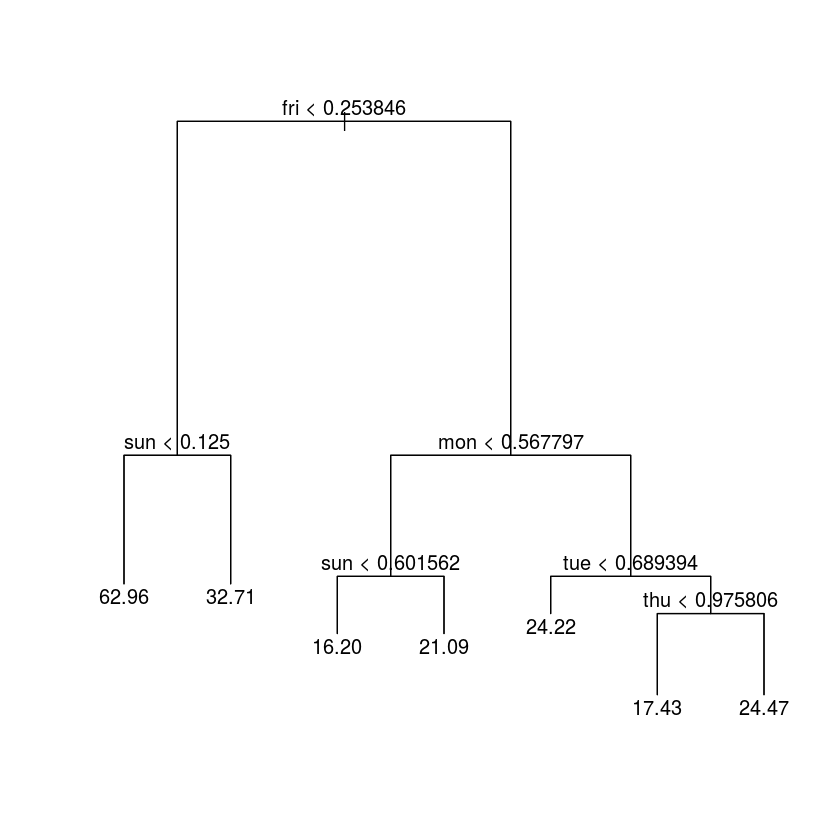

In [72]:
library(tree)
tree.visit.cal <- tree(visitors_per_day ~ hdy + fri + sat + sun + mon + tue + wed + thu, visitor.jr)
summary(tree.visit.cal)
plot(tree.visit.cal)
text(tree.visit.cal, pretty = 0)

In [5]:
## #operation category from CART

operation1 <- visitor.jr %>%
 filter(fri < 0.253846, sun < 0.125) %>%
 transmute(air_store_id = air_store_id, operation = 'g')

operation2 <- visitor.jr %>%
 filter(fri < 0.253846, sun >= 0.125) %>%
 transmute(air_store_id = air_store_id, operation = 'f')

operation3 <- visitor.jr %>%
 filter(fri >= 0.253846, mon < 0.567797, sun < 0.601562) %>%
 transmute(air_store_id = air_store_id, operation = 'a')

operation4 <- visitor.jr %>%
 filter(fri >= 0.253846, mon < 0.567797, sun >= 0.601562) %>%
 transmute(air_store_id = air_store_id, operation = 'c')

operation5 <- visitor.jr %>%
 filter(fri >= 0.253846, mon >= 0.567797, tue < 0.689394) %>%
 transmute(air_store_id = air_store_id, operation = 'd')

operation6 <- visitor.jr %>%
 filter(fri >= 0.253846, mon >= 0.567797, tue >= 0.689394, thu < 0.975806) %>%
 transmute(air_store_id = air_store_id, operation = 'b')

operation7 <- visitor.jr %>%
 filter(fri >= 0.253846, mon >= 0.567797, tue >= 0.689394, thu >= 0.975806) %>%
 transmute(air_store_id = air_store_id, operation = 'e')

operate <- operation1 %>%
  bind_rows(operation2, operation3, operation4, operation5, operation6, operation7) 

visitor.operate <- visitor.jr %>%
  left_join(operate, by = "air_store_id") %>%
  mutate(operation = as.factor(operation))


Regression tree:
tree(formula = visitors_per_day ~ hdy + fri + sat + sun + mon + 
    tue + wed + thu + opendays, data = visitor.jr)
Variables actually used in tree construction:
[1] "opendays" "sun"      "mon"      "fri"      "tue"      "thu"     
Number of terminal nodes:  8 
Residual mean deviance:  106.4 = 87330 / 821 
Distribution of residuals:
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-22.930  -7.836  -1.618   0.000   6.445  47.950 

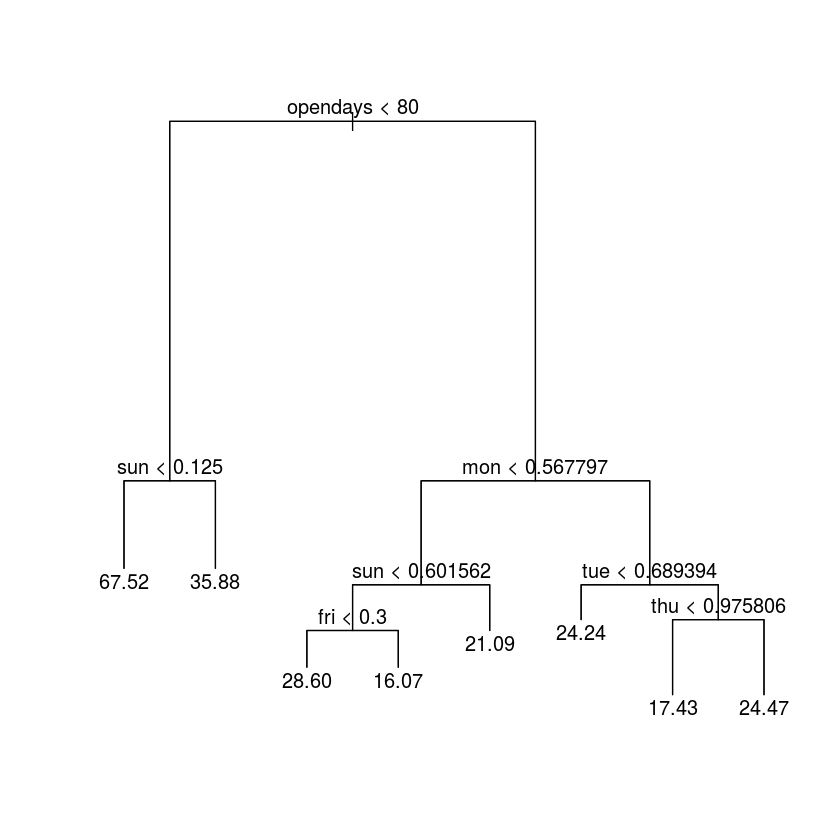

In [73]:
tree.visit.c <- tree(visitors_per_day ~ hdy + fri + sat + sun + mon + tue + wed + thu + opendays, visitor.jr)
summary(tree.visit.c)
plot(tree.visit.c)
text(tree.visit.c, pretty = 0)

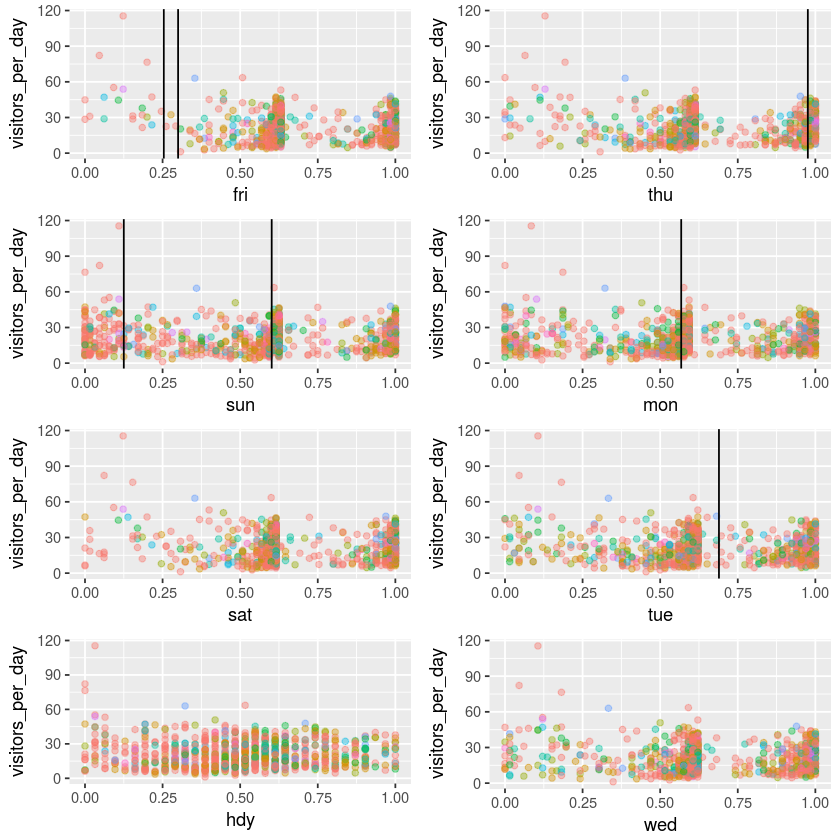

In [109]:
library(ggplot2)
reorder_size <- function(x) {
  factor(x, levels = names(sort(table(x), decreasing = TRUE)))
}

fri <-ggplot(visitor.jr, aes(x = fri, y = visitors_per_day, colour = reorder_size(area_ken))) +
      geom_point(alpha = 2/5) +
      geom_vline(xintercept = 0.253846) +
      geom_vline(xintercept = 0.3) +
      theme(legend.position = "none",
            legend.title = element_blank(),
            legend.text = element_text(size = 7)) 

sun <- ggplot(visitor.jr, aes(x = sun, y = visitors_per_day, colour = reorder_size(area_ken))) +
       geom_point(alpha = 2/5) +
       geom_vline(xintercept = 0.125) +
       geom_vline(xintercept = 0.601562) +
       theme(legend.position = "none",
             legend.title = element_blank(),
             legend.text = element_text(size = 7)) 

mon <- ggplot(visitor.jr, aes(x = mon, y = visitors_per_day, colour = reorder_size(area_ken))) +
       geom_point(alpha = 2/5) +
       geom_vline(xintercept = 0.567797) +
       theme(legend.position = "none",
             legend.title = element_blank(),
             legend.text = element_text(size = 7)) 

tue <- ggplot(visitor.jr, aes(x = tue, y = visitors_per_day, colour = reorder_size(area_ken))) +
       geom_point(alpha = 2/5) +
       geom_vline(xintercept = 0.689394) +
       theme(legend.position = "none",
             legend.title = element_blank(),
             legend.text = element_text(size = 7)) 

thu <- ggplot(visitor.jr, aes(x = thu, y = visitors_per_day, colour = reorder_size(area_ken))) +
       geom_point(alpha = 2/5) +
       geom_vline(xintercept = 0.975806) +
       theme(legend.position = "none",
             legend.title = element_blank(),
             legend.text = element_text(size = 7)) 


sat <- ggplot(visitor.jr, aes(x = sat, y = visitors_per_day, colour = reorder_size(area_ken))) +
       geom_point(alpha = 2/5) +
       theme(legend.position = "none",
             legend.title = element_blank(),
             legend.text = element_text(size = 7)) 
wed <- ggplot(visitor.jr, aes(x = wed, y = visitors_per_day, colour = reorder_size(area_ken))) +
       geom_point(alpha = 2/5) +
       theme(legend.position = "none",
             legend.title = element_blank(),
             legend.text = element_text(size = 7)) 
hdy <- ggplot(visitor.jr, aes(x = hdy, y = visitors_per_day, colour = reorder_size(area_ken))) +
       geom_point(alpha = 2/5) +
       theme(legend.position = "none",
             legend.title = element_blank(),
             legend.text = element_text(size = 7)) 

multiplot(fri, sun, sat, hdy, thu, mon, tue, wed, cols = 2)

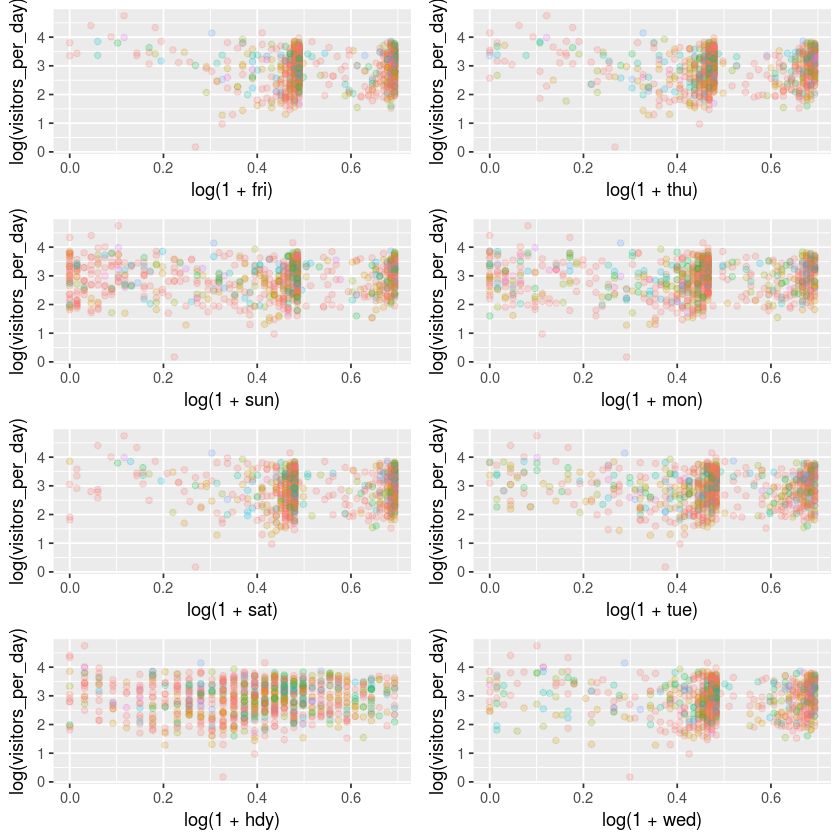

In [28]:
library(ggplot2)
reorder_size <- function(x) {
  factor(x, levels = names(sort(table(x), decreasing = TRUE)))
}

fri <-ggplot(visitor.jr, aes(x = log(1 + fri), y = log(visitors_per_day), colour = reorder_size(area_ken))) +
      geom_point(alpha = 1/5) +
      theme(legend.position = "none")
sun <- ggplot(visitor.jr, aes(x = log(1 + sun), y = log(visitors_per_day), colour = reorder_size(area_ken))) +
       geom_point(alpha = 1/5) +
       theme(legend.position = "none")
mon <- ggplot(visitor.jr, aes(x = log(1 + mon), y = log(visitors_per_day), colour = reorder_size(area_ken))) +
       geom_point(alpha = 1/5) +
       theme(legend.position = "none") 
tue <- ggplot(visitor.jr, aes(x = log(1 + tue), y = log(visitors_per_day), colour = reorder_size(area_ken))) +
       geom_point(alpha = 1/5) +
       theme(legend.position = "none") 
thu <- ggplot(visitor.jr, aes(x = log(1 + thu), y = log(visitors_per_day), colour = reorder_size(area_ken))) +
       geom_point(alpha = 1/5) +
       theme(legend.position = "none") 


sat <- ggplot(visitor.jr, aes(x = log(1 + sat), y = log(visitors_per_day), colour = reorder_size(area_ken))) +
       geom_point(alpha = 1/5) +
       theme(legend.position = "none") 
wed <- ggplot(visitor.jr, aes(x = log(1 + wed), y = log(visitors_per_day), colour = reorder_size(area_ken))) +
       geom_point(alpha = 1/5) +
       theme(legend.position = "none") 
hdy <- ggplot(visitor.jr, aes(x = log(1 + hdy), y = log(visitors_per_day), colour = reorder_size(area_ken))) +
       geom_point(alpha = 1/5) +
       theme(legend.position = "none") 

multiplot(fri, sun, sat, hdy, thu, mon, tue, wed, cols = 2)

In [12]:
str(visitor.operate)

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	829 obs. of  19 variables:
 $ air_store_id    : chr  "air_00a91d42b08b08d9" "air_0164b9927d20bcc3" "air_0241aa3964b7f861" "air_0328696196e46f18" ...
 $ opendays        : int  232 149 396 116 251 281 298 429 472 258 ...
 $ store_visitors  : int  6051 1378 3919 921 3722 6310 7059 16877 16931 2975 ...
 $ air_genre_name  : Factor w/ 14 levels "Asian","Bar/Cocktail",..: 7 7 8 5 3 3 3 8 8 9 ...
 $ area_ken        : Factor w/ 9 levels "Fukuoka-ken",..: 9 9 9 7 7 4 9 2 9 1 ...
 $ area_shi        : Factor w/ 55 levels "Abashiri-shi",..: 6 30 52 39 39 53 44 15 34 10 ...
 $ area_local      : Factor w/ 99 levels "6","Akasaka",..: 46 82 21 66 72 96 74 43 97 10 ...
 $ latitude        : Factor w/ 108 levels "33.2119674","33.3192865",..: 69 55 81 29 27 38 44 16 90 10 ...
 $ longitude       : Factor w/ 108 levels "130.195555","130.3484363",..: 86 84 91 36 27 25 61 16 54 5 ...
 $ visitors_per_day: num  26.08 9.25 9.9 7.94 14.83 ...
 $ hdy             : num  0.03

In [37]:
summary(visitor.operate$operation)

a   b   c   d   e   f   g 
219 114 131 235 110  12   8

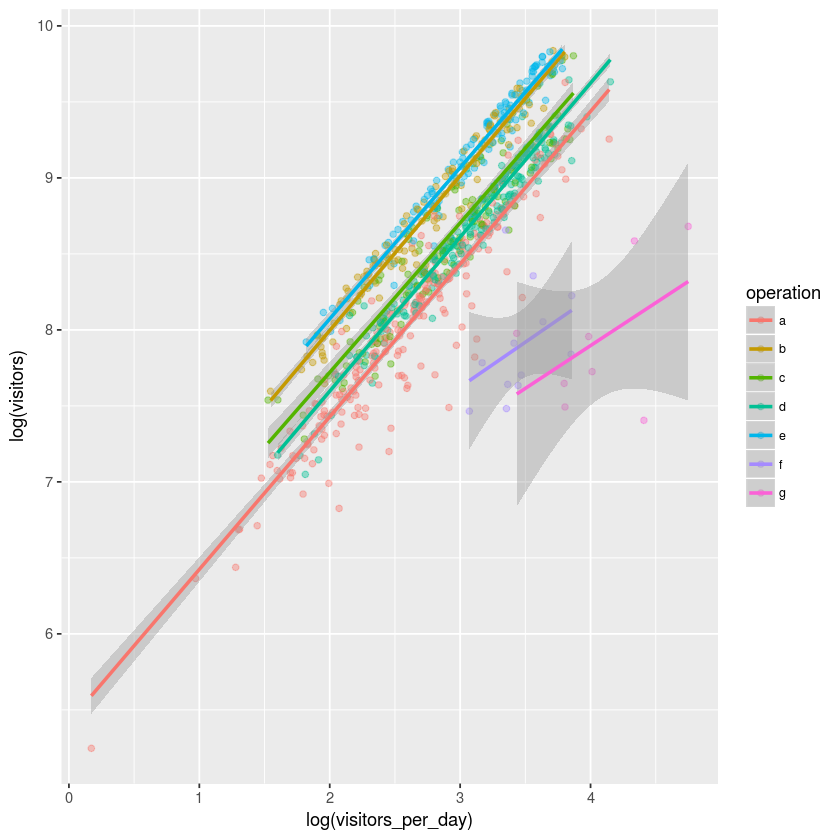

In [17]:
ggplot(visitor.operate, aes(x = log(visitors_per_day), y = log(store_visitors), colour = operation)) +
  geom_point(alpha = 2/5) +
  geom_smooth(method = lm) +
  theme(legend.text = element_text(size = 7.5)) 

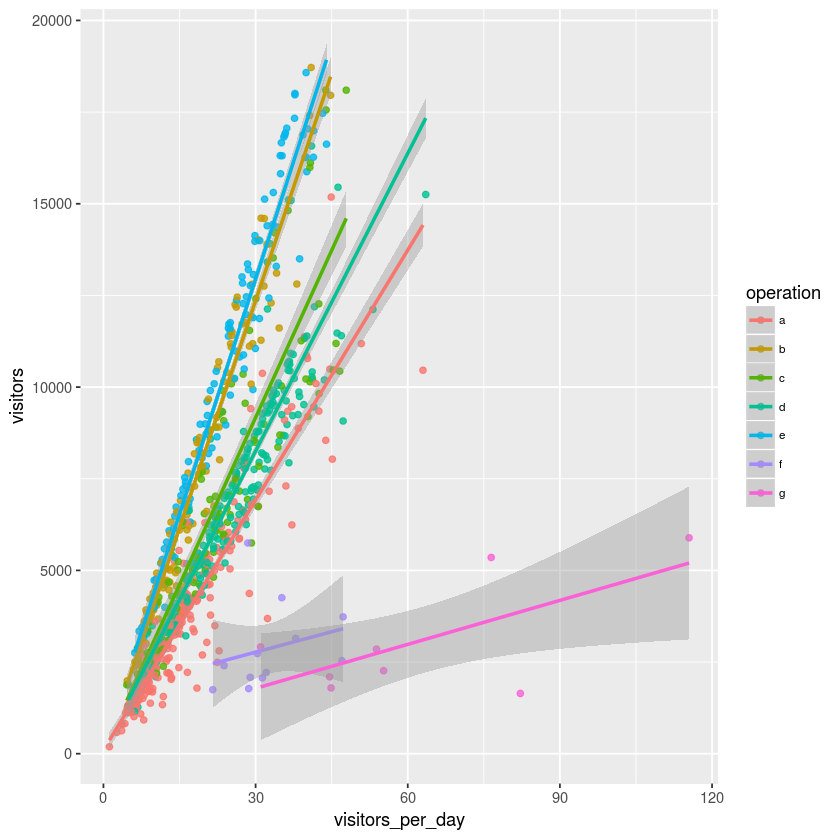

In [22]:
ggplot(visitor.operate, aes(x = visitors_per_day, y = store_visitors, colour = operation)) +
  geom_point(alpha = 4/5) +
  geom_smooth(method = glm) +
  theme(legend.text = element_text(size = 7)) 

In [66]:
operation2$air_store_id ##f
operation1$air_store_id ##g

[1] "air_2703dcb33192b181" "air_28dbe91c4c9656be" "air_2a485b92210c98b5"
 [4] "air_52a08ef3efdb4bb0" "air_6b65745d432fd77f" "air_7420042ff75f9aca"
 [7] "air_8110d68cc869b85e" "air_8e492076a1179383" "air_8e8f42f047537154"
[10] "air_965b2e0cf4119003" "air_bb4ff06cd661ee9b" "air_c6aa2efba0ffc8eb"

[1] "air_1c0b150f9e696a5f" "air_789103bf53b8096b" "air_900d755ebd2f7bbd"
[4] "air_9c6787aa03a45586" "air_9cf2f1ba86229773" "air_a17f0778617c76e2"
[7] "air_a9a380530c1e121f" "air_cf5ab75a0afb8af9"

In [76]:
library('VennDiagram')
svenn.plot <- venn.diagram(list(Operation = operation7$air_store_id, 
                                Test = set.visitor.test),
                          resolution = 350,
                          imagetype = "tiff", 
                          alpha = c(0.5, 0.5),
                          fill = c("#EBBF79", "#CCC5D2"), 
                          main.fontface = "plain",
                          main.fontfamily = "serif",
                          main = "Group Visitors and Test Set Venn Diagram", 
                          filename = "VennOperate7.tif") 

Operation Groups in Time Series

In [181]:
str(operation3)

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	219 obs. of  2 variables:
 $ air_store_id: chr  "air_0164b9927d20bcc3" "air_0328696196e46f18" "air_034a3d5b40d5b1b1" "air_0585011fa179bcce" ...
 $ operation   : chr  "a" "a" "a" "a" ...


In [6]:
## #
visitor.op3 <- visitor %>%
  left_join(operation3, by = 'air_store_id') %>%
  filter(operation == 'a') %>%
  subset(select = -c(air_store_id, operation)) %>%
  arrange(visit_date) %>%
  mutate(visit_date = as.factor(visit_date)) %>%
  group_by(visit_date) %>%
  summarise(group_visitor = sum(visitors))

visitor.op6 <- visitor %>%
  left_join(operation6, by = 'air_store_id') %>%
  filter(operation == 'b') %>%
  subset(select = -c(air_store_id, operation)) %>%
  arrange(visit_date) %>%
  mutate(visit_date = as.factor(visit_date)) %>%
  group_by(visit_date) %>%
  summarise(group_visitor = sum(visitors))

visitor.op4 <- visitor %>%
  left_join(operation4, by = 'air_store_id') %>%
  filter(operation == 'c') %>%
  subset(select = -c(air_store_id, operation)) %>%
  arrange(visit_date) %>%
  mutate(visit_date = as.factor(visit_date)) %>%
  group_by(visit_date) %>%
  summarise(group_visitor = sum(visitors))

visitor.op5 <- visitor %>%
  left_join(operation5, by = 'air_store_id') %>%
  filter(operation == 'd') %>%
  subset(select = -c(air_store_id, operation)) %>%
  arrange(visit_date) %>%
  mutate(visit_date = as.factor(visit_date)) %>%
  group_by(visit_date) %>%
  summarise(group_visitor = sum(visitors))

visitor.op7 <- visitor %>%
  left_join(operation7, by = 'air_store_id') %>%
  filter(operation == 'e') %>%
  subset(select = -c(air_store_id, operation)) %>%
  arrange(visit_date) %>%
  mutate(visit_date = as.factor(visit_date)) %>%
  group_by(visit_date) %>%
  summarise(group_visitor = sum(visitors))

visitor.op2 <- visitor %>%
  left_join(operation2, by = 'air_store_id') %>%
  filter(operation == 'f') %>%
  subset(select = -c(air_store_id, operation)) %>%
  arrange(visit_date) %>%
  mutate(visit_date = as.factor(visit_date)) %>%
  group_by(visit_date) %>%
  summarise(group_visitor = sum(visitors))

visitor.op1 <- visitor %>%
  left_join(operation1, by = 'air_store_id') %>%
  filter(operation == 'g') %>%
  subset(select = -c(air_store_id, operation)) %>%
  arrange(visit_date) %>%
  mutate(visit_date = as.factor(visit_date)) %>%
  group_by(visit_date) %>%
  summarise(group_visitor = sum(visitors))

In [198]:
head(visitor.op3)

visit_date group_visitor
1 2016-01-01   7          
2 2016-01-02   2          
3 2016-01-03  40          
4 2016-01-04  67          
5 2016-01-05 228          
6 2016-01-06 167

In [199]:
str(visitor.op3)

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	478 obs. of  2 variables:
 $ visit_date   : Factor w/ 478 levels "2016-01-01","2016-01-02",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ group_visitor: int  7 2 40 67 228 167 215 302 364 133 ...


In [57]:
##
group <- matrix(c(visitor.op3$group_visitor, 
                  visitor.op6$group_visitor, 
                  visitor.op4$group_visitor, 
                  visitor.op5$group_visitor, 
                  visitor.op7$group_visitor), nrow = 478, ncol = 5)
write.csv(group[3:478,], file = "group.csv", row.names = FALSE) 

In [56]:
str(group[3:478,])

 int [1:476, 1:5] 40 67 228 167 215 302 364 133 56 249 ...


In [41]:
head(group)

[,1] [,2] [,3] [,4] [,5]
[1,]   7   324 114  100   488
[2,]   2   596 281   78   807
[3,]  40   803 373  123  1029
[4,]  67   953 162  269  1875
[5,] 228  1077 534  174  1914
[6,] 167   998 592  249  2148

In [44]:
head(visitor.op7$group_visitor)

[1]  488  807 1029 1875 1914 2148

In [7]:
## #
op1 <- ts(visitor.op1$group_visitor, start = c(2016, 1), frequency = 365)
op2 <- ts(visitor.op2$group_visitor, start = c(2016, 1), frequency = 365)
op3 <- ts(visitor.op3$group_visitor, start = c(2016, 1, 1), deltat = 1/365)
op3.mean <- ts((visitor.op3$group_visitor)/219, start = c(2016, 1, 1), frequency = 365)
#acf(diff(diff(diff(op3.mean, differences = 1))), ylim = c(-1, 1))
#pacf(diff(op3.mean, differences = 2), ylim = c(-1, 1))
op4 <- ts(visitor.op4$group_visitor, start = c(2016, 1), frequency = 365)
op5 <- ts(visitor.op5$group_visitor, start = c(2016, 1), frequency = 365)
op6 <- ts(visitor.op6$group_visitor, start = c(2016, 1), frequency = 365)
op7 <- ts(visitor.op7$group_visitor, start = c(2016, 1), frequency = 365)

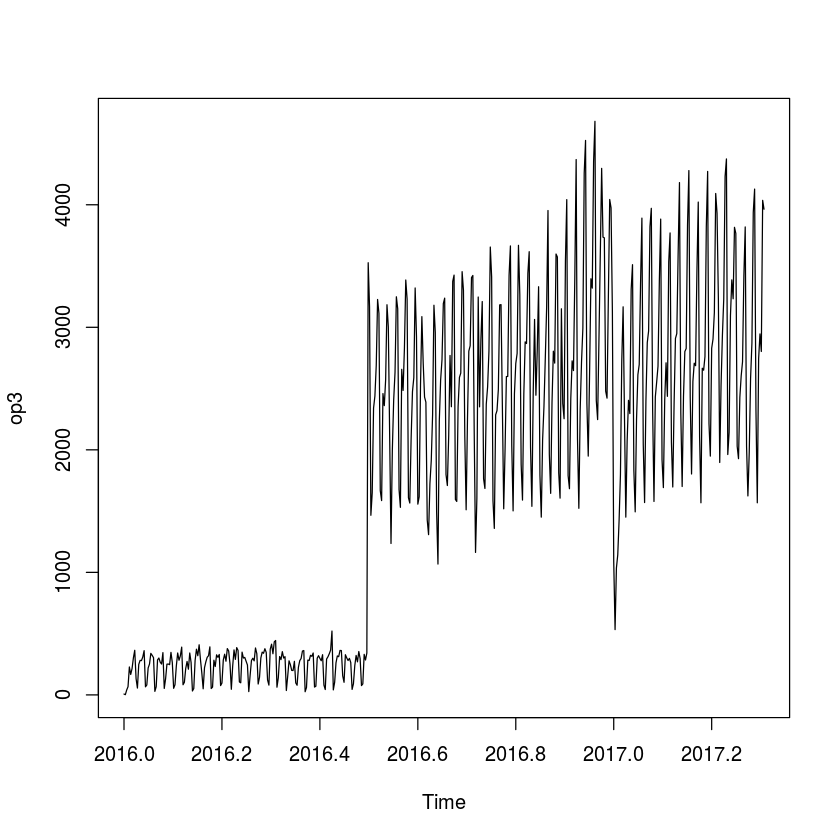

In [283]:
plot(op3)

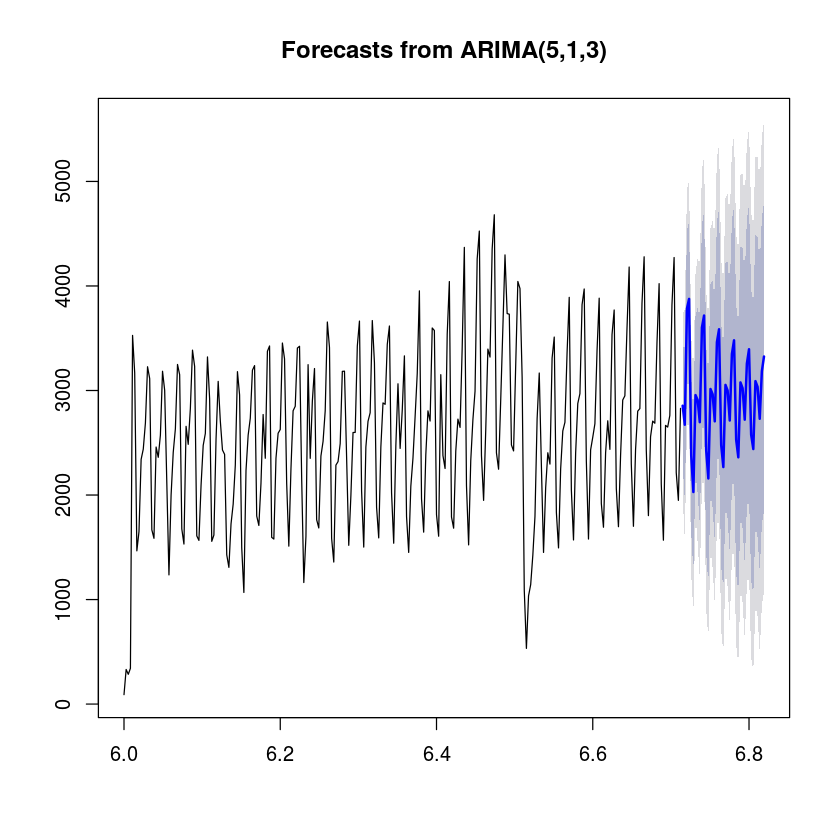

In [315]:
library(forecast)
visitor.op3.train <- visitor.op3[179:439,]
op3t <- ts(visitor.op3.train$group_visitor, start = c(06), deltat = 1/365)
fit3t <- auto.arima(op3t)
plot(forecast(fit3t, h = 39))

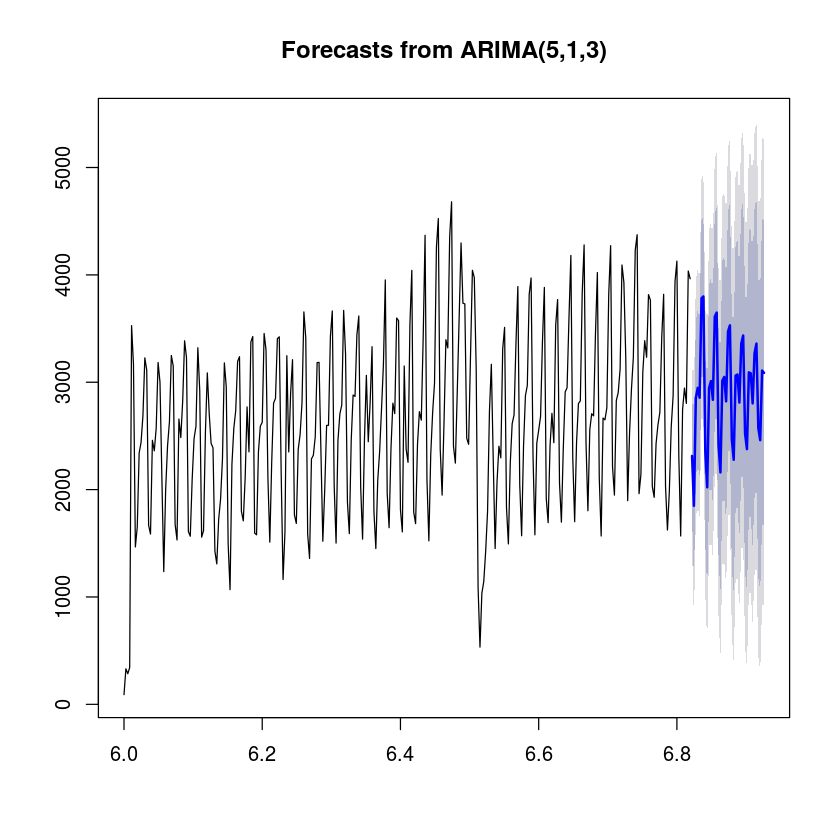

In [8]:
library(forecast)
## #
visitor.op3.test <- visitor.op3[179:478,]
op3s <- ts(visitor.op3.test$group_visitor, start = c(06), deltat = 1/365)
fit3 <- auto.arima(op3s)
plot(forecast(fit3, h = 39))

In [317]:
summary(forecast(fit3, h = 39))


Forecast method: ARIMA(5,1,3)

Model Information:
Series: op3s 
ARIMA(5,1,3) 

Coefficients:
         ar1      ar2      ar3      ar4      ar5      ma1     ma2      ma3
      0.1699  -0.9405  -0.0697  -0.4624  -0.5347  -0.3971  0.5084  -0.2549
s.e.  0.0789   0.0619   0.1082   0.0572   0.0722   0.0894  0.0642   0.1129

sigma^2 estimated as 198414:  log likelihood=-1953.73
AIC=3925.46   AICc=3926.18   BIC=3957.5

Error measures:
                   ME     RMSE      MAE       MPE     MAPE MASE        ACF1
Training set 26.73562 437.6892 318.4856 -1.422988 14.65409  NaN -0.03971451

Forecasts:
         Point Forecast    Lo 80    Hi 80     Lo 95    Hi 95
6.715068       2854.264 2283.414 3425.114 1981.2243 3727.303
6.717808       2672.500 1951.047 3393.954 1569.1329 3775.868
6.720548       3783.360 3041.569 4525.151 2648.8880 4917.831
6.723288       3876.089 3131.583 4620.594 2737.4649 5014.712
6.726027       2377.627 1631.895 3123.359 1237.1283 3518.126
6.728767       2028.879 1278.341 2779.4

In [8]:
forecast.a <- c(2854.264, 2672.500, 4525.151, 4620.594, 1631.895, 2028.879, 2955.919, 
                2909.097, 2696.908, 4591.886, 4709.953, 2425.645, 2158.448, 4018.284, 
                2963.893, 2704.973, 4615.954, 4742.587, 2477.660, 2267.639, 4223.386, 
                2999.769, 2712.880, 4626.577, 4761.304, 2528.303, 2360.711, 4374.175, 
                3022.261, 2720.944, 4636.570, 4777.777, 2576.206, 2439.855, 4490.893, 
                3035.059, 2729.506, 4650.517, 4796.259)
groufore.a <- matrix(forecast.a, nrow = 39, ncol = 219)

In [91]:
## #
groufore.a <- matrix(forecast(fit3, h = 39)$mean, nrow = 39, ncol = 219)

In [11]:
head(groufore.a)

[,1]     [,2]     [,3]     [,4]     [,5]     [,6]     [,7]     [,8]    
[1,] 2854.264 2854.264 2854.264 2854.264 2854.264 2854.264 2854.264 2854.264
[2,] 2672.500 2672.500 2672.500 2672.500 2672.500 2672.500 2672.500 2672.500
[3,] 4525.151 4525.151 4525.151 4525.151 4525.151 4525.151 4525.151 4525.151
[4,] 4620.594 4620.594 4620.594 4620.594 4620.594 4620.594 4620.594 4620.594
[5,] 1631.895 1631.895 1631.895 1631.895 1631.895 1631.895 1631.895 1631.895
[6,] 2028.879 2028.879 2028.879 2028.879 2028.879 2028.879 2028.879 2028.879
     [,9]     [,10]    [,11] [,12]    [,13]    [,14]    [,15]    [,16]   
[1,] 2854.264 2854.264 ⋯     2854.264 2854.264 2854.264 2854.264 2854.264
[2,] 2672.500 2672.500 ⋯     2672.500 2672.500 2672.500 2672.500 2672.500
[3,] 4525.151 4525.151 ⋯     4525.151 4525.151 4525.151 4525.151 4525.151
[4,] 4620.594 4620.594 ⋯     4620.594 4620.594 4620.594 4620.594 4620.594
[5,] 1631.895 1631.895 ⋯     1631.895 1631.895 1631.895 1631.895 1631.895
[6,] 2028.879 2028.879 ⋯     2028.879 2028.879 2028.879 2028.879 2028.879
     [,17]    [,18]    [,19]    [,20]    [,21]   
[1,] 2854.264 2854.264 2854.264 2854.264 2854.264
[2,] 2672.500 2672.500 2672.500 2672.500 2672.500
[3,] 4525.151 4525.151 4525.151 4525.151 4525.151
[4,] 4620.594 4620.594 4620.594 4620.594 4620.594
[5,] 1631.895 1631.895 1631.895 1631.895 1631.895
[6,] 2028.879 2028.879 2028.879 2028.879 2028.879

In [246]:
library("tseries")
adf.test(op3)


	Augmented Dickey-Fuller Test

data:  op3
Dickey-Fuller = -2.3882, Lag order = 7, p-value = 0.4138
alternative hypothesis: stationary


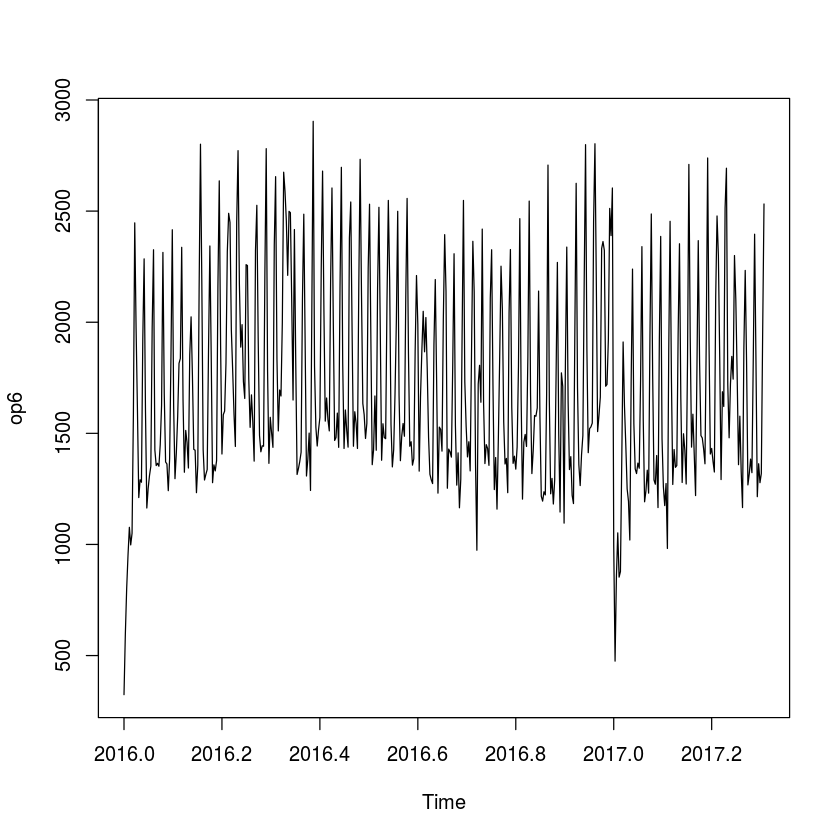

In [263]:
plot(op6)

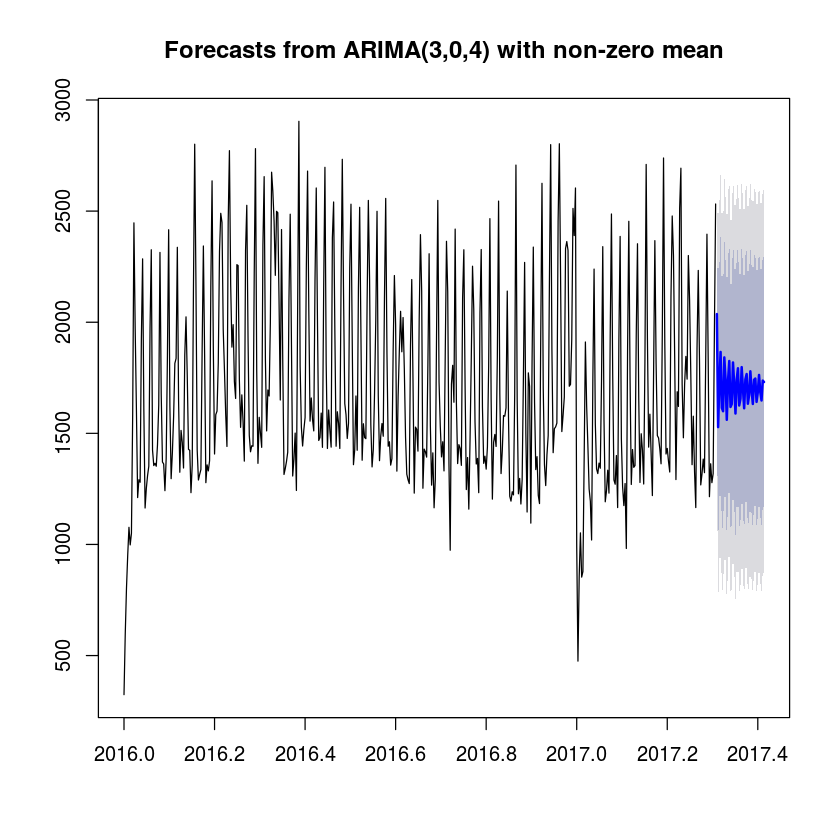

In [153]:
library(forecast)
## #
fit6 <- auto.arima(op6)
plot(forecast(fit6, h = 39))

In [15]:
summary(forecast(fit6, h = 39))


Forecast method: ARIMA(3,0,4) with non-zero mean

Model Information:
Series: op6 
ARIMA(3,0,4) with non-zero mean 

Coefficients:
         ar1      ar2     ar3     ma1     ma2      ma3      ma4       mean
      0.5170  -0.4825  0.9198  0.2846  0.1288  -0.6889  -0.5431  1692.0388
s.e.  0.0264   0.0290  0.0255  0.0449  0.0348   0.0384   0.0368    56.2119

sigma^2 estimated as 102107:  log likelihood=-3432.24
AIC=6882.49   AICc=6882.87   BIC=6920.02

Error measures:
                   ME     RMSE      MAE       MPE    MAPE      MASE     ACF1
Training set 7.043474 316.8564 254.9106 -3.627764 15.9883 0.7331917 0.094398

Forecasts:
          Point Forecast    Lo 80    Hi 80     Lo 95    Hi 95
2017.3096       2036.638 1627.129 2446.147 1410.3482 2662.928
2017.3123       1528.021 1003.175 2052.868  725.3378 2330.704
2017.3151       1726.274 1200.838 2251.709  922.6898 2529.857
2017.3178       1866.130 1338.229 2394.031 1058.7747 2673.485
2017.3205       1614.664 1085.158 2144.170  804.8538 24

In [9]:
forecast.b <- c(2662.928, 1003.175, 1726.274, 2394.031, 1085.158, 2133.477, 2659.676, 
                1742.872, 1021.162, 1737.410, 2366.861, 1618.626, 2465.509, 1818.859, 
                1719.324, 1039.870, 1742.360, 1792.769, 1625.255, 2207.930, 1797.866, 
                1703.104, 1057.401, 1743.077, 1766.835, 1633.205, 2230.016, 2336.978, 
                1692.381, 1632.209, 1741.031, 1746.552, 1641.552, 2542.209, 2323.651, 
                1685.700, 2209.791, 1737.310, 1730.916)
groufore.b <- matrix(forecast.b, nrow = 39, ncol = 114)

In [154]:
## #
groufore.b <- matrix(forecast(fit6, h = 39)$mean, nrow = 39, ncol = 114)

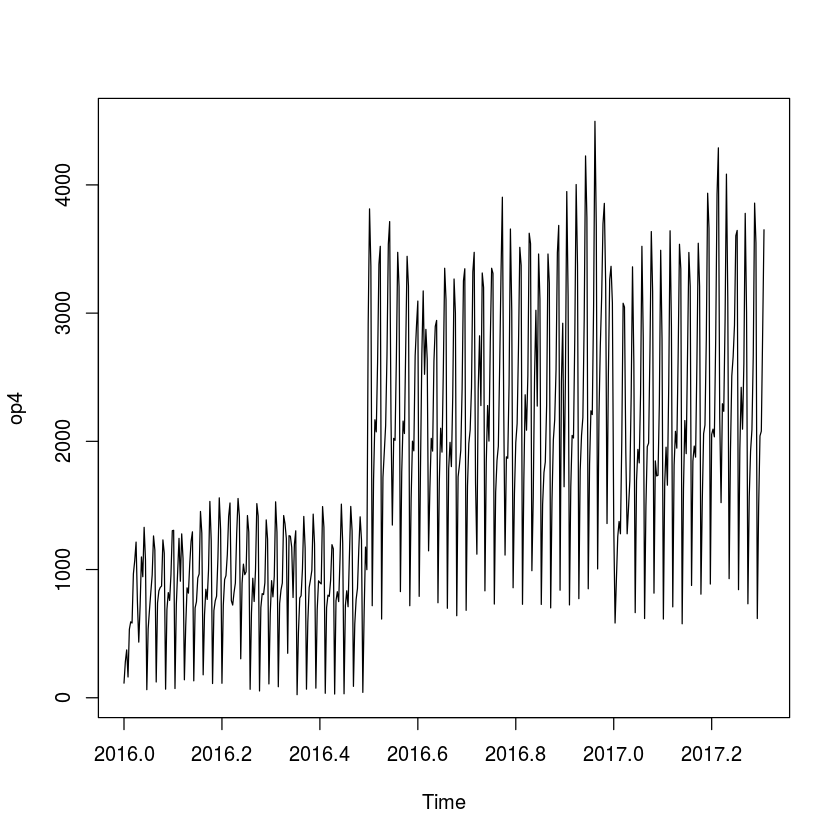

In [264]:
plot(op4)

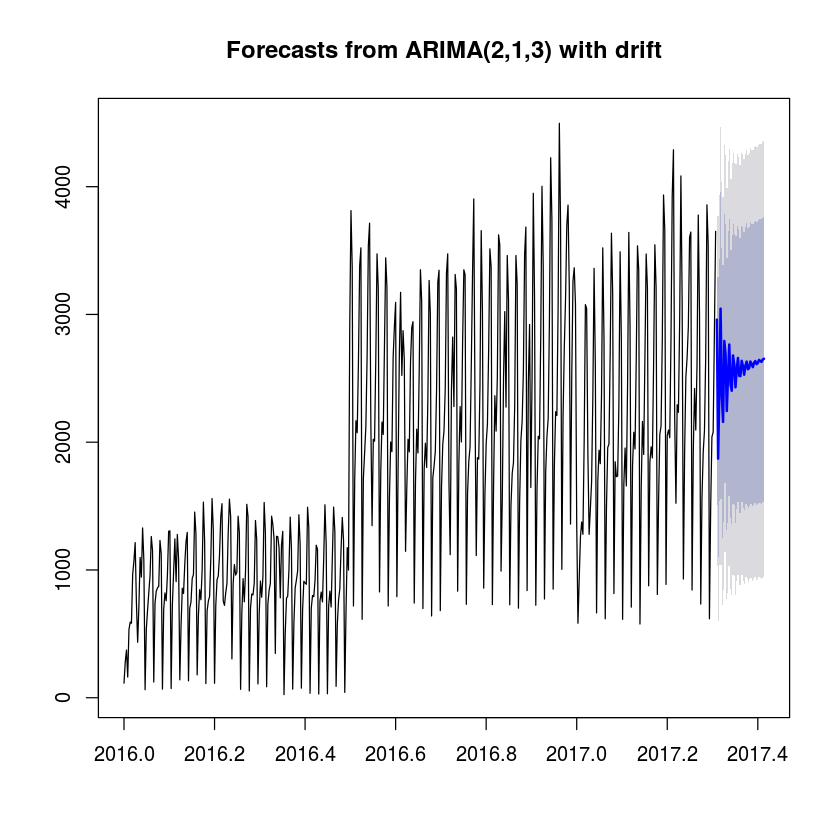

In [155]:
## #
fit4 <- auto.arima(op4)
plot(forecast(fit4, h = 39))

In [21]:
summary(forecast(fit4, h = 39))


Forecast method: ARIMA(2,1,3) with drift

Model Information:
Series: op4 
ARIMA(2,1,3) with drift 

Coefficients:
          ar1      ar2      ma1     ma2      ma3   drift
      -0.4250  -0.7872  -0.0774  0.0494  -0.7914  3.9531
s.e.   0.0346   0.0439   0.0429  0.0513   0.0273  2.5220

sigma^2 estimated as 434384:  log likelihood=-3771.71
AIC=7557.41   AICc=7557.65   BIC=7586.58

Error measures:
                   ME     RMSE      MAE       MPE     MAPE      MASE      ACF1
Training set 4.584265 654.2347 507.1841 -60.71654 84.14645 0.3360332 0.1026672

Forecasts:
          Point Forecast     Lo 80    Hi 80     Lo 95    Hi 95
2017.3096       2959.416 2114.7734 3804.059 1667.6464 4251.186
2017.3123       1871.270  927.8571 2814.683  428.4446 3314.095
2017.3151       2408.189 1464.5063 3351.872  964.9507 3851.428
2017.3178       3045.321 2086.6690 4003.973 1579.1893 4511.453
2017.3205       2360.598 1371.8790 3349.316  848.4830 3872.712
2017.3233       2158.819 1153.4045 3164.234  621.1701

In [10]:
forecast.c <- c(3804.059, 1871.270, 2408.189, 4003.973, 2360.598, 2158.819, 2792.345, 
                2690.662, 2243.910, 2522.586, 2764.570, 2451.089, 2402.582, 2678.719, 
                2608.281, 2429.588, 2569.733, 2659.580, 2519.814, 2517.236, 2637.101,
                2596.929, 2528.390, 2597.890, 2631.050, 2570.990, 2579.159, 2631.712, 
                2611.689, 2587.575, 2622.331, 2635.287, 2611.165, 2619.964, 2643.958, 
                2635.578, 2628.997, 2647.136 ,2653.352)
groufore.c <- matrix(forecast.c, nrow = 39, ncol = 131)

In [156]:
## #
groufore.c <- matrix(forecast(fit4, h = 39)$mean, nrow = 39, ncol = 131)

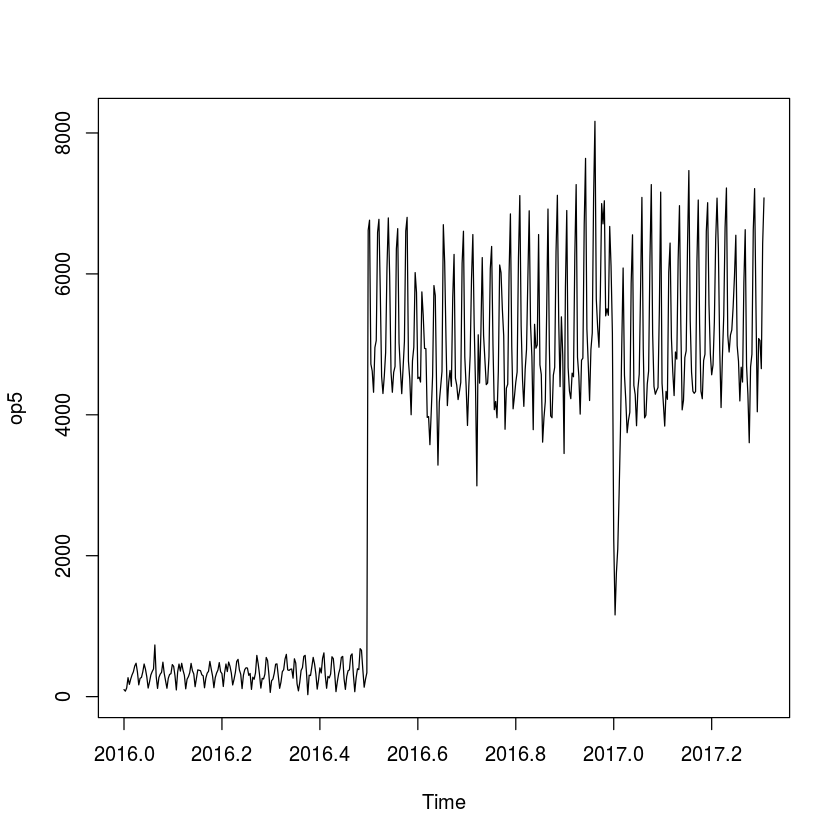

In [334]:
plot(op5)

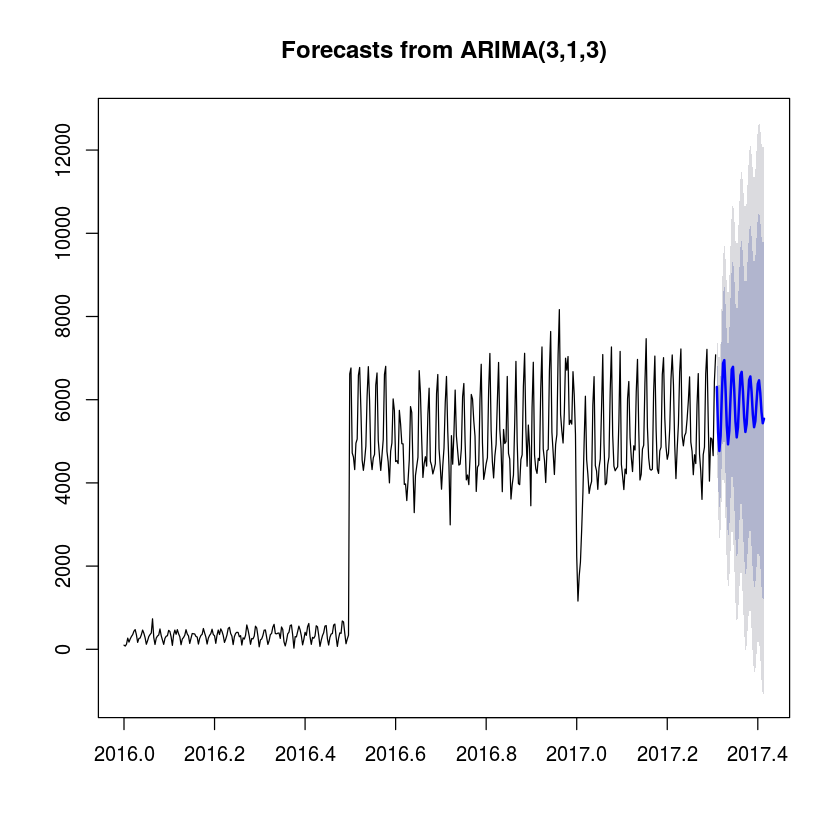

In [145]:
## #
fit5 <- auto.arima(op5)
plot(forecast(fit5, h = 39))

In [23]:
summary(forecast(fit5, h = 39))


Forecast method: ARIMA(3,1,3)

Model Information:
Series: op5 
ARIMA(3,1,3) 

Coefficients:
         ar1     ar2      ar3      ma1      ma2     ma3
      0.3691  0.0938  -0.8148  -0.3851  -0.3751  0.7943
s.e.  0.0473  0.0567   0.0520   0.0462   0.0716  0.0471

sigma^2 estimated as 474889:  log likelihood=-3792.44
AIC=7598.89   AICc=7599.13   BIC=7628.06

Error measures:
                   ME     RMSE      MAE       MPE     MAPE       MASE
Training set 15.90355 684.0572 440.9537 -6.191216 23.30982 0.09337512
                   ACF1
Training set -0.2028579

Forecasts:
          Point Forecast    Lo 80     Hi 80       Lo 95     Hi 95
2017.3096       6305.445 5422.300  7188.590  4954.79115  7656.099
2017.3123       5209.134 3970.138  6448.130  3314.25252  7104.015
2017.3151       4767.471 3384.076  6150.866  2651.75128  6883.192
2017.3178       5131.093 3659.334  6602.852  2880.23219  7381.954
2017.3205       6117.144 4578.628  7655.659  3764.18731  8470.100
2017.3233       6875.060 5214.

In [11]:
forecast.d <- c(6305.445, 5209.134, 4767.471, 5131.093, 6117.144, 6875.060, 6951.019, 
                6246.720, 5376.347, 4927.143, 5253.561, 6041.078, 6728.374, 6789.956,
                6235.492, 5476.614, 5094.330, 5333.823, 6004.688, 6586.247, 6668.689,
                6207.051, 5570.545, 5225.140, 5414.088, 5970.049, 6474.408, 6558.760, 
                6184.210, 5642.930, 5339.283, 5481.618, 5946.702, 6379.122, 6466.378, 
                6160.197, 5703.039, 5434.489, 5541.962)
groufore.d <- matrix(forecast.d, nrow = 39, ncol = 131)

In [146]:
## #
groufore.d <- matrix(forecast(fit5, h = 39)$mean, nrow = 39, ncol = 131)

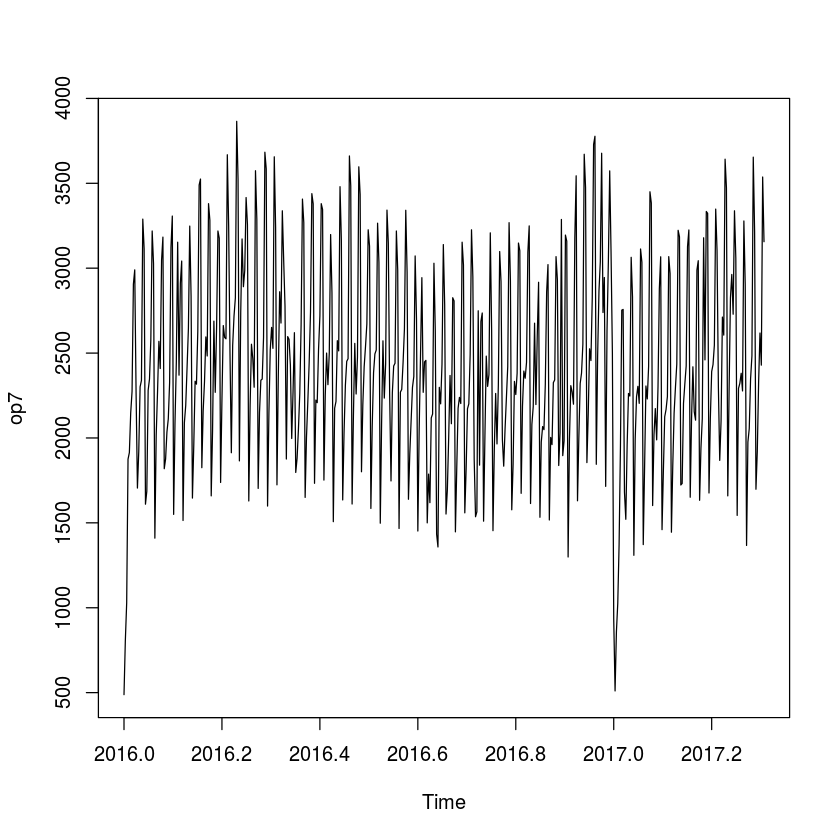

In [266]:
plot(op7)

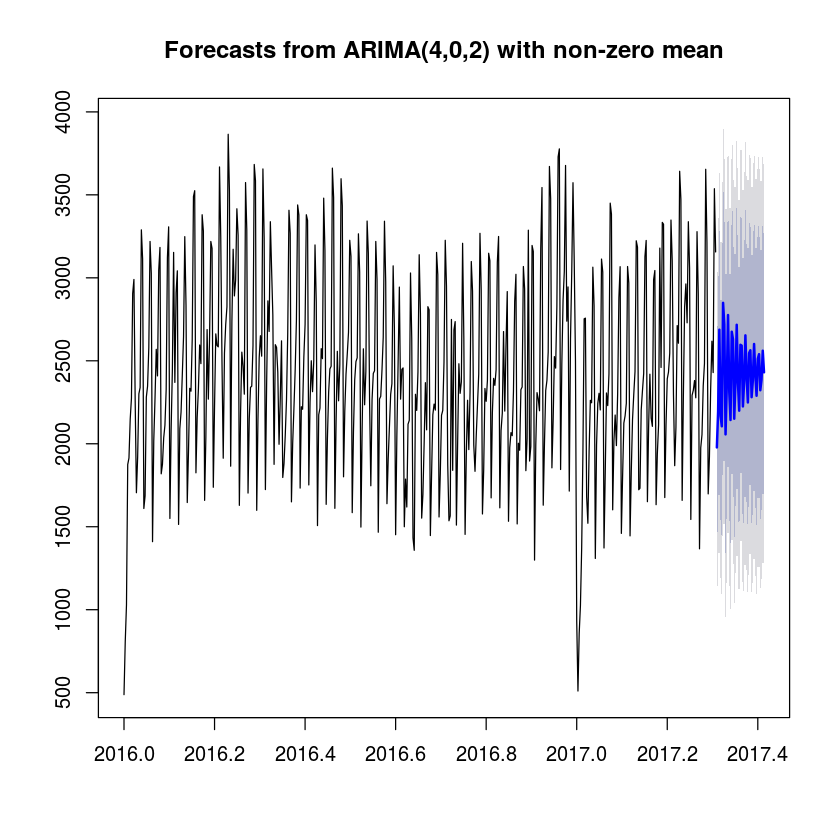

In [157]:
## #
fit7 <- auto.arima(op7)
plot(forecast(fit7, h = 39))

In [25]:
summary(forecast(fit7, h = 39))


Forecast method: ARIMA(4,0,2) with non-zero mean

Model Information:
Series: op7 
ARIMA(4,0,2) with non-zero mean 

Coefficients:
         ar1      ar2     ar3      ar4     ma1     ma2       mean
      0.5232  -1.1173  0.6284  -0.5316  0.0475  0.8802  2435.6078
s.e.  0.0437   0.0375  0.0359   0.0421  0.0280  0.0273    26.2124

sigma^2 estimated as 200741:  log likelihood=-3594.57
AIC=7205.15   AICc=7205.45   BIC=7238.5

Error measures:
                     ME     RMSE     MAE      MPE     MAPE      MASE       ACF1
Training set -0.2818377 444.7482 362.777 -4.69312 17.57704 0.7175405 -0.1375634

Forecasts:
          Point Forecast    Lo 80    Hi 80     Lo 95    Hi 95
2017.3096       1977.968 1403.780 2552.155 1099.8236 2856.112
2017.3123       2193.256 1532.134 2854.378 1182.1575 3204.355
2017.3151       2687.256 2025.189 3349.323 1674.7115 3699.800
2017.3178       2167.481 1505.282 2829.679 1154.7355 3180.226
2017.3205       2105.159 1429.945 2780.373 1072.5083 3137.809
2017.3233      

In [12]:
forecast.e <- c(1403.780, 2193.256, 3349.323, 2167.481, 2105.159, 3564.443, 2718.965, 
                1318.857, 2356.332, 3516.528, 2313.336, 2143.313, 3427.808, 3382.535, 
                2150.955, 2375.547, 3479.646, 2367.766, 2199.379, 3366.020, 3361.046,
                2225.037, 2377.921, 3428.177, 2398.654, 2248.945, 2546.581, 2563.363, 
                2280.816, 2380.850, 3383.350, 2418.232, 2289.408, 2511.682, 2539.811, 
                2322.502, 2385.534, 2560.813, 2430.592)
groufore.e <- matrix(forecast.d, nrow = 39, ncol = 131)

In [158]:
## #
groufore.e <- matrix(forecast(fit7, h = 39)$mean, nrow = 39, ncol = 131)

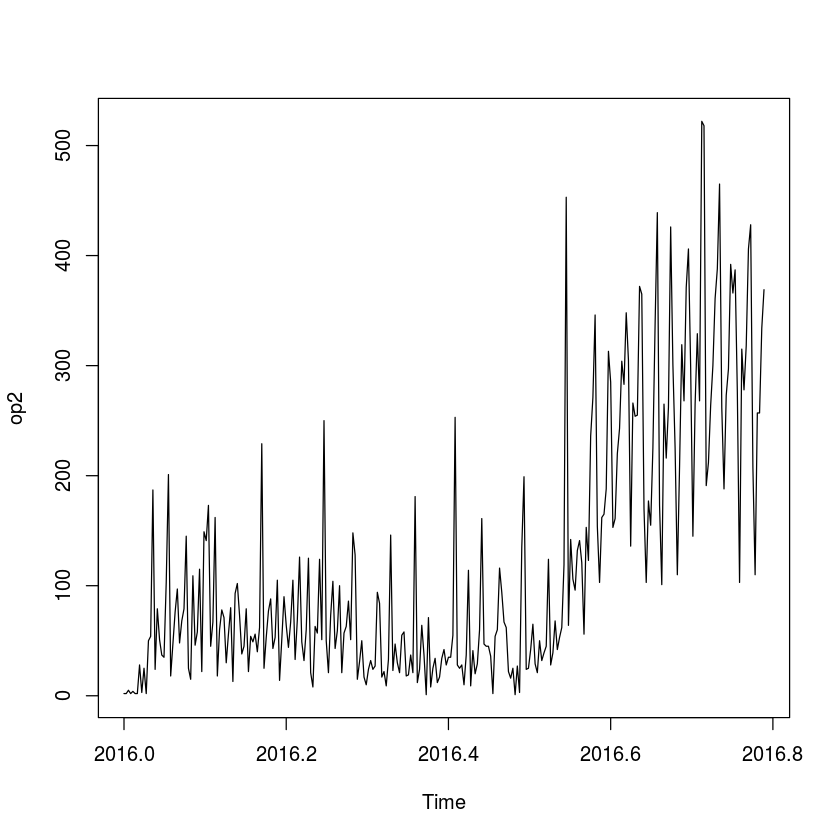

In [267]:
plot(op2)

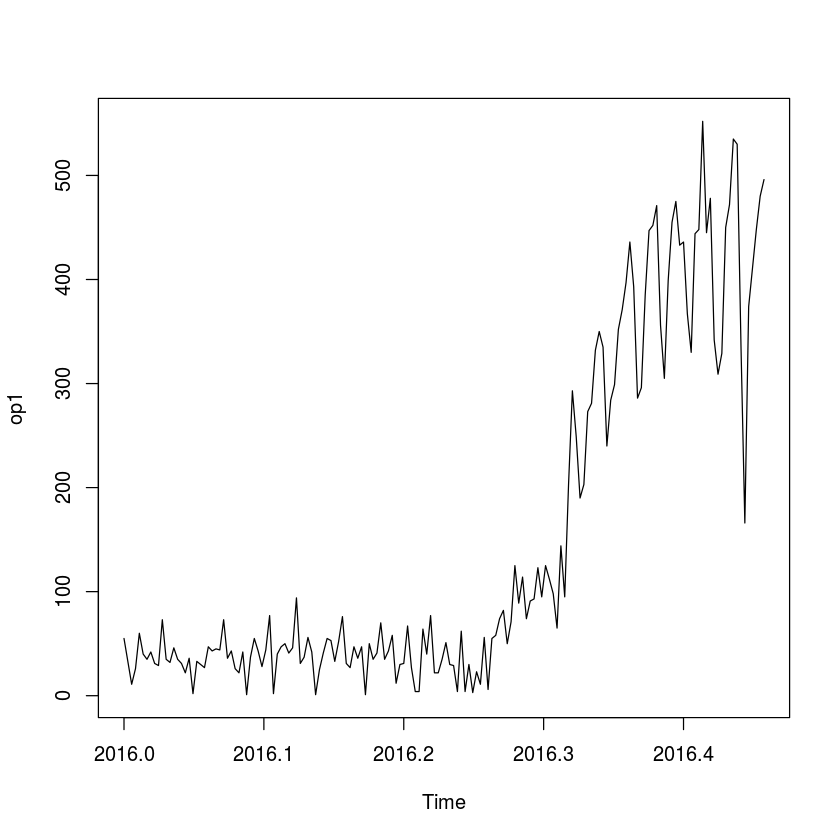

In [268]:
plot(op1)

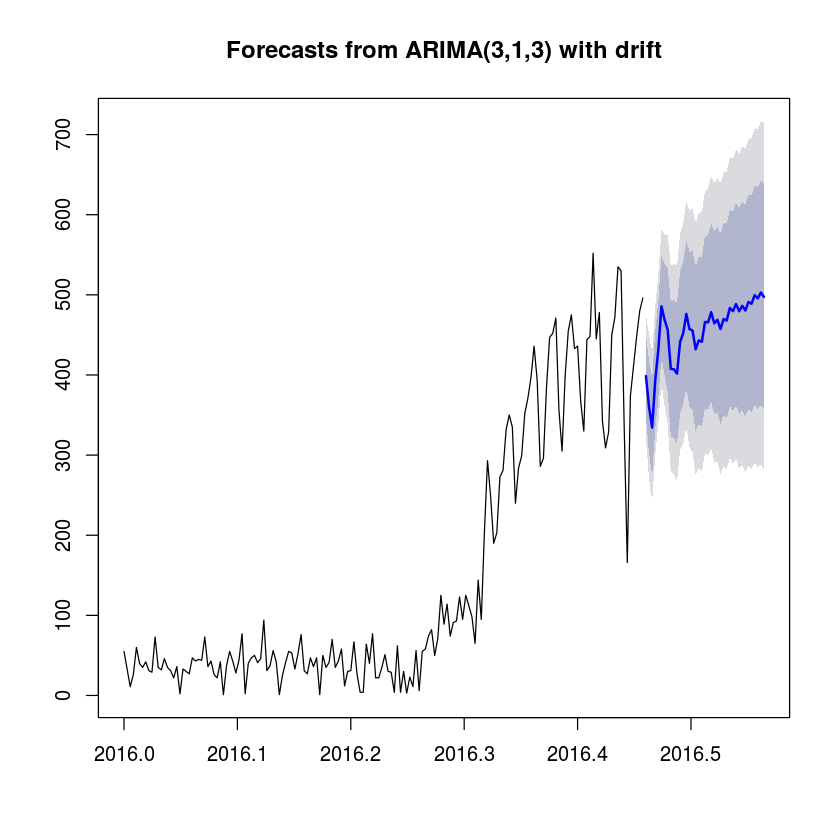

In [341]:
fit1 <- auto.arima(op1)
plot(forecast(fit1, h = 39))

In [353]:
str(visitor.op2)
str(visitor.op1)

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	289 obs. of  2 variables:
 $ visit_date   : Factor w/ 289 levels "2016-01-27","2016-02-25",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ group_visitor: int  2 2 5 2 4 2 2 28 3 25 ...
Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	168 obs. of  2 variables:
 $ visit_date   : Factor w/ 168 levels "2016-07-02","2016-07-05",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ group_visitor: int  55 33 11 26 60 40 35 42 31 29 ...


In [358]:
str(visitor.op7)

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	478 obs. of  2 variables:
 $ visit_date   : Factor w/ 478 levels "2016-01-01","2016-01-02",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ group_visitor: int  488 807 1029 1875 1914 2148 2274 2906 2990 2268 ...


In [84]:
## 
state <- as.tibble(fread('state.csv'))
sd <- matrix(c(1328.91754379, 443.85331613, 1033.7109284, 2463.08917468, 601.98794678), 
             nrow = 39, ncol = 5, byrow = TRUE)
m <- matrix(c(1739.95378151, 1714.25630252, 1776.9894958, 3303.07352941, 2443.8907563), 
            nrow = 39, ncol = 5, byrow = TRUE)
state.op <- state * sd + m

groufore.a <- state.op$V1
groufore.b <- state.op$V2
groufore.c <- state.op$V3
groufore.d <- state.op$V4
groufore.e <- state.op$V5

In [86]:
head(state.op)

V1       V2       V3       V4       V5      
1 2623.897 1709.696 2218.917 5103.054 2436.264
2 2623.899 1709.696 2218.918 5103.057 2436.264
3 2623.901 1709.696 2218.919 5103.062 2436.264
4 2623.904 1709.696 2218.921 5103.066 2436.263
5 2623.906 1709.696 2218.922 5103.072 2436.263
6 2623.909 1709.695 2218.923 5103.077 2436.263

In [72]:
head(sd)

[,1]     [,2]     [,3]     [,4]     [,5]    
[1,] 1328.918 443.8533 1033.711 2463.089 601.9879
[2,] 1328.918 443.8533 1033.711 2463.089 601.9879
[3,] 1328.918 443.8533 1033.711 2463.089 601.9879
[4,] 1328.918 443.8533 1033.711 2463.089 601.9879
[5,] 1328.918 443.8533 1033.711 2463.089 601.9879
[6,] 1328.918 443.8533 1033.711 2463.089 601.9879

In [ ]:
multiplot(c(plot(ts(groufore.a)), 
            plot(ts(groufore.b)), 
            plot(ts(groufore.c)),
            plot(ts(groufore.d)), 
            plot(ts(groufore.e))), cols = 5)

Composition from Time Series forecasts and stateful GRU RNN share prediction

In [29]:
str(operation3)

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	219 obs. of  2 variables:
 $ air_store_id: chr  "air_0164b9927d20bcc3" "air_0328696196e46f18" "air_034a3d5b40d5b1b1" "air_0585011fa179bcce" ...
 $ operation   : chr  "a" "a" "a" "a" ...


In [9]:
library('tidyr') # data wrangling
##
visitor.3a <- visitor %>%
  left_join(operation3, by = 'air_store_id') %>%
  filter(operation == 'a') %>%
  subset(select = -operation)
visitor.astore <- spread(visitor.3a, key = air_store_id, value = visitors)
visitor.astore[is.na(visitor.astore)] <- 0  

In [56]:
head(visitor.astore[179:478,])

visit_date air_0164b9927d20bcc3 air_0328696196e46f18 air_034a3d5b40d5b1b1
1 2016-06-27 0                    0                     0                  
2 2016-06-28 0                    0                     0                  
3 2016-06-29 0                    0                     0                  
4 2016-06-30 0                    0                     0                  
5 2016-07-01 0                    0                    19                  
6 2016-07-02 0                    0                    23                  
  air_0585011fa179bcce air_066f0221b8a4d533 air_084d98859256acf0
1  0                    0                    0                  
2  0                    0                    0                  
3  0                    0                    0                  
4  0                    0                    0                  
5  7                   14                   30                  
6 26                   15                   10                  
  air_0867f7bebad6a649 air_08ef81d5b7a0d13f air_09040f6df960ddb8 ⋯
1 0                     0                    0                   ⋯
2 0                     0                    0                   ⋯
3 0                     0                    0                   ⋯
4 0                     0                    0                   ⋯
5 0                    29                    3                   ⋯
6 0                    19                   28                   ⋯
  air_f180301886c21375 air_f3602e4fa2f12993 air_f690c42545146e0a
1  0                    0                    0                  
2  0                    0                    4                  
3  0                    0                   15                  
4  0                    0                    4                  
5 17                   15                   12                  
6  2                   15                    7                  
  air_f6bfd27e2e174d16 air_f85e21e543cf44f2 air_fb44f566d4f64a4e
1  0                   0                     0                  
2  0                   0                     0                  
3  0                   0                     0                  
4  0                   0                     0                  
5 16                   7                    41                  
6 12                   0                    32                  
  air_fcfbdcf7b1f82c6e air_fd154088b1de6fa7 air_fdcfef8bd859f650
1  0                   0                    0                   
2  0                   0                    0                   
3  0                   0                    0                   
4  0                   0                    0                   
5 70                   0                    2                   
6 31                   1                    2                   
  air_fff68b929994bfbd
1 0                   
2 0                   
3 0                   
4 0                   
5 3                   
6 3

In [87]:
str(visitor.astore[179:478,])

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	300 obs. of  220 variables:
 $ visit_date          : chr  "2016-06-27" "2016-06-28" "2016-06-29" "2016-06-30" ...
 $ air_0164b9927d20bcc3: num  0 0 0 0 0 0 0 0 0 0 ...
 $ air_0328696196e46f18: num  0 0 0 0 0 0 11 4 6 4 ...
 $ air_034a3d5b40d5b1b1: num  0 0 0 0 19 23 5 13 0 10 ...
 $ air_0585011fa179bcce: num  0 0 0 0 7 26 3 6 10 12 ...
 $ air_066f0221b8a4d533: num  0 0 0 0 14 15 3 27 26 16 ...
 $ air_084d98859256acf0: num  0 0 0 0 30 10 0 15 16 13 ...
 $ air_0867f7bebad6a649: num  0 0 0 0 0 0 0 0 0 0 ...
 $ air_08ef81d5b7a0d13f: num  0 0 0 0 29 19 1 11 12 10 ...
 $ air_09040f6df960ddb8: num  0 0 0 0 3 28 9 0 4 18 ...
 $ air_09fd1f5c58583141: num  0 0 0 0 2 9 7 0 1 0 ...
 $ air_0e7c11b9abc50163: num  0 0 0 0 14 19 17 0 15 15 ...
 $ air_0ead98dd07e7a82a: num  0 0 0 0 0 3 0 12 0 0 ...
 $ air_0f60e1576a7d397d: num  0 0 0 0 5 11 0 0 3 6 ...
 $ air_1509881b22965b34: num  2 4 0 5 0 0 0 13 0 2 ...
 $ air_152c1f08d7d20e07: num  0 0 0 0 3 16 0 0 0 0 ...


In [10]:
##
#extracting store visitors
storevisitor.a <- visitor.astore[185:478,]
store.va <- storevisitor.a[,2:220]
#producing reciprocal constant list
reci.op3 <- visitor.op3[185:478,] %>%
  mutate(fr = 1) %>%
  transmute(group_visitor_reci = fr/group_visitor) 
#creating reciprocal group matrix with the same reciprocal constant list
multiplier.a <- matrix(reci.op3$group_visitor_reci, nrow = 294, ncol = 219)
#hadamard product
proportion.a <- multiplier.a * store.va

In [32]:
write.csv(proportion.a, file = "proportion_groupa.csv", row.names = FALSE) ##Store/Group Market Share Prediction

In [74]:
str(reci.op3)
head(reci.op3)

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	300 obs. of  1 variable:
 $ group_visitor_reci: num  0.011111 0.003021 0.003509 0.002924 0.000284 ...


group_visitor_reci
1 0.0111111111      
2 0.0030211480      
3 0.0035087719      
4 0.0029239766      
5 0.0002835271      
6 0.0003157562

In [85]:
is.matrix(multiplier.a)

[1] TRUE

In [92]:
head(proportion.a)

air_0164b9927d20bcc3 air_0328696196e46f18 air_034a3d5b40d5b1b1
1 0                    0                    0.000000000         
2 0                    0                    0.000000000         
3 0                    0                    0.000000000         
4 0                    0                    0.000000000         
5 0                    0                    0.005387014         
6 0                    0                    0.007262393         
  air_0585011fa179bcce air_066f0221b8a4d533 air_084d98859256acf0
1 0.000000000          0.000000000          0.000000000         
2 0.000000000          0.000000000          0.000000000         
3 0.000000000          0.000000000          0.000000000         
4 0.000000000          0.000000000          0.000000000         
5 0.001984690          0.003969379          0.008505812         
6 0.008209662          0.004736344          0.003157562         
  air_0867f7bebad6a649 air_08ef81d5b7a0d13f air_09040f6df960ddb8
1 0                    0.000000000          0.0000000000        
2 0                    0.000000000          0.0000000000        
3 0                    0.000000000          0.0000000000        
4 0                    0.000000000          0.0000000000        
5 0                    0.008222285          0.0008505812        
6 0                    0.005999368          0.0088411746        
  air_09fd1f5c58583141 ⋯ air_f180301886c21375 air_f3602e4fa2f12993
1 0.0000000000         ⋯ 0.0000000000         0.000000000         
2 0.0000000000         ⋯ 0.0000000000         0.000000000         
3 0.0000000000         ⋯ 0.0000000000         0.000000000         
4 0.0000000000         ⋯ 0.0000000000         0.000000000         
5 0.0005670542         ⋯ 0.0048199603         0.004252906         
6 0.0028418061         ⋯ 0.0006315125         0.004736344         
  air_f690c42545146e0a air_f6bfd27e2e174d16 air_f85e21e543cf44f2
1 0.000000000          0.000000000          0.00000000          
2 0.012084592          0.000000000          0.00000000          
3 0.052631579          0.000000000          0.00000000          
4 0.011695906          0.000000000          0.00000000          
5 0.003402325          0.004536433          0.00198469          
6 0.002210294          0.003789075          0.00000000          
  air_fb44f566d4f64a4e air_fcfbdcf7b1f82c6e air_fd154088b1de6fa7
1 0.00000000           0.000000000          0.0000000000        
2 0.00000000           0.000000000          0.0000000000        
3 0.00000000           0.000000000          0.0000000000        
4 0.00000000           0.000000000          0.0000000000        
5 0.01162461           0.019846895          0.0000000000        
6 0.01010420           0.009788443          0.0003157562        
  air_fdcfef8bd859f650 air_fff68b929994bfbd
1 0.0000000000         0.0000000000        
2 0.0000000000         0.0000000000        
3 0.0000000000         0.0000000000        
4 0.0000000000         0.0000000000        
5 0.0005670542         0.0008505812        
6 0.0006315125         0.0009472687

In [175]:
## #
storeshare.a <- as.tibble(fread('storeprediction_a.csv'))
predict.a <- groufore.a * storeshare.a
row.names(predict.a) <- date.info[479:517,]$calendar_date
colnames(predict.a) <- operation3$air_store_id

require(reshape2)
suba <- melt(t(predict.a), value.name = 'visitors')

In [41]:
head(predict.a)

air_0164b9927d20bcc3 air_0328696196e46f18 air_034a3d5b40d5b1b1
2017-04-23  2.3081308            9.351853            36.38749            
2017-04-24  8.4581710            6.020111            26.31373            
2017-04-25  4.2562224           15.405573            69.45520            
2017-04-26 17.1819532           14.323421            43.19170            
2017-04-27  3.6891921            2.551037            15.04757            
2017-04-28  0.4508272            4.144487            16.57135            
           air_0585011fa179bcce air_066f0221b8a4d533 air_084d98859256acf0
2017-04-23  9.407344             0.7714586            0.000000           
2017-04-24  8.680849             6.8723024           11.147297           
2017-04-25 14.199842            13.3331603           12.972755           
2017-04-26  9.211353             4.3219464           27.869757           
2017-04-27  4.286686             7.2512163            6.869448           
2017-04-28  3.975729             4.9926850            8.605721           
           air_0867f7bebad6a649 air_08ef81d5b7a0d13f air_09040f6df960ddb8
2017-04-23 26.803935             9.142201            23.822136           
2017-04-24  9.382473            18.617548             0.000000           
2017-04-25 13.075694            34.965776             9.812388           
2017-04-26 19.146474            34.901890             9.405289           
2017-04-27 15.747374            12.646184             1.732130           
2017-04-28 11.170466            13.254987             7.249342           
           air_09fd1f5c58583141 ⋯ air_f180301886c21375 air_f3602e4fa2f12993
2017-04-23 9.257334             ⋯ 24.354414             5.114528           
2017-04-24 0.000000             ⋯ 15.470629             4.010768           
2017-04-25 0.000000             ⋯ 15.505958            10.586373           
2017-04-26 7.408376             ⋯ 11.300673            21.202980           
2017-04-27 2.423686             ⋯  4.676886             5.035318           
2017-04-28 3.121191             ⋯  8.174114             7.019490           
           air_f690c42545146e0a air_f6bfd27e2e174d16 air_f85e21e543cf44f2
2017-04-23  3.174963            13.90527             12.348388           
2017-04-24 11.734029            21.73081              1.819139           
2017-04-25 31.873280            34.37083              0.978501           
2017-04-26 38.789251            37.75929              4.935113           
2017-04-27  9.700103             8.92322              2.110187           
2017-04-28  8.889093            10.97865              2.625954           
           air_fb44f566d4f64a4e air_fcfbdcf7b1f82c6e air_fd154088b1de6fa7
2017-04-23 10.162269            24.30350              2.304357           
2017-04-24 11.442230            49.02970              1.163047           
2017-04-25 15.011673            58.24977              5.613511           
2017-04-26 22.240666            25.43151             10.292409           
2017-04-27  4.843473            11.41287              4.103213           
2017-04-28  6.955550            26.28127              2.621323           
           air_fdcfef8bd859f650 air_fff68b929994bfbd
2017-04-23 5.2110618             8.893084           
2017-04-24 3.9127023            11.943675           
2017-04-25 2.3243070            12.821057           
2017-04-26 0.7140821            10.562042           
2017-04-27 0.8199871             5.002457           
2017-04-28 2.8976456             5.611418

In [67]:
str(suba)
head(suba)

'data.frame':	8541 obs. of  3 variables:
 $ Var1    : Factor w/ 219 levels "air_0164b9927d20bcc3",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Var2    : Factor w/ 39 levels "2017-04-23","2017-04-24",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ visitors: num  2.308 9.352 36.387 9.407 0.771 ...


Var1                 Var2       visitors  
1 air_0164b9927d20bcc3 2017-04-23  2.3081308
2 air_0328696196e46f18 2017-04-23  9.3518529
3 air_034a3d5b40d5b1b1 2017-04-23 36.3874872
4 air_0585011fa179bcce 2017-04-23  9.4073443
5 air_066f0221b8a4d533 2017-04-23  0.7714586
6 air_084d98859256acf0 2017-04-23  0.0000000

In [48]:
date.info[479:517,]$calendar_date

[1] "2017-04-23" "2017-04-24" "2017-04-25" "2017-04-26" "2017-04-27"
 [6] "2017-04-28" "2017-04-29" "2017-04-30" "2017-05-01" "2017-05-02"
[11] "2017-05-03" "2017-05-04" "2017-05-05" "2017-05-06" "2017-05-07"
[16] "2017-05-08" "2017-05-09" "2017-05-10" "2017-05-11" "2017-05-12"
[21] "2017-05-13" "2017-05-14" "2017-05-15" "2017-05-16" "2017-05-17"
[26] "2017-05-18" "2017-05-19" "2017-05-20" "2017-05-21" "2017-05-22"
[31] "2017-05-23" "2017-05-24" "2017-05-25" "2017-05-26" "2017-05-27"
[36] "2017-05-28" "2017-05-29" "2017-05-30" "2017-05-31"

In [160]:
library('tidyr') # data wrangling
##
visitor.6b <- visitor %>%
  left_join(operation6, by = 'air_store_id') %>%
  filter(operation == 'b') %>%
  subset(select = -operation)
visitor.bstore <- spread(visitor.6b, key = air_store_id, value = visitors)
visitor.bstore[is.na(visitor.bstore)] <- 0  

storevisitor.b <- visitor.bstore[3:478,]
store.vb <- storevisitor.b[,2:115]
reci.op6 <- visitor.op6[3:478,] %>%
  mutate(fr = 1) %>%
  transmute(group_visitor_reci = fr/group_visitor) 
multiplier.b <- matrix(reci.op6$group_visitor_reci, nrow = 476, ncol = 114)
proportion.b <- multiplier.b * store.vb

In [14]:
write.csv(proportion.b, file = "proportion_groupb.csv", row.names = FALSE) 

In [176]:
## #
storeshare.b <- as.tibble(fread('storeprediction_b.csv'))
predict.b <- groufore.b * storeshare.b
row.names(predict.b) <- date.info[479:517,]$calendar_date
colnames(predict.b) <- operation6$air_store_id
subb <- melt(t(predict.b), value.name = 'visitors')

In [21]:
##
visitor.4c <- visitor %>%
  left_join(operation4, by = 'air_store_id') %>%
  filter(operation == 'c') %>%
  subset(select = -operation)
visitor.cstore <- spread(visitor.4c, key = air_store_id, value = visitors)
visitor.cstore[is.na(visitor.cstore)] <- 0  

storevisitor.c <- visitor.cstore[185:478,]
store.vc <- storevisitor.c[,2:132]
reci.op4 <- visitor.op4[185:478,] %>%
  mutate(fr = 1) %>%
  transmute(group_visitor_reci = fr/group_visitor) 
multiplier.c <- matrix(reci.op4$group_visitor_reci, nrow = 294, ncol = 131)
proportion.c <- multiplier.c * store.vc

In [19]:
write.csv(proportion.c, file = "proportion_groupc.csv", row.names = FALSE) 

In [177]:
## #
storeshare.c <- as.tibble(fread('storeprediction_c.csv'))
predict.c <- groufore.c * storeshare.c
row.names(predict.c) <- date.info[479:517,]$calendar_date
colnames(predict.c) <- operation4$air_store_id
subc <- melt(t(predict.c), value.name = 'visitors')

In [24]:
##
visitor.5d <- visitor %>%
  left_join(operation5, by = 'air_store_id') %>%
  filter(operation == 'd') %>%
  subset(select = -operation)
visitor.dstore <- spread(visitor.5d, key = air_store_id, value = visitors)
visitor.dstore[is.na(visitor.dstore)] <- 0  

storevisitor.d <- visitor.dstore[185:478,]
store.vd <- storevisitor.d[,2:236]
reci.op5 <- visitor.op5[185:478,] %>%
  mutate(fr = 1) %>%
  transmute(group_visitor_reci = fr/group_visitor) 
multiplier.d <- matrix(reci.op5$group_visitor_reci, nrow = 294, ncol = 235)
proportion.d <- multiplier.d * store.vd

In [25]:
write.csv(proportion.d, file = "proportion_groupd.csv", row.names = FALSE) 

In [178]:
## #
storeshare.d <- as.tibble(fread('storeprediction_d.csv'))
predict.d <- groufore.d * storeshare.d
row.names(predict.d) <- date.info[479:517,]$calendar_date
colnames(predict.d) <- operation5$air_store_id
subd <- melt(t(predict.d), value.name = 'visitors')

In [29]:
library('tidyr') # data wrangling
##
visitor.7e <- visitor %>%
  left_join(operation7, by = 'air_store_id') %>%
  filter(operation == 'e') %>%
  subset(select = -operation)
visitor.estore <- spread(visitor.7e, key = air_store_id, value = visitors)
visitor.estore[is.na(visitor.estore)] <- 0  

storevisitor.e <- visitor.estore[3:478,]
store.ve <- storevisitor.e[,2:111]
reci.op7 <- visitor.op7[3:478,] %>%
  mutate(fr = 1) %>%
  transmute(group_visitor_reci = fr/group_visitor) 
multiplier.e <- matrix(reci.op7$group_visitor_reci, nrow = 476, ncol = 110)
proportion.e <- multiplier.e * store.ve

In [30]:
write.csv(proportion.e, file = "proportion_groupe.csv", row.names = FALSE) 

In [179]:
## #
storeshare.e <- as.tibble(fread('storeprediction_e.csv'))
predict.e <- groufore.e * storeshare.e
row.names(predict.e) <- date.info[479:517,]$calendar_date
colnames(predict.e) <- operation7$air_store_id
sube <- melt(t(predict.e), , value.name = 'visitors')

In [15]:
## #
visitor.2f <- visitor %>%
  left_join(operation2, by = 'air_store_id') %>%
  filter(operation == 'f') %>%
  subset(select = -operation) %>%
  mutate(air_store_id = as.factor(air_store_id))
visitor.fstore <- spread(visitor.2f, key = air_store_id, value = visitors)
#visitor.fstore[is.na(visitor.fstore)] <- 0  

In [51]:
head(visitor.2f)

air_store_id         visit_date visitors
1 air_965b2e0cf4119003 2016-10-04  9      
2 air_965b2e0cf4119003 2016-11-19 17      
3 air_965b2e0cf4119003 2016-11-24  2      
4 air_965b2e0cf4119003 2016-11-26 15      
5 air_965b2e0cf4119003 2016-11-27  2      
6 air_965b2e0cf4119003 2016-11-29 11

In [56]:
str(visitor.2f)  

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	1080 obs. of  3 variables:
 $ air_store_id: Factor w/ 12 levels "air_2703dcb33192b181",..: 10 10 10 10 10 10 10 10 10 10 ...
 $ visit_date  : chr  "2016-10-04" "2016-11-19" "2016-11-24" "2016-11-26" ...
 $ visitors    : int  9 17 2 15 2 11 6 11 16 4 ...


In [59]:
summary(visitor.2f$air_store_id) ##air_2703dcb33192b181

air_2703dcb33192b181 air_28dbe91c4c9656be air_2a485b92210c98b5 
                  79                   83                  101 
air_52a08ef3efdb4bb0 air_6b65745d432fd77f air_7420042ff75f9aca 
                  72                   81                   90 
air_8110d68cc869b85e air_8e492076a1179383 air_8e8f42f047537154 
                  69                   54                   62 
air_965b2e0cf4119003 air_bb4ff06cd661ee9b air_c6aa2efba0ffc8eb 
                 121                   66                  202

In [139]:
levels(visitor.2f$air_store_id)[-1]

[1] "air_28dbe91c4c9656be" "air_2a485b92210c98b5" "air_52a08ef3efdb4bb0"
 [4] "air_6b65745d432fd77f" "air_7420042ff75f9aca" "air_8110d68cc869b85e"
 [7] "air_8e492076a1179383" "air_8e8f42f047537154" "air_965b2e0cf4119003"
[10] "air_bb4ff06cd661ee9b" "air_c6aa2efba0ffc8eb"

In [ ]:
forecast(fitf1, h = 39)

In [93]:
attributes(forecast(fitf1, h = 39))

$names
 [1] "method"    "model"     "level"     "mean"      "lower"     "upper"    
 [7] "x"         "series"    "fitted"    "residuals"

$class
[1] "forecast"

In [26]:
## #
f1 <- ts(visitor.fstore[200:289,]$air_28dbe91c4c9656be)
fitf1 <- auto.arima(f1)
#plot(forecast(fitf1, h = 39))
#forecast(fitf1, h = 39)$mean

f2 <- ts(visitor.fstore[200:289,]$air_2a485b92210c98b5)
fitf2 <- auto.arima(f2)
#plot(forecast(fitf2, h = 39))
#forecast(fitf2, h = 39)$mean

f3 <- ts(visitor.fstore$air_52a08ef3efdb4bb0)
fitf3 <- auto.arima(f3)
#plot(forecast(fitf3, h = 39))
#forecast(fitf3, h = 39)$mean

f4 <- ts(visitor.fstore[209:289,]$air_6b65745d432fd77f)
fitf4 <- auto.arima(f4)
#plot(forecast(fitf4, h = 39))
#forecast(fitf4, h = 39)$mean

f5 <- ts(visitor.fstore[200:289,]$air_7420042ff75f9aca)
fitf5 <- auto.arima(f5)
#plot(forecast(fitf5, h = 39))
#forecast(fitf5, h = 39)$mean

f6 <- ts(visitor.fstore[209:289,]$air_8110d68cc869b85e)
fitf6 <- auto.arima(f6)
#plot(forecast(fitf6, h = 39))
#forecast(fitf6, h = 39)$mean

f7 <- ts(visitor.fstore$air_8e492076a1179383)
fitf7 <- auto.arima(f7)
#plot(forecast(fitf7, h = 39))
#forecast(fitf7, h = 39)$mean

f8 <- ts(visitor.fstore[216:289,]$air_8e8f42f047537154)
fitf8 <- auto.arima(f8)
#plot(forecast(fitf8, h = 39))
#forecast(fitf8, h = 39)$mean

f9 <- ts(visitor.fstore[143:289,]$air_965b2e0cf4119003)
fitf9 <- auto.arima(f9)
#plot(forecast(fitf9, h = 39))
#forecast(fitf9, h = 39)$mean

f10 <- ts(visitor.fstore[220:289,]$air_bb4ff06cd661ee9b)
fitf10 <- auto.arima(f10)
#plot(forecast(fitf10, h = 39))
#forecast(fitf10, h = 39)$mean

f11 <- ts(visitor.fstore$air_c6aa2efba0ffc8eb)
fitf11 <- auto.arima(f11)
#plot(forecast(fitf11, h = 39))
#forecast(fitf11, h = 39)$mean

forecast.f <- matrix(c(forecast(fitf1, h = 39)$mean, 
                       forecast(fitf2, h = 39)$mean, 
                       forecast(fitf3, h = 39)$mean, 
                       forecast(fitf4, h = 39)$mean, 
                       forecast(fitf5, h = 39)$mean, 
                       forecast(fitf6, h = 39)$mean, 
                       forecast(fitf7, h = 39)$mean, 
                       forecast(fitf8, h = 39)$mean, 
                       forecast(fitf9, h = 39)$mean, 
                       forecast(fitf10, h = 39)$mean, 
                       forecast(fitf11, h = 39)$mean), nrow = 39, ncol = 11)
row.names(forecast.f) <- date.info[479:517,]$calendar_date
colnames(forecast.f) <- levels(visitor.2f$air_store_id)[-1]

require(reshape2)
subf <- melt(t(forecast.f), value.name = 'visitors')

In [34]:
head(forecast.f)

air_28dbe91c4c9656be air_2a485b92210c98b5 air_52a08ef3efdb4bb0
2017-04-23 34.75849             26.31818             65                  
2017-04-24 30.12100             26.31818             65                  
2017-04-25 37.95107             26.31818             65                  
2017-04-26 38.03289             26.31818             65                  
2017-04-27 38.03289             26.31818             65                  
2017-04-28 38.03289             26.31818             65                  
           air_6b65745d432fd77f air_7420042ff75f9aca air_8110d68cc869b85e
2017-04-23 21.55556             41.85388             42.69380            
2017-04-24 21.55556             36.76384             45.15667            
2017-04-25 21.55556             36.76384             43.60525            
2017-04-26 21.55556             36.76384             43.05424            
2017-04-27 21.55556             36.76384             43.41366            
2017-04-28 21.55556             36.76384             43.53683            
           air_8e492076a1179383 air_8e8f42f047537154 air_965b2e0cf4119003
2017-04-23 47.01852             28.64516             44.91938            
2017-04-24 47.01852             28.64516             45.32174            
2017-04-25 47.01852             28.64516             45.49783            
2017-04-26 47.01852             28.64516             45.57490            
2017-04-27 47.01852             28.64516             45.60862            
2017-04-28 47.01852             28.64516             45.62338            
           air_bb4ff06cd661ee9b air_c6aa2efba0ffc8eb
2017-04-23 31.78462             28.4505             
2017-04-24 31.78462             28.4505             
2017-04-25 31.78462             28.4505             
2017-04-26 31.78462             28.4505             
2017-04-27 31.78462             28.4505             
2017-04-28 31.78462             28.4505

In [36]:
str(subf)

'data.frame':	429 obs. of  3 variables:
 $ Var1    : Factor w/ 11 levels "air_28dbe91c4c9656be",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Var2    : Factor w/ 39 levels "2017-04-23","2017-04-24",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ visitors: num  34.8 26.3 65 21.6 41.9 ...


In [37]:
head(subf)

Var1                 Var2       visitors
1 air_28dbe91c4c9656be 2017-04-23 34.75849
2 air_2a485b92210c98b5 2017-04-23 26.31818
3 air_52a08ef3efdb4bb0 2017-04-23 65.00000
4 air_6b65745d432fd77f 2017-04-23 21.55556
5 air_7420042ff75f9aca 2017-04-23 41.85388
6 air_8110d68cc869b85e 2017-04-23 42.69380

In [13]:
head(visitor.op3)

visit_date group_visitor
1 2016-01-01   7          
2 2016-01-02   2          
3 2016-01-03  40          
4 2016-01-04  67          
5 2016-01-05 228          
6 2016-01-06 167

In [180]:
## #
visitor.fa <- visitor.2f %>%
  left_join(visitor.op3, by = 'visit_date') %>%
  transmute(air_store_id = air_store_id,
            visit_date = visit_date, 
            share = visitors/group_visitor) %>%
  left_join(date.info, by = c("visit_date" = "calendar_date")) %>%
  mutate(day_of_week = as.factor(day_of_week), 
         holiday_flg = as.factor(holiday_flg),
         air_store_id = as.factor(air_store_id))

fa.wkd <- visitor.fa %>%
  filter(holiday_flg == 0) %>%
  group_by(air_store_id, day_of_week) %>%
  summarise(mean_share = mean(share)) 
fa.wkd$day_of_week <- factor(fa.wkd$day_of_week, 
                             levels =c('Sunday', 'Monday', 'Tuesday', 'Wednesday', 
                                       'Thursday', 'Friday', 'Saturday'))
fa.wk <- spread(fa.wkd, key = 'day_of_week', value = 'mean_share')
fa.wk[is.na(fa.wk)] <- (0.006304413 + 0.01949793)/2 

fa.hdy <- visitor.fa %>%
  filter(holiday_flg == 1) %>%
  group_by(air_store_id) %>%
  summarise(hdy_share = mean(share)) 

Warning message:
“Column `visit_date` joining character vector and factor, coercing into character vector”

In [102]:
head(visitor.fa)

air_store_id         visit_date share        day_of_week holiday_flg
1 air_965b2e0cf4119003 2016-10-04 0.0039370079 Tuesday     0          
2 air_965b2e0cf4119003 2016-11-19 0.0047565753 Saturday    0          
3 air_965b2e0cf4119003 2016-11-24 0.0008873114 Thursday    0          
4 air_965b2e0cf4119003 2016-11-26 0.0037110341 Saturday    0          
5 air_965b2e0cf4119003 2016-11-27 0.0011173184 Sunday      0          
6 air_965b2e0cf4119003 2016-11-29 0.0045435770 Tuesday     0

In [126]:
fa.wk

air_store_id         Sunday     Monday      Tuesday      Wednesday  
1  air_2703dcb33192b181 0.03471047          NA 0.0179773270 0.015864184
2  air_28dbe91c4c9656be 0.01398029 0.014412328 0.0097923223 0.007101733
3  air_2a485b92210c98b5 0.02461146 0.013305878 0.0044125048 0.013748538
4  air_52a08ef3efdb4bb0 0.01849618 0.006430085 0.0188938509 0.006236480
5  air_6b65745d432fd77f 0.01458923 0.007134065 0.0067366185 0.004779213
6  air_7420042ff75f9aca 0.01558381 0.015179003 0.0081036344 0.008631504
7  air_8110d68cc869b85e 0.02487549 0.009944459 0.0070898360 0.010286552
8  air_8e492076a1179383 0.03178277 0.011929461 0.0135546801 0.017249834
9  air_8e8f42f047537154 0.01271046 0.015550879 0.0030773245 0.010303902
10 air_965b2e0cf4119003 0.01427970 0.018262716 0.0105627962 0.012743110
11 air_bb4ff06cd661ee9b 0.01537517 0.018163660 0.0009462882 0.011136351
12 air_c6aa2efba0ffc8eb 0.01949793 0.019633160 0.0087054808 0.010369744
   Thursday    Friday      Saturday   
1  0.014885915 0.012851748 0.018117908
2  0.010016129 0.020282667 0.014349772
3  0.005874688 0.003875752 0.016543603
4  0.011526114 0.004739090 0.007885079
5  0.006411392 0.005499661 0.009094688
6  0.010514576 0.009410535 0.009693840
7  0.008426512 0.005975632 0.011297041
8  0.012137465 0.011029384 0.010534017
9  0.011192279 0.008318060 0.007558055
10 0.011203329 0.012264583 0.011498667
11 0.010543780 0.009663571 0.009014524
12 0.009188149          NA 0.006304413

In [117]:
t(fa.wk)[2:8,]

1            2            3            4            5           
Sunday    0.03471047   0.01398029   0.02461146   0.01849618   0.01458923  
Monday    0.012901171  0.014412328  0.013305878  0.006430085  0.007134065 
Tuesday   0.0179773270 0.0097923223 0.0044125048 0.0188938509 0.0067366185
Wednesday 0.015864184  0.007101733  0.013748538  0.006236480  0.004779213 
Thursday  0.014885915  0.010016129  0.005874688  0.011526114  0.006411392 
Friday    0.012851748  0.020282667  0.003875752  0.004739090  0.005499661 
Saturday  0.018117908  0.014349772  0.016543603  0.007885079  0.009094688 
          6            7            8            9            10          
Sunday    0.01558381   0.02487549   0.03178277   0.01271046   0.01427970  
Monday    0.015179003  0.009944459  0.011929461  0.015550879  0.018262716 
Tuesday   0.0081036344 0.0070898360 0.0135546801 0.0030773245 0.0105627962
Wednesday 0.008631504  0.010286552  0.017249834  0.010303902  0.012743110 
Thursday  0.010514576  0.008426512  0.012137465  0.011192279  0.011203329 
Friday    0.009410535  0.005975632  0.011029384  0.008318060  0.012264583 
Saturday  0.009693840  0.011297041  0.010534017  0.007558055  0.011498667 
          11           12          
Sunday    0.01537517   0.01949793  
Monday    0.018163660  0.019633160 
Tuesday   0.0009462882 0.0087054808
Wednesday 0.011136351  0.010369744 
Thursday  0.010543780  0.009188149 
Friday    0.009663571  0.012901171 
Saturday  0.009014524  0.006304413

In [181]:
## #
storeshare.f <- rbind(t(fa.wk)[2:8,], t(fa.wk)[2:8,], t(fa.wk)[2:8,], 
                      t(fa.wk)[2:8,], t(fa.wk)[2:8,], t(fa.wk)[2:8,])
storeshare.f[7,] <- fa.hdy$hdy_share
storeshare.f[11,] <- fa.hdy$hdy_share
storeshare.f[12,] <- fa.hdy$hdy_share
storeshare.f[13,] <- fa.hdy$hdy_share

forecast.f <- as.numeric(storeshare.f[1:39,]) * groufore.a[,1:12]
row.names(forecast.f) <- date.info[479:517,]$calendar_date
colnames(forecast.f) <- levels(visitor.2f$air_store_id)
#str(storeshare.f)
require(reshape2)
subf <- melt(t(forecast.f), value.name = 'visitors')

In [ ]:
storeshare.f

In [123]:
t(fa.hdy)

[,1]                 [,2]                 [,3]                
air_store_id air_2703dcb33192b181 air_28dbe91c4c9656be air_2a485b92210c98b5
hdy_share    0.03039415           0.01837293           0.01694257          
             [,4]                 [,5]                 [,6]                
air_store_id air_52a08ef3efdb4bb0 air_6b65745d432fd77f air_7420042ff75f9aca
hdy_share    0.01002380           0.01070579           0.01518487          
             [,7]                 [,8]                 [,9]                
air_store_id air_8110d68cc869b85e air_8e492076a1179383 air_8e8f42f047537154
hdy_share    0.01007958           0.08031192           0.01686874          
             [,10]                [,11]                [,12]               
air_store_id air_965b2e0cf4119003 air_bb4ff06cd661ee9b air_c6aa2efba0ffc8eb
hdy_share    0.01404535           0.02108593           0.01399922

In [124]:
head(forecast.f)

air_2703dcb33192b181 air_28dbe91c4c9656be air_2a485b92210c98b5
2017-04-23 80.30475             32.34424             56.94009            
2017-04-24 23.85817             26.65275             24.60659            
2017-04-25 51.29824             27.94236             12.59107            
2017-04-26 46.76326             20.93396             40.52692            
2017-04-27 42.51133             28.60415             16.77699            
2017-04-28 48.60691             76.71158             14.65858            
           air_52a08ef3efdb4bb0 air_6b65745d432fd77f air_7420042ff75f9aca
2017-04-23 42.79202             33.75306             36.05408            
2017-04-24 11.89117             13.19304             28.07057            
2017-04-25 53.91354             19.22292             23.12369            
2017-04-26 18.38343             14.08781             25.44331            
2017-04-27 32.91638             18.30971             30.02762            
2017-04-28 17.92383             20.80040             35.59182            
           air_8110d68cc869b85e air_8e492076a1179383 air_8e8f42f047537154
2017-04-23 57.55094             73.53134             29.406412           
2017-04-24 18.39031             22.06118             28.758279           
2017-04-25 20.23082             38.67824              8.781135           
2017-04-26 30.32193             50.84778             30.373078           
2017-04-27 24.06451             34.66228             31.963013           
2017-04-28 22.60059             41.71451             31.459941           
           air_965b2e0cf4119003 air_bb4ff06cd661ee9b air_c6aa2efba0ffc8eb
2017-04-23 33.03694             35.57138             45.10963            
2017-04-24 33.77329             33.59010             36.30765            
2017-04-25 30.14090              2.70023             24.84106            
2017-04-26 37.56319             32.82691             30.56716            
2017-04-27 31.99457             30.11102             26.23960            
2017-04-28 46.38618             36.54883             48.79384

In [46]:
#write.csv(visitor.gstore, file = "visitor_gstore.csv", row.names = FALSE) 

In [129]:
## #
visitor.1g <- visitor %>%
  left_join(operation1, by = 'air_store_id') %>%
  filter(operation == 'g') %>%
  subset(select = -operation) %>%
  mutate(air_store_id = as.factor(air_store_id))
visitor.gstore <- spread(visitor.1g, key = air_store_id, value = visitors)
#str(visitor.gstore)

g1 <- ts(visitor.gstore[117:168,]$air_1c0b150f9e696a5f)
fitg1 <- auto.arima(g1)
#plot(forecast(fitg1, h = 39))

g2 <- ts(visitor.gstore[130:168,]$air_789103bf53b8096b)
fitg2 <- auto.arima(g2)
#plot(forecast(fitg2, h = 39))

g3 <- ts(visitor.gstore[147:168,]$air_900d755ebd2f7bbd)
fitg3 <- auto.arima(g3)
#plot(forecast(fitg3, h = 39))

g4 <- ts(visitor.gstore[117:168,]$air_9c6787aa03a45586)
fitg4 <- auto.arima(g4)
#plot(forecast(fitg4, h = 39))

g5 <- ts(visitor.gstore[117:168,]$air_9cf2f1ba86229773)
fitg5 <- auto.arima(g5)
#plot(forecast(fitg5, h = 39))

g6 <- ts(visitor.gstore[122:168,]$air_a17f0778617c76e2)
fitg6 <- auto.arima(g6)
#plot(forecast(fitg6, h = 39))

g7 <- ts(visitor.gstore$air_a9a380530c1e121f)
fitg7 <- auto.arima(g7)
#plot(forecast(fitg7, h = 39))

g8 <- ts(visitor.gstore[117:168,]$air_cf5ab75a0afb8af9)
fitg8 <- auto.arima(g8)
#plot(forecast(fitg8, h = 39))

forecast.g <- matrix(c(forecast(fitg1, h = 39)$mean, 
                       forecast(fitg2, h = 39)$mean, 
                       forecast(fitg3, h = 39)$mean, 
                       forecast(fitg4, h = 39)$mean, 
                       forecast(fitg5, h = 39)$mean, 
                       forecast(fitg6, h = 39)$mean, 
                       forecast(fitg7, h = 39)$mean, 
                       forecast(fitg8, h = 39)$mean), nrow = 39, ncol = 8)
row.names(forecast.g) <- date.info[479:517,]$calendar_date
colnames(forecast.g) <- levels(visitor.1g$air_store_id)

subg <- melt(t(forecast.g), value.name = 'visitors')

In [40]:
summary(visitor.1g$air_store_id) 

air_1c0b150f9e696a5f air_789103bf53b8096b air_900d755ebd2f7bbd 
                  51                   41                   20 
air_9c6787aa03a45586 air_9cf2f1ba86229773 air_a17f0778617c76e2 
                  70                   94                   47 
air_a9a380530c1e121f air_cf5ab75a0afb8af9 
                  40                   53

In [71]:
head(subg)

Var1                 Var2       visitors 
1 air_1c0b150f9e696a5f 2017-04-23 125.03433
2 air_789103bf53b8096b 2017-04-23  57.74359
3 air_900d755ebd2f7bbd 2017-04-23  83.00000
4 air_9c6787aa03a45586 2017-04-23  88.54545
5 air_9cf2f1ba86229773 2017-04-23  33.76923
6 air_a17f0778617c76e2 2017-04-23  48.34477

In [182]:
## #
visitor.gd <- visitor.1g %>%
  left_join(visitor.op5, by = 'visit_date') %>%
  transmute(air_store_id = air_store_id,
            visit_date = visit_date, 
            share = visitors/group_visitor) %>%
  left_join(date.info, by = c("visit_date" = "calendar_date")) %>%
  mutate(day_of_week = as.factor(day_of_week), 
         holiday_flg = as.factor(holiday_flg),
         air_store_id = as.factor(air_store_id))

gd.wkd <- visitor.gd %>%
  filter(holiday_flg == 0) %>%
  group_by(air_store_id, day_of_week) %>%
  summarise(mean_share = mean(share)) 
gd.wkd$day_of_week <- factor(gd.wkd$day_of_week, 
                             levels = c('Sunday', 'Monday', 'Tuesday', 'Wednesday', 
                                       'Thursday', 'Friday', 'Saturday'))
gd.wk <- spread(gd.wkd, key = 'day_of_week', value = 'mean_share')
gd.wk[4,2] <- mean(0.015615420, 0.017749844, 0.0191452792,0.0168764658,0.0141181014,0.006042805)
gd.wk[3,3] <- mean(0.019311021, 0.0222090245, 0.0158648965)
gd.wk[5,3] <- mean(0.007999006, 0.0003052801, 0.0079177360)
gd.wk[7,3] <- mean(0.0043837136, 0.0002087247)
gd.wk[7,4] <- mean(0.0043837136, 0.0002087247)
gd.wk[7,7] <- mean(0.007155862, 0.005369779)

gd.hdy <- visitor.gd %>%
  filter(holiday_flg == 1) %>%
  group_by(air_store_id) %>%
  summarise(hdy_share = mean(share)) 

Warning message:
“Column `visit_date` joining character vector and factor, coercing into character vector”

In [131]:
gd.wk

air_store_id         Sunday      Monday      Tuesday     Wednesday   
1 air_1c0b150f9e696a5f 0.027753291 0.024112849 0.022855576 0.0216158847
2 air_789103bf53b8096b 0.011952546 0.008696360 0.010945420 0.0073000883
3 air_900d755ebd2f7bbd 0.010948639          NA 0.019311021 0.0222090245
4 air_9c6787aa03a45586          NA 0.015615420 0.017749844 0.0191452792
5 air_9cf2f1ba86229773 0.000363901          NA 0.007999006 0.0003052801
6 air_a17f0778617c76e2 0.008078124 0.005555371 0.006548111 0.0078575706
7 air_a9a380530c1e121f 0.005369779          NA          NA 0.0043837136
8 air_cf5ab75a0afb8af9 0.011685675 0.008308614 0.008314661 0.0101931621
  Thursday     Friday       Saturday   
1 0.0208654758 0.0165369639 0.019045399
2 0.0119750485 0.0097644362 0.011677833
3 0.0158648965 0.0160567587 0.011102420
4 0.0168764658 0.0141181014 0.006042805
5 0.0079177360 0.0001596424 0.003570119
6 0.0094570963 0.0106283456 0.008173923
7 0.0002087247           NA 0.007155862
8 0.0108585115 0.0102264187 0.009107161

In [151]:
gd.hdy

air_store_id         hdy_share   
1 air_1c0b150f9e696a5f 0.0276030039
2 air_789103bf53b8096b 0.0113659428
3 air_9cf2f1ba86229773 0.0006544503
4 air_a17f0778617c76e2 0.0062918612
5 air_a9a380530c1e121f 0.0077675936
6 air_cf5ab75a0afb8af9 0.0127866856

In [183]:
## #
storeshare.g <- rbind(t(gd.wk)[2:8,], t(gd.wk)[2:8,], t(gd.wk)[2:8,], 
                      t(gd.wk)[2:8,], t(gd.wk)[2:8,], t(gd.wk)[2:8,])
#storeshare.g[7,] <- gd.hdy$hdy_share
#storeshare.g[11,] <- gd.hdy$hdy_share
#storeshare.g[12,] <- gd.hdy$hdy_share
#storeshare.g[13,] <- gd.hdy$hdy_share

forecast.g <- as.numeric(storeshare.g[1:39,]) * groufore.d[,1:8]
row.names(forecast.g) <- date.info[479:517,]$calendar_date
colnames(forecast.g) <- levels(visitor.1g$air_store_id)

require(reshape2)
subg <- melt(t(forecast.g), value.name = 'visitors')

In [184]:
## #
submit <- suba %>%
  bind_rows(subb, subc, subd, sube, subf, subg) %>%
  unite(id, Var1, Var2, sep = '_') 

submission <- visitor.test[,-2] %>%  
  left_join(submit, by = 'id')

Warning message in bind_rows_(x, .id):
“Unequal factor levels: coercing to character”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”

In [73]:
head(visitor.test)

id                              visitors
1 air_00a91d42b08b08d9_2017-04-23 0       
2 air_00a91d42b08b08d9_2017-04-24 0       
3 air_00a91d42b08b08d9_2017-04-25 0       
4 air_00a91d42b08b08d9_2017-04-26 0       
5 air_00a91d42b08b08d9_2017-04-27 0       
6 air_00a91d42b08b08d9_2017-04-28 0

In [22]:
head(submission)

id                              visitors 
1 air_00a91d42b08b08d9_2017-04-23  4.523201
2 air_00a91d42b08b08d9_2017-04-24 27.565373
3 air_00a91d42b08b08d9_2017-04-25 24.256633
4 air_00a91d42b08b08d9_2017-04-26 38.314642
5 air_00a91d42b08b08d9_2017-04-27 48.752354
6 air_00a91d42b08b08d9_2017-04-28 43.482792

In [24]:
str(visitor.test)

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	32019 obs. of  2 variables:
 $ id      : chr  "air_00a91d42b08b08d9_2017-04-23" "air_00a91d42b08b08d9_2017-04-24" "air_00a91d42b08b08d9_2017-04-25" "air_00a91d42b08b08d9_2017-04-26" ...
 $ visitors: int  0 0 0 0 0 0 0 0 0 0 ...
 - attr(*, ".internal.selfref")=<externalptr> 


In [74]:
str(submission)

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	32019 obs. of  2 variables:
 $ id      : chr  "air_00a91d42b08b08d9_2017-04-23" "air_00a91d42b08b08d9_2017-04-24" "air_00a91d42b08b08d9_2017-04-25" "air_00a91d42b08b08d9_2017-04-26" ...
 $ visitors: num  4.52 27.57 24.26 38.31 48.75 ...


In [75]:
write.csv(submission, file = "recruit_submission.csv", row.names = FALSE) 

In [78]:
submission.floor <- submission %>%
  mutate(visitors = floor(visitors))
write.csv(submission.floor, file = "recruit_submission_floor.csv", row.names = FALSE) 

In [185]:
## #
submission.ceiling <- submission %>%
  mutate(visitors = ceiling(visitors))
write.csv(submission.ceiling, file = "recruit_submission_ceiling.csv", row.names = FALSE) 

In [113]:
submission.round <- submission %>%
  mutate(visitors = round(visitors))
write.csv(submission.round, file = "recruit_submission_round.csv", row.names = FALSE) 

In [173]:
ceiling1 <- as.tibble(fread('recruit_submission_ceiling_630.csv'))
ceiling2 <- as.tibble(fread('recruit_submission_ceiling_633.csv'))
ceiling3 <- as.tibble(fread('recruit_submission_ceiling_gr5gr25de.csv'))

submission.ensemble <- submission %>%
  mutate(visitors = round(ceiling1$visitors * 0.5 + ceiling2$visitors * 0.3 + ceiling3$visitors * 0.2))

In [174]:
write.csv(submission.ensemble, file = "recruit_submission_en.csv", row.names = FALSE) 

Reserve and Visit

In [2]:
head(store.cross)

air_store_id         hpg_store_id        
1 air_63b13c56b7201bd9 hpg_4bc649e72e2a239a
2 air_a24bf50c3e90d583 hpg_c34b496d0305a809
3 air_c7f78b4f3cba33ff hpg_cd8ae0d9bbd58ff9
4 air_947eb2cae4f3e8f2 hpg_de24ea49dc25d6b8
5 air_965b2e0cf4119003 hpg_653238a84804d8e7
6 air_a38f25e3399d1b25 hpg_50378da9ffb9b6cd

In [3]:
head(reserve.hpg)

hpg_store_id         visit_datetime      reserve_datetime    reserve_visitors
1 hpg_c63f6f42e088e50f 2016-01-01 11:00:00 2016-01-01 09:00:00  1              
2 hpg_dac72789163a3f47 2016-01-01 13:00:00 2016-01-01 06:00:00  3              
3 hpg_c8e24dcf51ca1eb5 2016-01-01 16:00:00 2016-01-01 14:00:00  2              
4 hpg_24bb207e5fd49d4a 2016-01-01 17:00:00 2016-01-01 11:00:00  5              
5 hpg_25291c542ebb3bc2 2016-01-01 17:00:00 2016-01-01 03:00:00 13              
6 hpg_28bdf7a336ec6a7b 2016-01-01 17:00:00 2016-01-01 15:00:00  2

In [4]:
head(reserve.air)

air_store_id         visit_datetime      reserve_datetime    reserve_visitors
1 air_877f79706adbfb06 2016-01-01 19:00:00 2016-01-01 16:00:00 1               
2 air_db4b38ebe7a7ceff 2016-01-01 19:00:00 2016-01-01 19:00:00 3               
3 air_db4b38ebe7a7ceff 2016-01-01 19:00:00 2016-01-01 19:00:00 6               
4 air_877f79706adbfb06 2016-01-01 20:00:00 2016-01-01 16:00:00 2               
5 air_db80363d35f10926 2016-01-01 20:00:00 2016-01-01 01:00:00 5               
6 air_db80363d35f10926 2016-01-02 01:00:00 2016-01-01 16:00:00 2

In [36]:
library('dplyr') # data manipulation
## #
schpg <- store.cross %>%
  left_join(reserve.hpg, by = 'hpg_store_id') %>%
  subset(select = -hpg_store_id)

reserve <- bind_rows(reserve.air, schpg) %>%
  mutate(visit_date = substr(visit_datetime, 0, 10),
         visit_time = as.numeric(substr(visit_datetime, 11, 13))) %>%
  group_by(air_store_id, visit_date) %>%
  summarise(visit_time_per_order = mean(visit_time), 
            reserve_visitors_per_order = mean(reserve_visitors)) %>%
  group_by(air_store_id) %>%
  summarise(mean_visit_time = mean(visit_time_per_order), 
            mean_reserve_visitors = mean(reserve_visitors_per_order), 
            standard_deviation_reserve_visitors = sd(reserve_visitors_per_order))
reserve[is.na(reserve)] <- 0

In [7]:
#str(reserve)

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	120561 obs. of  4 variables:
 $ air_store_id    : chr  "air_877f79706adbfb06" "air_db4b38ebe7a7ceff" "air_db4b38ebe7a7ceff" "air_877f79706adbfb06" ...
 $ visit_datetime  : chr  "2016-01-01 19:00:00" "2016-01-01 19:00:00" "2016-01-01 19:00:00" "2016-01-01 20:00:00" ...
 $ reserve_datetime: chr  "2016-01-01 16:00:00" "2016-01-01 19:00:00" "2016-01-01 19:00:00" "2016-01-01 16:00:00" ...
 $ reserve_visitors: int  1 3 6 2 5 2 4 2 2 2 ...


In [33]:
head(reserve)

air_store_id         mean_visit_time mean_reserve_visitors
1 air_00a91d42b08b08d9 16.63660         4.081615            
2 air_0164b9927d20bcc3 18.67364         3.438566            
3 air_034a3d5b40d5b1b1 17.30769         6.807692            
4 air_03963426c9312048 18.47057         7.307506            
5 air_04341b588bde96cd 17.50000        18.363636            
6 air_04cae7c1bc9b2a0b 18.57225         3.594477            
  standard_deviation_reserve_visitors
1  4.011088                          
2  2.165777                          
3 13.024878                          
4  5.176747                          
5 11.377809                          
6  1.838500

In [34]:
summary(reserve)

 air_store_id       mean_visit_time mean_reserve_visitors
 Length:333         Min.   : 0.00   Min.   : 1.000       
 Class :character   1st Qu.:18.04   1st Qu.: 3.334       
 Mode  :character   Median :18.67   Median : 4.500       
                    Mean   :18.01   Mean   : 5.244       
                    3rd Qu.:18.98   3rd Qu.: 6.035       
                    Max.   :22.00   Max.   :28.756       
                                                         
 standard_deviation_reserve_visitors
 Min.   : 0.000                     
 1st Qu.: 1.981                     
 Median : 3.352                     
 Mean   : 3.966                     
 3rd Qu.: 5.134                     
 Max.   :20.417                     
 NA's   :26                         

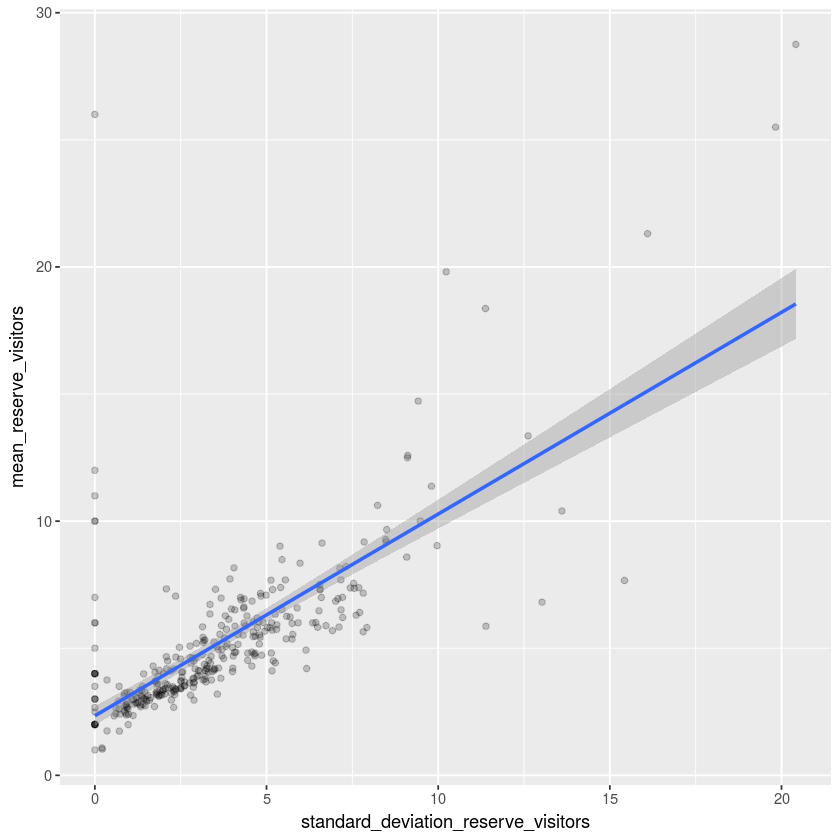

In [83]:
library('ggplot2') # visualisation
ggplot(reserve, aes(y = mean_reserve_visitors, x = standard_deviation_reserve_visitors)) +
  geom_point(alpha = 1/5) +
  geom_smooth(method = glm) 

In [37]:
## #
reserve.lm <- lm(mean_reserve_visitors ~ 1 + standard_deviation_reserve_visitors, data = reserve)
summary(reserve.lm)


Call:
lm(formula = mean_reserve_visitors ~ 1 + standard_deviation_reserve_visitors, 
    data = reserve)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.9183 -0.8730 -0.4277  0.2533 23.6580 

Coefficients:
                                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)                          2.34201    0.19588   11.96   <2e-16 ***
standard_deviation_reserve_visitors  0.79367    0.04139   19.17   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.269 on 331 degrees of freedom
Multiple R-squared:  0.5262,	Adjusted R-squared:  0.5248 
F-statistic: 367.6 on 1 and 331 DF,  p-value: < 2.2e-16


In [43]:
head(visitor)

air_store_id         visit_date visitors
1 air_ba937bf13d40fb24 2016-01-13 25      
2 air_ba937bf13d40fb24 2016-01-14 32      
3 air_ba937bf13d40fb24 2016-01-15 29      
4 air_ba937bf13d40fb24 2016-01-16 22      
5 air_ba937bf13d40fb24 2016-01-18  6      
6 air_ba937bf13d40fb24 2016-01-19  9

In [38]:
visitor.mean <- visitor %>%
  group_by(air_store_id, visit_date) %>%
  summarise(visitors_per_day = mean(visitors)) %>%
  group_by(air_store_id) %>%
  summarise(mean_visitors = mean(visitors_per_day))

reserve.visitor <- reserve %>%
  left_join(visitor.mean, by = 'air_store_id') %>%
  mutate(residuals = reserve.lm$residuals) 

## #
popular <- reserve.visitor %>%
  filter(residuals > 0) %>%
  transmute(air_store_id = air_store_id, reserve = 'po')
underground <- reserve.visitor %>%
  filter(residuals <= 0) %>%
  transmute(air_store_id = air_store_id, reserve = 'ug')

In [97]:
head(reserve.visitor)

air_store_id         mean_visit_time mean_reserve_visitors
1 air_00a91d42b08b08d9 16.63660         4.081615            
2 air_0164b9927d20bcc3 18.67364         3.438566            
3 air_034a3d5b40d5b1b1 17.30769         6.807692            
4 air_03963426c9312048 18.47057         7.307506            
5 air_04341b588bde96cd 17.50000        18.363636            
6 air_04cae7c1bc9b2a0b 18.57225         3.594477            
  standard_deviation_reserve_visitors mean_visitors residuals 
1  4.011088                           26.081897     -1.4438687
2  2.165777                            9.248322     -0.6223520
3 13.024878                           14.828685     -5.8717552
4  5.176747                           39.340326      0.8568748
5 11.377809                           35.870763      6.9914155
6  1.838500                           22.113402     -0.2066914

In [6]:
str(popular)
str(underground)

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	109 obs. of  2 variables:
 $ air_store_id: chr  "air_03963426c9312048" "air_04341b588bde96cd" "air_066f0221b8a4d533" "air_06f95ac5c33aca10" ...
 $ reserve     : chr  "po" "po" "po" "po" ...
Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	224 obs. of  2 variables:
 $ air_store_id: chr  "air_00a91d42b08b08d9" "air_0164b9927d20bcc3" "air_034a3d5b40d5b1b1" "air_04cae7c1bc9b2a0b" ...
 $ reserve     : chr  "ug" "ug" "ug" "ug" ...


In [6]:
summary(reserve.visitor$mean_visitors)
summary(reserve.visitor$mean_visit_time)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  4.941  13.950  22.011  22.903  29.475 115.471 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00   18.04   18.67   18.01   18.98   22.00 

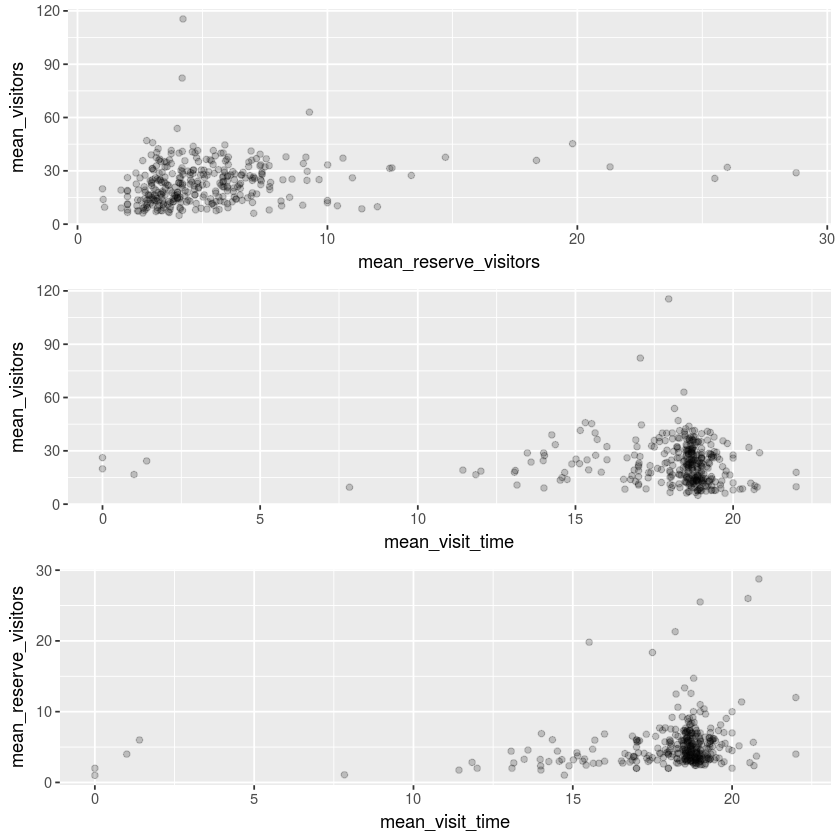

In [81]:
pm1 <- ggplot(reserve.visitor, aes(y = mean_visitors, x = mean_reserve_visitors)) +
         geom_point(alpha = 1/5) 
#  geom_smooth(method = lm) 
pm2 <- ggplot(reserve.visitor, aes(y = mean_visitors, x = mean_visit_time)) +
         geom_point(alpha = 1/5) 
#  geom_smooth(method = lm) 
pm3 <- ggplot(reserve.visitor, aes(y = mean_reserve_visitors, x = mean_visit_time)) +
         geom_point(alpha = 1/5) 
multiplot(pm1, pm2, pm3)

In [39]:
library('tidyr') # data wrangling
## #
visitor.po <- visitor %>%
  left_join(popular, by = 'air_store_id') %>%
  filter(reserve == 'po') 
rs.popular <- visitor.po %>%
  subset(select = -reserve) %>%
  spread(key = 'air_store_id', value = 'visitors')
rs.popular[is.na(rs.popular)] <- 0 
rs.po <- visitor.po %>%
  group_by(visit_date) %>%
  summarise(sum_visitors = sum(visitors)) %>%
  mutate(multiplier = 1/sum_visitors)

In [15]:
str(rs.popular[,-1])

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	478 obs. of  109 variables:
 $ air_03963426c9312048: int  NA NA NA 62 30 52 37 89 60 30 ...
 $ air_04341b588bde96cd: int  10 NA NA 23 35 33 52 47 71 32 ...
 $ air_066f0221b8a4d533: int  NA NA NA NA NA NA NA NA NA NA ...
 $ air_06f95ac5c33aca10: int  NA NA NA NA 7 10 21 26 3 4 ...
 $ air_084d98859256acf0: int  NA NA NA NA NA NA NA NA NA NA ...
 $ air_10bbe8acd943d8f6: int  NA NA NA NA NA NA NA NA NA NA ...
 $ air_138ff410757b845f: int  NA NA NA NA NA NA NA NA NA NA ...
 $ air_1408dd53f31a8a65: int  NA NA NA NA NA NA NA NA NA NA ...
 $ air_1707a3f18bb0da07: int  NA NA NA NA NA NA NA NA NA NA ...
 $ air_1ba4e87ef7422183: int  NA NA NA NA NA NA NA NA NA NA ...
 $ air_1eeff462acb24fb7: int  NA NA NA NA NA NA NA NA NA NA ...
 $ air_20add8092c9bb51d: int  NA NA NA NA NA NA NA NA NA NA ...
 $ air_24b9b2a020826ede: int  NA NA NA 11 5 5 13 25 43 18 ...
 $ air_258ad2619d7bff9a: int  NA NA NA NA NA NA NA NA NA NA ...
 $ air_28064154614b2e6c: int  NA NA NA 

In [24]:
str(rs.po[185:478,]) 

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	294 obs. of  2 variables:
 $ visit_date  : chr  "2016-07-03" "2016-07-04" "2016-07-05" "2016-07-06" ...
 $ sum_visitors: int  1566 1523 1837 2191 2069 3005 2704 1458 1476 2057 ...


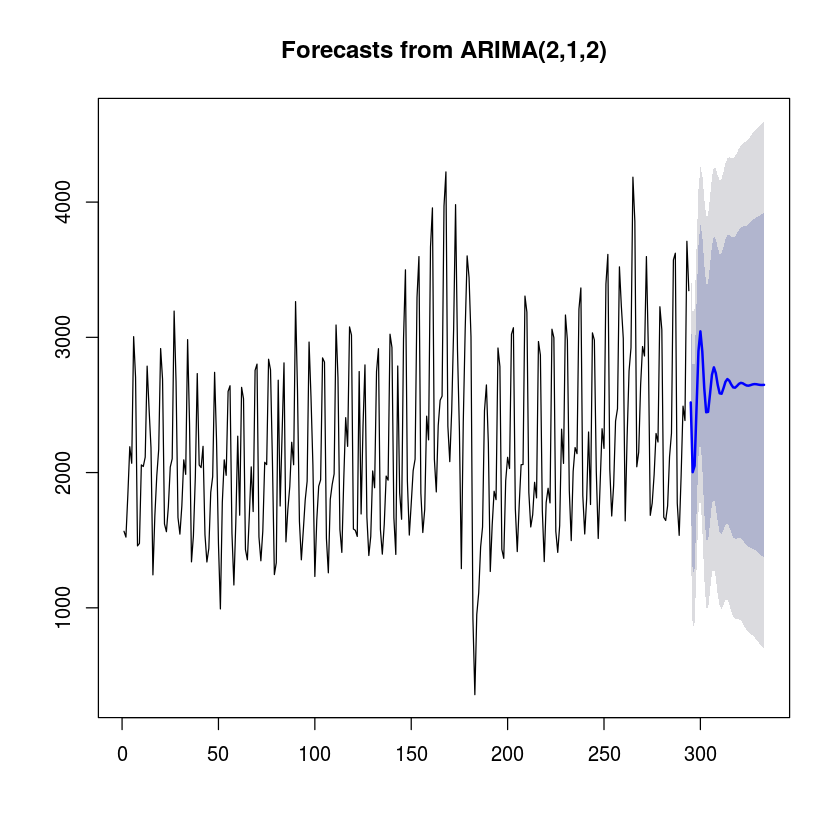

In [53]:
library(forecast)
## #
               #ts.po <- ts(rs.po[185:478,]$sum_visitors)
    #fitpo <- auto.arima(ts(rs.po[185:478,]$sum_visitors))
plot(forecast(auto.arima(ts(rs.po[185:478,]$sum_visitors)), h = 39))

In [43]:
share.po <- matrix(rs.po[185:478,]$multiplier, nrow = 294, ncol = 109) * rs.popular[,-1][185:478,]
write.csv(share.po, file = "share_popular.csv", row.names = FALSE) 

In [80]:
library(forecast)
## #
#popularshare <- as.tibble(fread('prediction_popular'))
predict.popular <- matrix(forecast(auto.arima(ts(rs.po[185:478,]$sum_visitors)), h = 39)$mean, 
                          nrow = 39, ncol = 109) * as.tibble(fread('prediction_popular.csv'))

row.names(predict.popular) <- date.info[479:517,]$calendar_date
colnames(predict.popular) <- popular$air_store_id

subpop <- melt(t(predict.popular), value.name = 'visitors')

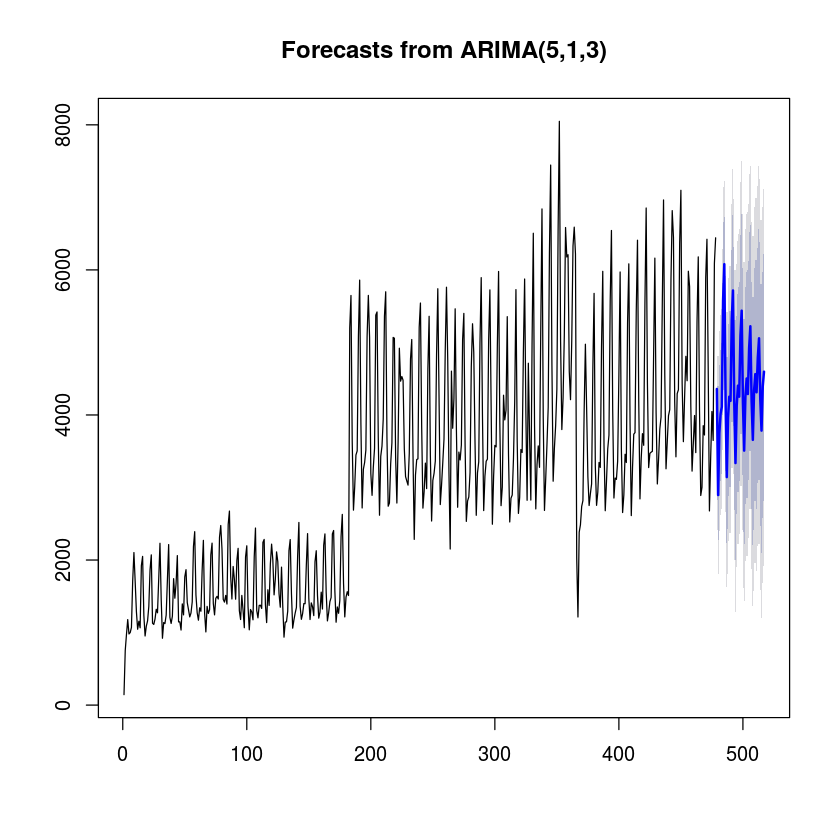

In [41]:
library('tidyr') # data wrangling
## #
visitor.ug <- visitor %>%
  left_join(underground, by = 'air_store_id') %>%
  filter(reserve == 'ug') 
rs.underground <- visitor.ug %>%
  subset(select = -reserve) %>%
  spread(key = 'air_store_id', value = 'visitors')
rs.underground[is.na(rs.underground)] <- 0 
rs.ug <- visitor.ug %>%
  group_by(visit_date) %>%
  summarise(sum_visitors = sum(visitors)) %>%
  mutate(multiplier = 1/sum_visitors)

plot(forecast(auto.arima(ts(rs.ug$sum_visitors)), h = 39))

In [59]:
share.ug <- matrix(rs.ug[185:478,]$multiplier, nrow = 294, ncol = 224) * rs.underground[,-1][185:478,]
write.csv(share.ug, file = "share_underground.csv", row.names = FALSE) 

In [60]:
str(share.ug)

'data.frame':	294 obs. of  224 variables:
 $ air_00a91d42b08b08d9: num  0 0.00744 0.00831 0.00841 0.0097 ...
 $ air_0164b9927d20bcc3: num  0 0 0 0 0 0 0 0 0 0 ...
 $ air_034a3d5b40d5b1b1: num  0.001375 0.004836 0 0.0029 0.000856 ...
 $ air_04cae7c1bc9b2a0b: num  0.00468 0.00223 0.00399 0.00725 0.00171 ...
 $ air_082908692355165e: num  0 0.01414 0.00964 0.01885 0.01341 ...
 $ air_0867f7bebad6a649: num  0 0 0 0 0 0 0 0 0 0 ...
 $ air_08cb3c4ee6cd6a22: num  0.00275 0.002604 0.000665 0.00406 0.002283 ...
 $ air_08ef81d5b7a0d13f: num  0.000275 0.004092 0.003988 0.0029 0.00371 ...
 $ air_09661c0f3259cc04: num  0.0011 0.00967 0.01263 0.00667 0.01056 ...
 $ air_0a74a5408a0b8642: num  0 0.01451 0.00897 0.00058 0.0097 ...
 $ air_0b184ec04c741a6a: num  0 0.00186 0.00665 0.00261 0.002 ...
 $ air_0b1e72d2d4422b20: num  0.00715 0 0.00665 0.00406 0.00685 ...
 $ air_0e1eae99b8723bc1: num  0.0066 0.00484 0.00332 0.00435 0.00228 ...
 $ air_0f0cdeee6c9bf3d7: num  0.0055 0.00595 0.00499 0.00464 0.00485 ..

In [81]:
## #
predict.underground <- matrix(forecast(auto.arima(ts(rs.ug[185:478,]$sum_visitors)), h = 39)$mean, 
                          nrow = 39, ncol = 224) * as.tibble(fread('prediction_underground.csv'))

row.names(predict.underground) <- date.info[479:517,]$calendar_date
colnames(predict.underground) <- underground$air_store_id

subugd <- melt(t(predict.underground), value.name = 'visitors')

In [97]:
str(visitor)

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	252108 obs. of  3 variables:
 $ air_store_id: chr  "air_ba937bf13d40fb24" "air_ba937bf13d40fb24" "air_ba937bf13d40fb24" "air_ba937bf13d40fb24" ...
 $ visit_date  : chr  "2016-01-13" "2016-01-14" "2016-01-15" "2016-01-16" ...
 $ visitors    : int  25 32 29 22 6 9 31 21 18 26 ...
 - attr(*, ".internal.selfref")=<externalptr> 


In [111]:
#str(visitor.r)

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	149074 obs. of  3 variables:
 $ air_store_id: chr  "air_ba937bf13d40fb24" "air_ba937bf13d40fb24" "air_ba937bf13d40fb24" "air_ba937bf13d40fb24" ...
 $ visit_date  : chr  "2016-01-13" "2016-01-14" "2016-01-15" "2016-01-16" ...
 $ visitors    : int  25 32 29 22 6 9 31 21 18 26 ...


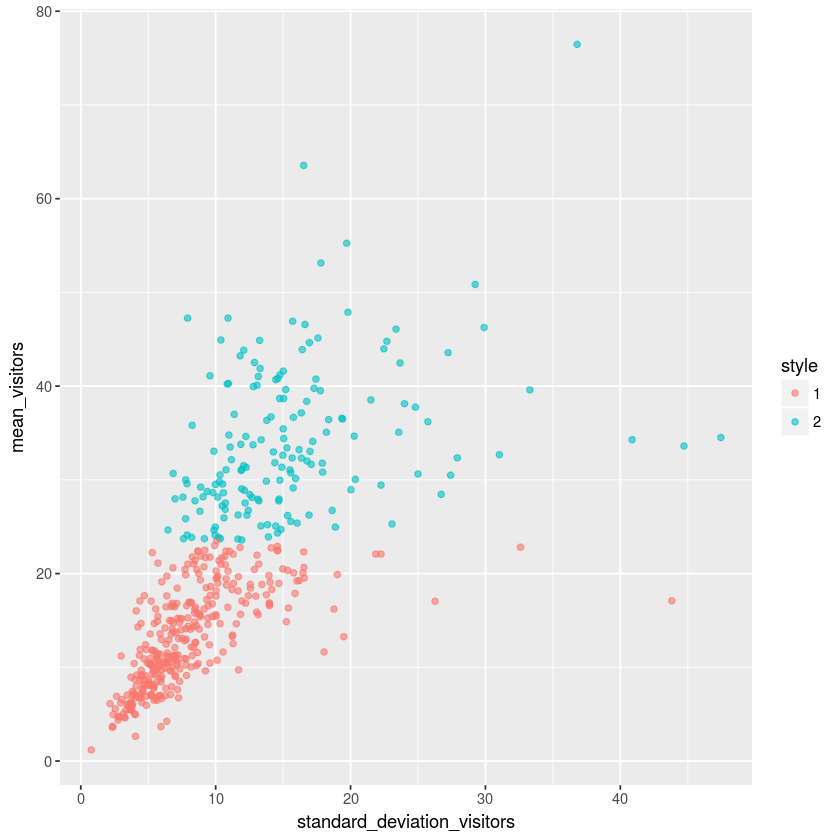

In [47]:
library('ggplot2') # visualisation
visitor.pg <- subset(visitor, !air_store_id %in% c(popular$air_store_id, underground$air_store_id)) %>%
  group_by(air_store_id) %>%
  summarise(mean_visitors = mean(visitors), 
            standard_deviation_visitors = sd(visitors)) 
visitor.rd <- visitor.pg %>%
  mutate(style = kmeans(visitor.pg$mean_visitors, 2, nstart = 7)$cluster) %>%
  mutate(style = as.factor(style))
## #
ggplot(visitor.rd, aes(y = mean_visitors, x = standard_deviation_visitors, colour = style)) +
  geom_point(alpha = 3/5) 
#  geom_smooth(method = glm) 

In [41]:
kmeans(visitor.rd$mean_visitors, 2, nstart = 7)$size

[1] 332 164

In [22]:
#str(visitor.ur[,-1])

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	478 obs. of  496 variables:
 $ air_0241aa3964b7f861: int  NA NA 10 9 17 10 NA 5 8 16 ...
 $ air_0328696196e46f18: int  NA NA NA NA NA NA NA NA NA NA ...
 $ air_036d4f1ee7285390: int  NA NA NA NA NA NA NA NA NA NA ...
 $ air_0382c794b73b51ad: int  NA NA NA NA NA NA NA NA 3 1 ...
 $ air_049f6d5b402a31b2: int  NA NA NA NA NA NA NA NA NA NA ...
 $ air_0585011fa179bcce: int  NA NA NA NA NA NA NA NA NA NA ...
 $ air_05c325d315cc17f5: int  29 21 24 18 15 19 17 16 32 6 ...
 $ air_0647f17b4dc041c8: int  NA NA NA NA NA NA NA NA NA NA ...
 $ air_064e203265ee5753: int  NA NA NA NA NA NA NA NA NA NA ...
 $ air_0728814bd98f7367: int  NA NA NA NA NA 7 12 5 20 20 ...
 $ air_0768ab3910f7967f: int  NA NA NA NA 25 13 NA NA 24 4 ...
 $ air_07b314d83059c4d2: int  NA NA NA NA NA NA NA NA NA NA ...
 $ air_07bb665f9cdfbdfb: int  NA NA NA 2 36 23 40 39 NA 8 ...
 $ air_083ddc520ea47e1e: int  NA NA NA NA NA NA NA NA NA NA ...
 $ air_0845d8395f30c6bb: int  NA NA NA NA NA 

In [42]:
head(visitor.rd)

air_store_id         mean_visitors standard_deviation_visitors style
1 air_0241aa3964b7f861  9.896465      6.214877                   1    
2 air_0328696196e46f18  7.939655      6.733807                   1    
3 air_036d4f1ee7285390 22.455516     14.590566                   1    
4 air_0382c794b73b51ad 23.687919     11.642251                   2    
5 air_049f6d5b402a31b2 11.531008      6.431395                   1    
6 air_0585011fa179bcce  4.776557      2.752920                   1

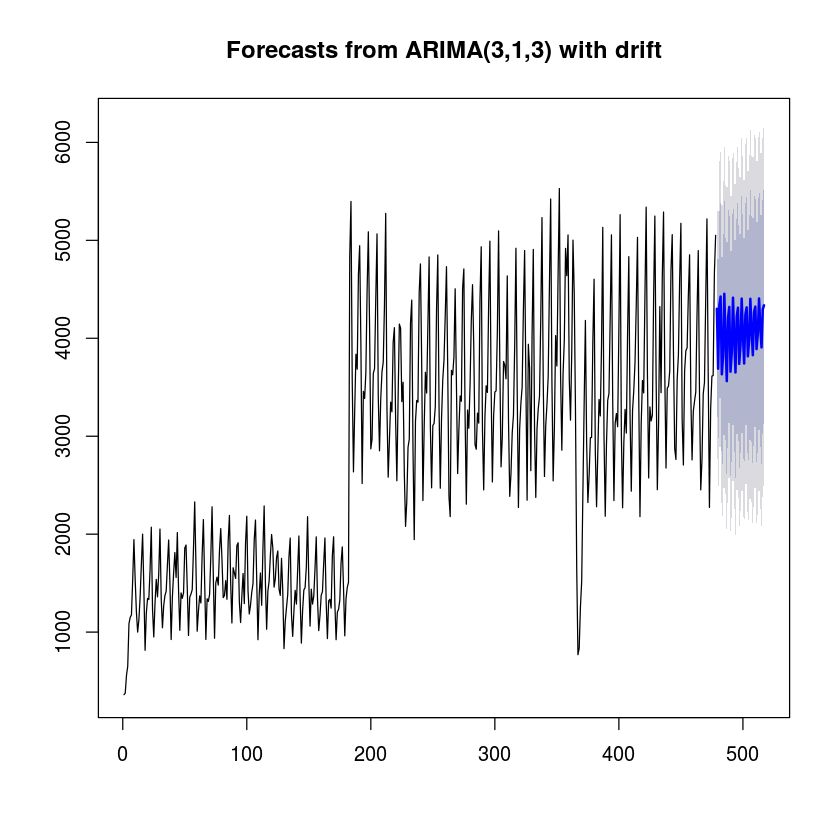

In [48]:
## #
steady <- subset(visitor, !air_store_id %in% c(popular$air_store_id, underground$air_store_id)) %>%
  left_join(visitor.rd[,-2:-3], by = 'air_store_id') %>%
  filter(style == 1) %>%
  mutate(air_store_id = as.factor(air_store_id))
maturity <- spread(subset(steady, select = -style), key = 'air_store_id', value = 'visitors') 
maturity[is.na(maturity)] <- 0 

ur.natural <- subset(steady, select = -style) %>%
  group_by(visit_date) %>%
  summarise(sum_visitors = sum(visitors)) %>%
  mutate(multiplier = 1/sum_visitors)

plot(forecast(auto.arima(ts(ur.natural$sum_visitors)), h = 39))

share.matu <- matrix(ur.natural[185:478,]$multiplier, nrow = 294, ncol = 332) * maturity[,-1][185:478,]
write.csv(share.matu, file = "share_maturity.csv", row.names = FALSE) 

In [82]:
## #
predict.maturity <- matrix(forecast(auto.arima(ts(ur.natural[185:478,]$sum_visitors)), h = 39)$mean, 
                           nrow = 39, ncol = 332) * as.tibble(fread('prediction_maturity.csv'))

row.names(predict.maturity) <- date.info[479:517,]$calendar_date
colnames(predict.maturity) <- levels(steady$air_store_id)

submtr <- melt(t(predict.maturity), value.name = 'visitors')

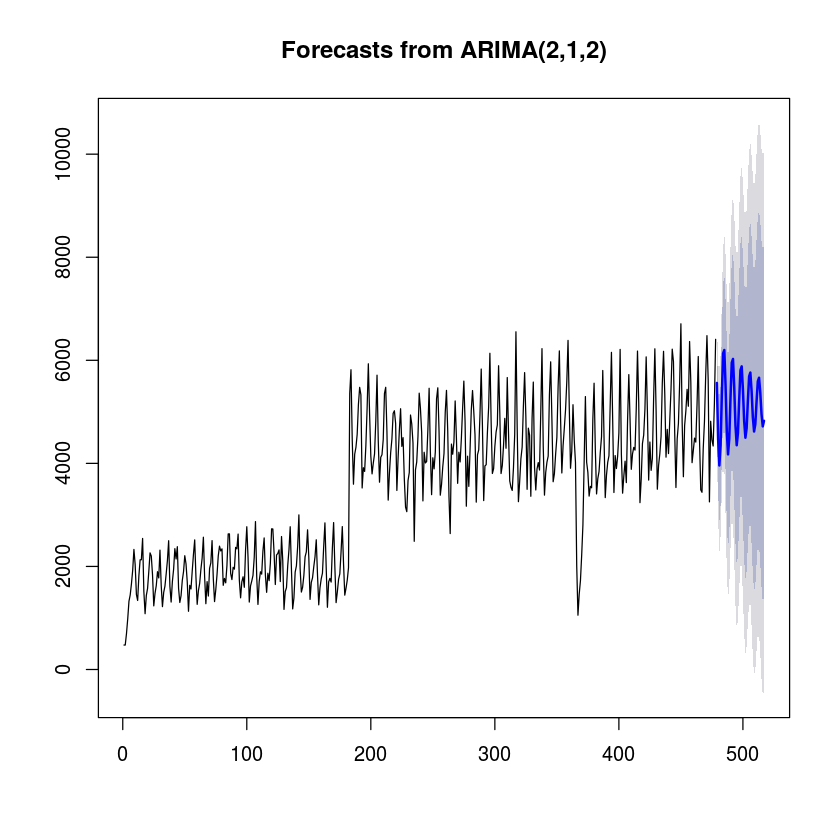

In [50]:
## #
exponential <- subset(visitor, !air_store_id %in% c(popular$air_store_id, underground$air_store_id)) %>%
  left_join(visitor.rd[,-2:-3], by = 'air_store_id') %>%
  filter(style == 2) %>%
  mutate(air_store_id = as.factor(air_store_id))
 
expand <- spread(subset(exponential, select = -style), key = 'air_store_id', value = 'visitors') 
expand[is.na(expand)] <- 0 

ur.growth <- subset(exponential, select = -style) %>%
  group_by(visit_date) %>%
  summarise(sum_visitors = sum(visitors)) %>%
  mutate(multiplier = 1/sum_visitors)

plot(forecast(auto.arima(ts(ur.growth$sum_visitors)), h = 39))

share.expand <- matrix(ur.growth[185:478,]$multiplier, nrow = 294, ncol = 164) * expand[,-1][185:478,]
write.csv(share.expand, file = "share_expand.csv", row.names = FALSE) 

In [83]:
## #
predict.expand <- matrix(forecast(auto.arima(ts(ur.growth[185:478,]$sum_visitors)), h = 39)$mean, 
                         nrow = 39, ncol = 164) * as.tibble(fread('prediction_expand.csv'))

row.names(predict.expand) <- date.info[479:517,]$calendar_date
colnames(predict.expand) <- levels(exponential$air_store_id)

subepd <- melt(t(predict.expand), value.name = 'visitors')

In [84]:
## #
purd <- subpop %>%
  bind_rows(subugd, submtr, subepd) %>%
  unite(id, Var1, Var2, sep = '_') 
character <- visitor.test[,-2] %>%  
  left_join(purd, by = 'id') %>%
  mutate(visitors = ceiling(visitors))
write.csv(character, file = "character_submission_ceiling.csv", row.names = FALSE) 

Warning message in bind_rows_(x, .id):
“Unequal factor levels: coercing to character”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”

In [103]:
str(character)

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	32019 obs. of  2 variables:
 $ id      : chr  "air_00a91d42b08b08d9_2017-04-23" "air_00a91d42b08b08d9_2017-04-24" "air_00a91d42b08b08d9_2017-04-25" "air_00a91d42b08b08d9_2017-04-26" ...
 $ visitors: num  6.96 21.25 27.83 35.73 30.18 ...


In [105]:
str(visitor.test)

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	32019 obs. of  2 variables:
 $ id      : chr  "air_00a91d42b08b08d9_2017-04-23" "air_00a91d42b08b08d9_2017-04-24" "air_00a91d42b08b08d9_2017-04-25" "air_00a91d42b08b08d9_2017-04-26" ...
 $ visitors: int  0 0 0 0 0 0 0 0 0 0 ...
 - attr(*, ".internal.selfref")=<externalptr> 


In [106]:
summary(character$visitors)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   8.712  16.380  19.023  27.080 111.837 

In [107]:
character.ceiling <- character %>%
  mutate(visitors = ceiling(visitors))
write.csv(character.ceiling, file = "character_ceiling.csv", row.names = FALSE) 

In [108]:
character.floor <- character %>%
  mutate(visitors = floor(visitors))
write.csv(character.floor, file = "character_floor.csv", row.names = FALSE) 

In [109]:
c837 <- as.tibble(fread('recruit_submission_ceiling.csv'))
c822 <- as.tibble(fread('character_ceiling.csv'))
c750 <- as.tibble(fread('recruit_submission_ceiling_a-em.csv'))

character.ensemble <- character %>%
  mutate(visitors = ceiling(c837$visitors * 0.3 + c822$visitors * 0.4 + c750$visitors * 0.3))
write.csv(character.ensemble, file = "character_ensemble.csv", row.names = FALSE) 

In [112]:
c586 <- as.tibble(fread('character_ensemble586.csv'))
c590 <- as.tibble(fread('recruit_submission_en590.csv'))

ch.ensemble <- character %>%
  mutate(visitors = ceiling(c586$visitors * 0.5 + c590$visitors * 0.5))
write.csv(ch.ensemble, file = "ch_ensemble.csv", row.names = FALSE) 

In [86]:
c1 <- as.tibble(fread('character_submission_ceiling821.csv'))
c2 <- as.tibble(fread('character_ceiling822.csv'))
c0 <- as.tibble(fread('character_submission_ceiling817.csv'))

character.ensemble <- character %>%
  mutate(visitors = ceiling(c1$visitors * 0.3 + c0$visitors * 0.4 + c2$visitors * 0.3))
write.csv(character.ensemble, file = "char_en.csv", row.names = FALSE) 

In [258]:
c738 <- as.tibble(fread('char_en738.csv'))
c761 <- as.tibble(fread('recruit_submission_round.csv'))
c750 <- as.tibble(fread('recruit_submission_ceiling_a-em.csv')) 

character.ensemble <- visitor.test[,-2] %>%
  mutate(visitors = ceiling(c738$visitors * 0.5 + c761$visitors * 0.3 + c750$visitors * 0.2))
write.csv(character.ensemble, file = "chrr_en.csv", row.names = FALSE) 

In [262]:
c607 <- as.tibble(fread('chrr_en607.csv'))
ru1 <- as.tibble(fread('recruit_submission_ceiling_630.csv'))
ru2 <- as.tibble(fread('recruit_submission_ceiling_633.csv'))
ru3 <- as.tibble(fread('recruit_submission_ceiling_gr5gr25de.csv')) #636

character.ensemble <- visitor.test[,-2] %>%
  mutate(visitors = floor(c607$visitors * 0.25 + ru1$visitors * 0.25 + ru2$visitors *0.25 + ru3$visitors * 0.25))
write.csv(character.ensemble, file = "crrr_en.csv", row.names = FALSE) 

In [263]:
e1 <- as.tibble(fread('recruit_submission_en591.csv'))
e2 <- as.tibble(fread('ch_ensemble571.csv'))
e0 <- as.tibble(fread('crrr_en578.csv'))

e3.ensemble <- visitor.test[,-2] %>%
  mutate(visitors = ceiling(e1$visitors * 0.4 + e2$visitors * 0.3 + e0$visitors * 0.3))
write.csv(e3.ensemble, file = "e3_en.csv", row.names = FALSE) 

In [72]:
head(store.air)

air_store_id         air_genre_name air_area_name                latitude
1 air_0f0cdeee6c9bf3d7 Italian/French Hyōgo-ken Kōbe-shi Kumoidōri 34.69512
2 air_7cc17a324ae5c7dc Italian/French Hyōgo-ken Kōbe-shi Kumoidōri 34.69512
3 air_fee8dcf4d619598e Italian/French Hyōgo-ken Kōbe-shi Kumoidōri 34.69512
4 air_a17f0778617c76e2 Italian/French Hyōgo-ken Kōbe-shi Kumoidōri 34.69512
5 air_83db5aff8f50478e Italian/French Tōkyō-to Minato-ku Shibakōen 35.65807
6 air_99c3eae84130c1cb Italian/French Tōkyō-to Minato-ku Shibakōen 35.65807
  longitude
1 135.1979 
2 135.1979 
3 135.1979 
4 135.1979 
5 139.7516 
6 139.7516

In [4]:
library('dplyr')

reserve.solar <- bind_rows(reserve.air, left_join(store.cross, reserve.hpg, by = 'hpg_store_id')) %>%
  mutate(visit_date = substr(visit_datetime, 0, 10),
         visit_time = as.numeric(substr(visit_datetime, 11, 13))) %>%
  left_join(date.info, by = c("visit_date" = "calendar_date")) %>%
  filter(holiday_flg == 0, visit_date %in% date.info[185:478,]$calendar_date) %>%
  group_by(air_store_id, visit_date) %>%
  mutate(visit_time_per_order = mean(visit_time), 
         reserve_visitors_per_order = mean(reserve_visitors)) %>%
  group_by(air_store_id, day_of_week) %>%
  summarise(wkd_visit_time = mean(visit_time_per_order), 
            wkd_reserve_visitors = mean(reserve_visitors_per_order), 
            wkd_sd_reserve_visitors = sd(reserve_visitors_per_order))


In [10]:
head(reserve.solar[,-5])

air_store_id         day_of_week wkd_visit_time wkd_reserve_visitors
1 air_00a91d42b08b08d9 Friday      17.42308       3.115385            
2 air_00a91d42b08b08d9 Monday      17.33333       5.833333            
3 air_00a91d42b08b08d9 Saturday    17.70588       4.352941            
4 air_00a91d42b08b08d9 Thursday    15.40000       4.466667            
5 air_00a91d42b08b08d9 Tuesday     15.60000       3.133333            
6 air_00a91d42b08b08d9 Wednesday   17.27778       7.166667

In [229]:
head(subset(reserve.solar, reserve.solar$day_of_week == 'Sunday')[,-2])

summary(subset(reserve.solar, reserve.solar$day_of_week == 'Sunday')[,-2]$wkd_visit_time)
summary(subset(reserve.solar, reserve.solar$day_of_week == 'Sunday')[,-2]$wkd_reserve_visitors)

air_store_id         wkd_visit_time wkd_reserve_visitors
1 air_034a3d5b40d5b1b1 17.50000       15.500000           
2 air_03963426c9312048 20.00000        3.285714           
3 air_04341b588bde96cd 22.00000        6.000000           
4 air_04cae7c1bc9b2a0b 18.40816        3.275510           
5 air_066f0221b8a4d533 19.00000        4.000000           
6 air_082908692355165e 18.33333        3.666667           
  wkd_sd_reserve_visitors
1 23.0108670             
2  0.0000000             
3         NA             
4  1.3465005             
5         NA             
6  0.5773503

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  3.159  16.596  18.256  17.422  18.847  22.000 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.803   3.701   4.972   5.535  40.000 

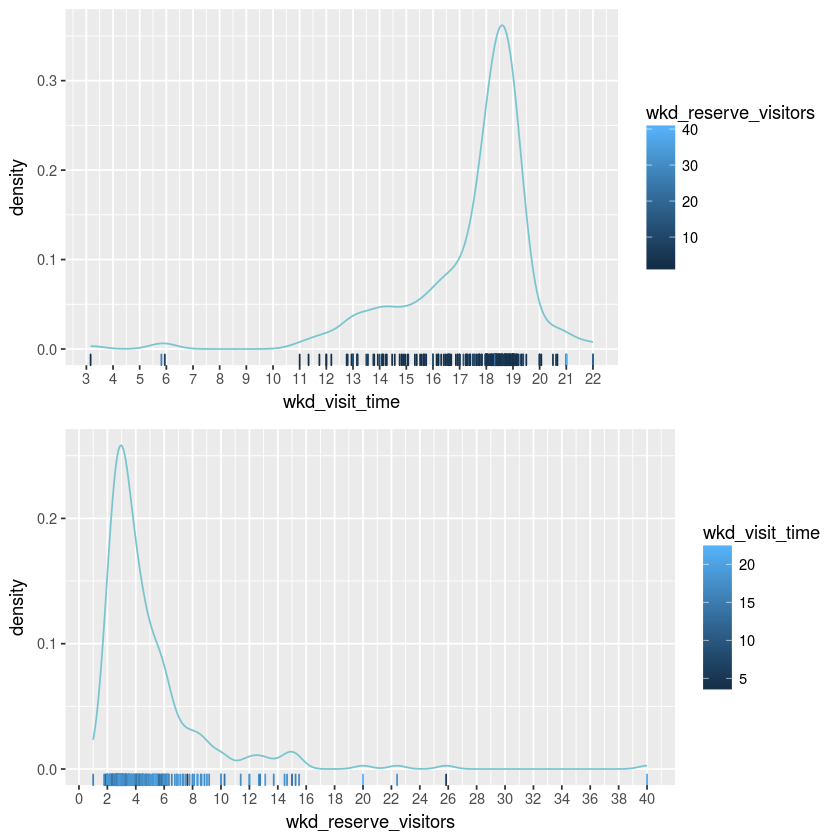

In [48]:
density.vt <- ggplot(subset(reserve.solar, reserve.solar$day_of_week == 'Sunday')[,-2], aes(x = wkd_visit_time)) + 
  scale_x_continuous(breaks = seq(0, 25, 1)) +
  geom_line(colour = "cadetblue3", stat = "density") +
  geom_rug(aes(colour = wkd_reserve_visitors), sides = "b") 

density.rv <- ggplot(subset(reserve.solar, reserve.solar$day_of_week == 'Sunday')[,-2], 
                     aes(x = wkd_reserve_visitors)) + 
  scale_x_continuous(breaks = seq(0, 40, 2)) +
  geom_line(colour = "cadetblue3", stat = "density") +
  geom_rug(aes(colour = wkd_visit_time), sides = "b") 

multiplot(density.vt, density.rv)

In [8]:
library('tidyr')

store.area <- store.air %>%
  group_by(air_area_name) %>%
  summarise(stores = n())

store.center <- store.air %>%
  separate(air_area_name, into = c("area_ken", "area_shi", "area_local"), sep = " ", remove = FALSE) %>%
  group_by(area_ken) %>%
  summarise(mean_la = mean(latitude), 
            mean_lg = mean(longitude))

store <- store.air %>%
  separate(air_area_name, into = c("area_ken", "area_shi", "area_local"), sep = " ", remove = FALSE) %>%
  left_join(store.center, by = 'area_ken') %>%
  mutate(air_genre_name = as.factor(air_genre_name), 
         area_ken = as.factor(area_ken), 
         area_shi = as.factor(area_shi), 
         area_local = as.factor(area_local), 
         dist_vertical = abs(latitude - mean_la), 
         dist_horizon = abs(longitude - mean_lg),
         center = dist_vertical + dist_horizon, 
         tier = dist_vertical * dist_horizon) %>% 
#         latitude = as.factor(latitude), 
#         longitude = as.factor(longitude)) %>%
  left_join(store.area, by = 'air_area_name') 
## #
store.sun <- store %>%
  left_join(subset(reserve.solar, reserve.solar$day_of_week == 'Sunday')[,-2], by = 'air_store_id')

Warning message:
“Too many values at 87 locations: 65, 66, 69, 70, 83, 84, 124, 125, 126, 205, 206, 216, 217, 227, 228, 229, 230, 231, 273, 274, ...”Warning message:
“Too many values at 87 locations: 65, 66, 69, 70, 83, 84, 124, 125, 126, 205, 206, 216, 217, 227, 228, 229, 230, 231, 273, 274, ...”

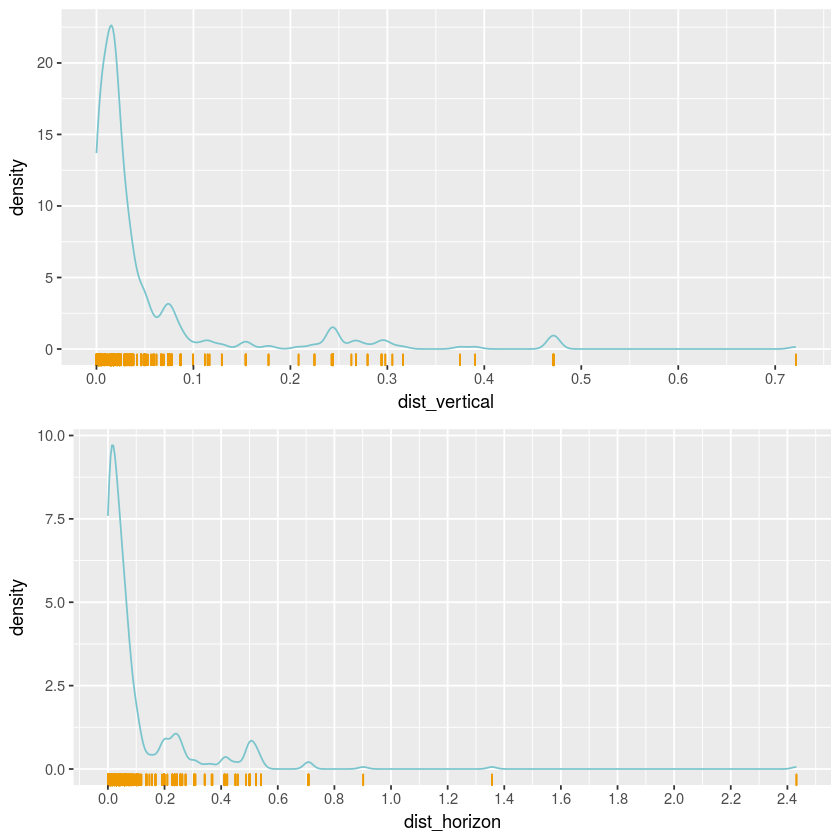

In [205]:
distance.la <- ggplot(store, aes(x = dist_vertical)) + 
  scale_x_continuous(breaks = seq(0, 0.8, 0.1)) +
  geom_line(colour = "cadetblue3", stat = "density") +
  geom_rug(colour = "orange2") 

distance.lg <- ggplot(store, aes(x = dist_horizon)) + 
  scale_x_continuous(breaks = seq(0, 2.5, 0.2)) +
  geom_line(colour = "cadetblue3", stat = "density") +
  geom_rug(colour = "orange2") 

multiplot(distance.la, distance.lg)

In [8]:
levels(sun.data$air_genre_name)
store.area$air_area_name
levels(store$area_ken)
levels(store$area_shi)

[1] "Asian"                        "Bar/Cocktail"                
 [3] "Cafe/Sweets"                  "Creative cuisine"            
 [5] "Dining bar"                   "International cuisine"       
 [7] "Italian/French"               "Izakaya"                     
 [9] "Japanese food"                "Karaoke/Party"               
[11] "Okonomiyaki/Monja/Teppanyaki" "Other"                       
[13] "Western food"                 "Yakiniku/Korean food"

[1] "Fukuoka-ken Fukuoka-shi Daimyō"               
  [2] "Fukuoka-ken Fukuoka-shi Hakata Ekimae"        
  [3] "Fukuoka-ken Fukuoka-shi Imaizumi"             
  [4] "Fukuoka-ken Fukuoka-shi Momochi"              
  [5] "Fukuoka-ken Fukuoka-shi Shiobaru"             
  [6] "Fukuoka-ken Fukuoka-shi Takatori"             
  [7] "Fukuoka-ken Fukuoka-shi Tenjin"               
  [8] "Fukuoka-ken Fukuoka-shi Torikai"              
  [9] "Fukuoka-ken Itoshima-shi Maebarunishi"        
 [10] "Fukuoka-ken Kitakyūshū-shi Konyamachi"        
 [11] "Fukuoka-ken Kitakyūshū-shi None"              
 [12] "Fukuoka-ken Kitakyūshū-shi Ōtemachi"          
 [13] "Fukuoka-ken Kurume-shi Jōnanmachi"            
 [14] "Fukuoka-ken Yame-shi Motomachi"               
 [15] "Hiroshima-ken Fukuyama-shi Higashisakuramachi"
 [16] "Hiroshima-ken Hiroshima-shi Kokutaijimachi"   
 [17] "Hiroshima-ken Hiroshima-shi Nagarekawachō"    
 [18] "Hokkaidō Abashiri-shi Minami 6 Jōhigashi"     
 [19] "Hokkaidō Asahikawa-shi 6 Jōdōri"              
 [20] "Hokkaidō Katō-gun Motomachi"                  
 [21] "Hokkaidō Sapporo-shi Atsubetsuchūō 1 Jō"      
 [22] "Hokkaidō Sapporo-shi Kita 24 Jōnishi"         
 [23] "Hokkaidō Sapporo-shi Kotoni 2 Jō"             
 [24] "Hokkaidō Sapporo-shi Minami 3 Jōnishi"        
 [25] "Hyōgo-ken Amagasaki-shi Higashinanamatsuchō"  
 [26] "Hyōgo-ken Himeji-shi Yasuda"                  
 [27] "Hyōgo-ken Kakogawa-shi Kakogawachō Kitazaike" 
 [28] "Hyōgo-ken Kōbe-shi Kumoidōri"                 
 [29] "Hyōgo-ken Kōbe-shi Motomachidōri"             
 [30] "Hyōgo-ken Kōbe-shi Sumiyoshi Higashimachi"    
 [31] "Hyōgo-ken Nishinomiya-shi Rokutanjichō"       
 [32] "Hyōgo-ken Takarazuka-shi Tōyōchō"             
 [33] "Miyagi-ken Sendai-shi Kamisugi"               
 [34] "Niigata-ken Kashiwazaki-shi Chūōchō"          
 [35] "Niigata-ken Nagaoka-shi Ōtedōri"              
 [36] "Niigata-ken Niigata-shi Gakkōchōdōri 1 Banchō"
 [37] "Niigata-ken Niigata-shi Teraohigashi"         
 [38] "Ōsaka-fu Higashiōsaka-shi Aramotokita"        
 [39] "Ōsaka-fu Neyagawa-shi Honmachi"               
 [40] "Ōsaka-fu Ōsaka-shi Fuminosato"                
 [41] "Ōsaka-fu Ōsaka-shi Kyōmachibori"              
 [42] "Ōsaka-fu Ōsaka-shi Kyūtarōmachi"              
 [43] "Ōsaka-fu Ōsaka-shi Nakanochō"                 
 [44] "Ōsaka-fu Ōsaka-shi Nanbasennichimae"          
 [45] "Ōsaka-fu Ōsaka-shi Ōgimachi"                  
 [46] "Ōsaka-fu Ōsaka-shi Ōhiraki"                   
 [47] "Ōsaka-fu Ōsaka-shi Shinmachi"                 
 [48] "Ōsaka-fu Sakai-shi Minamikawaramachi"         
 [49] "Ōsaka-fu Suita-shi Izumichō"                  
 [50] "Shizuoka-ken Hamamatsu-shi Motoshirochō"      
 [51] "Shizuoka-ken Numazu-shi Miyukichō"            
 [52] "Shizuoka-ken Shizuoka-shi Ōtemachi"           
 [53] "Tōkyō-to Adachi-ku Chūōhonchō"                
 [54] "Tōkyō-to Bunkyō-ku Kasuga"                    
 [55] "Tōkyō-to Bunkyō-ku Sendagi"                   
 [56] "Tōkyō-to Chiyoda-ku Kanda Jinbōchō"           
 [57] "Tōkyō-to Chiyoda-ku Kudanminami"              
 [58] "Tōkyō-to Chūō-ku Ginza"                       
 [59] "Tōkyō-to Chūō-ku Tsukiji"                     
 [60] "Tōkyō-to Edogawa-ku Chūō"                     
 [61] "Tōkyō-to Fuchū-shi Miyanishichō"              
 [62] "Tōkyō-to Itabashi-ku Itabashi"                
 [63] "Tōkyō-to Katsushika-ku Tateishi"              
 [64] "Tōkyō-to Kita-ku Ōjihonchō"                   
 [65] "Tōkyō-to Koganei-shi Honchō"                  
 [66] "Tōkyō-to Kōtō-ku Kameido"                     
 [67] "Tōkyō-to Kōtō-ku Tomioka"                     
 [68] "Tōkyō-to Kōtō-ku Tōyō"                        
 [69] "Tōkyō-to Machida-shi Morino"                  
 [70] "Tōkyō-to Meguro-ku Jiyūgaoka"                 
 [71] "Tōkyō-to Meguro-ku Kamimeguro"                
 [72] "Tōkyō-to Meguro-ku Takaban"                   
 [73] "Tōkyō-to Minato-ku Akasaka"                   
 [74] "Tōkyō-to Minato-ku Roppongi"                  
 [75] 

[1] "Fukuoka-ken"   "Hiroshima-ken" "Hokkaidō"      "Hyōgo-ken"    
[5] "Miyagi-ken"    "Niigata-ken"   "Ōsaka-fu"      "Shizuoka-ken" 
[9] "Tōkyō-to"

[1] "Abashiri-shi"     "Adachi-ku"        "Amagasaki-shi"    "Asahikawa-shi"   
 [5] "Bunkyō-ku"        "Chiyoda-ku"       "Chūō-ku"          "Edogawa-ku"      
 [9] "Fuchū-shi"        "Fukuoka-shi"      "Fukuyama-shi"     "Hamamatsu-shi"   
[13] "Higashiōsaka-shi" "Himeji-shi"       "Hiroshima-shi"    "Itabashi-ku"     
[17] "Itoshima-shi"     "Kakogawa-shi"     "Kashiwazaki-shi"  "Katō-gun"        
[21] "Katsushika-ku"    "Kita-ku"          "Kitakyūshū-shi"   "Kōbe-shi"        
[25] "Koganei-shi"      "Kōtō-ku"          "Kurume-shi"       "Machida-shi"     
[29] "Meguro-ku"        "Minato-ku"        "Musashino-shi"    "Nagaoka-shi"     
[33] "Nakano-ku"        "Nerima-ku"        "Neyagawa-shi"     "Niigata-shi"     
[37] "Nishinomiya-shi"  "Numazu-shi"       "Ōsaka-shi"        "Ōta-ku"          
[41] "Sakai-shi"        "Sapporo-shi"      "Sendai-shi"       "Setagaya-ku"     
[45] "Shibuya-ku"       "Shinagawa-ku"     "Shinjuku-ku"      "Shizuoka-shi"    
[49] "Suginami-ku"      "Suita-shi"        "Tachikawa-shi"    "Taitō-ku"        
[53] "Takarazuka-shi"   "Toshima-ku"       "Yame-shi"

In [254]:
sun.data$air_store_id

[1] "air_00a91d42b08b08d9" "air_0241aa3964b7f861" "air_0328696196e46f18"
  [4] "air_034a3d5b40d5b1b1" "air_036d4f1ee7285390" "air_0382c794b73b51ad"
  [7] "air_03963426c9312048" "air_04341b588bde96cd" "air_049f6d5b402a31b2"
 [10] "air_04cae7c1bc9b2a0b" "air_0585011fa179bcce" "air_05c325d315cc17f5"
 [13] "air_0647f17b4dc041c8" "air_064e203265ee5753" "air_066f0221b8a4d533"
 [16] "air_06f95ac5c33aca10" "air_0728814bd98f7367" "air_0768ab3910f7967f"
 [19] "air_07b314d83059c4d2" "air_07bb665f9cdfbdfb" "air_082908692355165e"
 [22] "air_083ddc520ea47e1e" "air_0845d8395f30c6bb" "air_084d98859256acf0"
 [25] "air_0867f7bebad6a649" "air_08ba8cd01b3ba010" "air_08cb3c4ee6cd6a22"
 [28] "air_08ef81d5b7a0d13f" "air_08f994758a1e76d4" "air_09040f6df960ddb8"
 [31] "air_0919d54f0c9a24b8" "air_09661c0f3259cc04" "air_09a845d5b5944b01"
 [34] "air_09fd1f5c58583141" "air_0a74a5408a0b8642" "air_0b184ec04c741a6a"
 [37] "air_0b1e72d2d4422b20" "air_0b9038300f8b2b50" "air_0e1eae99b8723bc1"
 [40] "air_0e7c11b9abc50163" "air_0f0cdeee6c9bf3d7" "air_0f2f96335f274801"
 [43] "air_0f60e1576a7d397d" "air_1033310359ceeac1" "air_10393f12e9069760"
 [46] "air_10713fbf3071c361" "air_10bbe8acd943d8f6" "air_12c4fb7a423df20d"
 [49] "air_138ee734ac79ff90" "air_138ff410757b845f" "air_1408dd53f31a8a65"
 [52] "air_142e78ba7001da9c" "air_152c1f08d7d20e07" "air_15ae33469e9ea2dd"
 [55] "air_15e6e15c7ea2c162" "air_16179d43b6ee5fd8" "air_1653a6c513865af3"
 [58] "air_168441ada3e878e1" "air_16c4cfddeb2cf69b" "air_16cf0a73233896de"
 [61] "air_1707a3f18bb0da07" "air_17a6ab40f97fd4d8" "air_17bed6dbf7c8b0fc"
 [64] "air_1979eaff8189d086" "air_1ab60ce33bfed8a8" "air_1ae94f514a0bce13"
 [67] "air_1ba4e87ef7422183" "air_1c0b150f9e696a5f" "air_1c95a84924d72500"
 [70] "air_1d1e8860ae04f8e9" "air_1d25ca6c76df48b4" "air_1d3f797dd1f7cf1c"
 [73] "air_1dd8f6f47480d1a2" "air_1dea9815ccd36620" "air_1e23210b584540e7"
 [76] "air_1e665503b8474c55" "air_1eeff462acb24fb7" "air_1f1390a8be2272b3"
 [79] "air_1f7f8fa557bc0d55" "air_2009041dbf9264de" "air_20619d21192aa571"
 [82] "air_20add8092c9bb51d" "air_2195cd5025a98033" "air_21f5052d5330528d"
 [85] "air_220cba70c890b119" "air_22682e965418936f" "air_228f10bec0bda9c8"
 [88] "air_232dcee6f7c51d37" "air_234d3dbf7f3d5a50" "air_23e1b11aee2a1407"
 [91] "air_23ee674e91469086" "air_24b9b2a020826ede" "air_24e8414b9b07decb"
 [94] "air_2545dd3a00f265e2" "air_256be208a979e023" "air_2570ccb93badde68"
 [97] "air_258ad2619d7bff9a" "air_258dc112912fc458" "air_25c583983246b7b0"
[100] "air_25d8e5cc57dd87d9" "air_25e9888d30b386df" "air_2634e41551e9807d"
[103] "air_26c5bbeb7bb82bf1" "air_26f10355d9b4d82a" "air_275732a5db46f4d3"
[106] "air_27e991812b0d9c92" "air_28064154614b2e6c" "air_287d2de7d3c93406"
[109] "air_28a9fa1ec0839375" "air_28dbe91c4c9656be" "air_290e7a57b390f78e"
[112] "air_298513175efdf261" "air_2a184c1745274b2b" "air_2a24aec099333f39"
[115] "air_2a3743e37aab04b4" "air_2a485b92210c98b5" "air_2a7f14da7fe0f699"
[118] "air_2ac361b97630e2df" "air_2b8b29ddfd35018e" "air_2b9bc9f5f5168ea1"
[121] "air_2bffb19a24d11729" "air_2c505f9ad67d4635" "air_2c6c79d597e48096"
[124] "air_2c6fef1ce0e13a5a" "air_2c989829acbd1c6b" "air_2cee51fa6fdf6c0d"
[127] "air_2d78d9a1f4dd02ca" "air_2e7cb1f1a2a9cd6a" "air_2f8ced25216df926"
[130] "air_2fc149abe33adcb4" "air_2fc478dc9f0a6b31" "air_2fed81034f8834e5"
[133] "air_303bac187b53083a" "air_310e467e6e625004" "air_3155ee23d92202da"
[136] "air_31c753b48a657b6c" "air_32460819c7600037" "air_324f7c39a8410e7c"
[139] "air_326ca454ef3558bc" "air_32b02ba5dc2027f4" "air_32c61b620a766138"
[142] "air_32f5d7cd696e3c4a" "air_33b01025210d6007" "air_3440e0ea1b70a99b"
[145] "air_346ade7d29230634" "air_347be2c4feeb408b" "air_349278fa964bb12f"
[148] "air_3525f11ef0bf0c35" "air_35512c42db0868da" "air_3561fd1c0bce6a95"
[151] "air_35c4732dcbfe31be" "air_36429b5ca4407b3e" "air_36bcf77d3382d36e"
[154] "air_37189c92b6c761ec" "air_375a5241615b5e22" "air_382f5ace4e2247b8"
[157] "air_383f5b2f8d345a49" "air_38746ffe9aa20c7e" "air_396166d47733d5c9"
[160] "air_396942e6423a2145

In [224]:
c(length(levels(store$area_ken)), length(levels(store$area_shi)), length(levels(as.factor(store$air_area_name))))
length(levels(store$air_genre_name))

[1]   9  55 103

[1] 14

In [80]:
summary(store.area$stores)
head(store.area)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.000   2.000   4.000   8.049   7.500  64.000 

air_area_name                         area_stores
1 Fukuoka-ken Fukuoka-shi Daimyō        64         
2 Fukuoka-ken Fukuoka-shi Hakata Ekimae 16         
3 Fukuoka-ken Fukuoka-shi Imaizumi       2         
4 Fukuoka-ken Fukuoka-shi Momochi        6         
5 Fukuoka-ken Fukuoka-shi Shiobaru       7         
6 Fukuoka-ken Fukuoka-shi Takatori       2

In [228]:
store.area$stores

[1] 64 16  2  6  7  2  2  4  7  2  3  4  6  2  7 23  2  2 13  2  2  2  4 21  2
 [26]  9 10 17  2  6  7  4 17  2  2  7  3  2  2  2  2 19  2  2 25  4 10  2  2 13
 [51]  2  3  4  5  2  2 20 14 29  4  2  6  2  2  2  2  2  9  4  2 22  2  8  2 51
 [76]  2  2  6  4  3  4  2  5  2 30  2  2  2 58  2  5 39  4 21  6  4 16  2  5  2
[101] 12  2  2

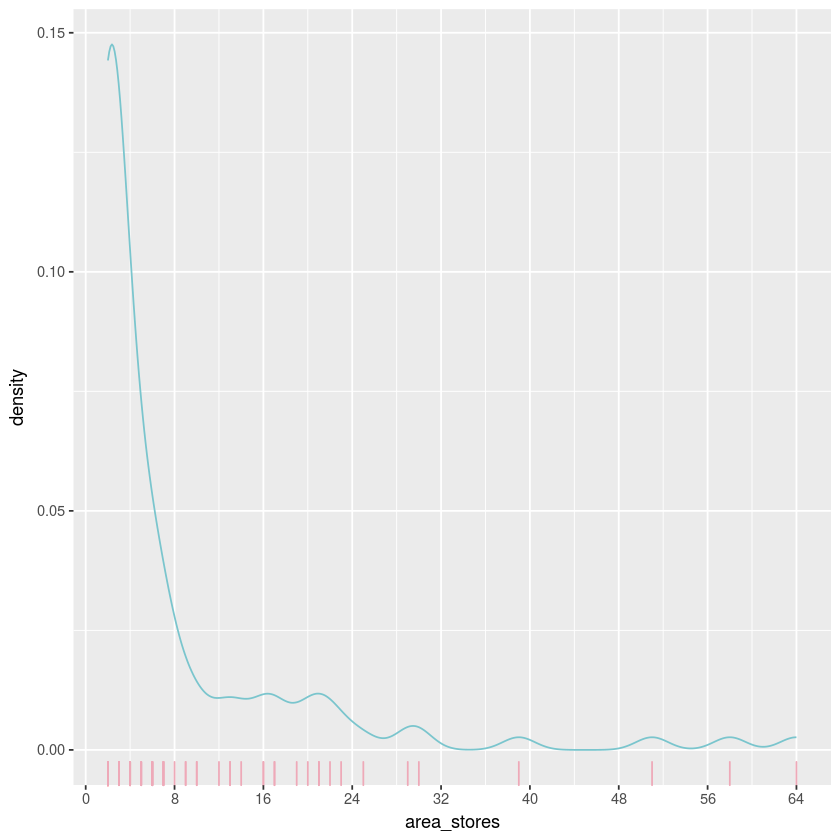

In [163]:
ggplot(store.area, aes(x = stores)) + 
  geom_line(colour = "cadetblue3", stat = "density") +
  scale_x_continuous(breaks = seq(0, 64, 8)) +
  geom_rug(colour = "pink2") 

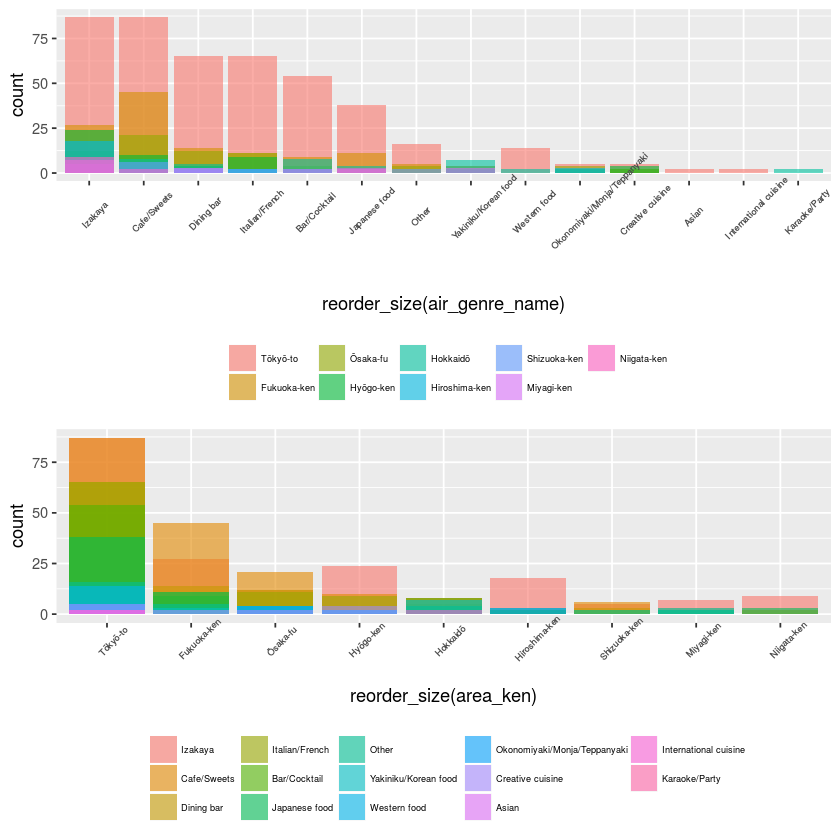

In [162]:
reorder_size <- function(x) {
  factor(x, levels = names(sort(table(x), decreasing = TRUE)))
}

gk <- ggplot(data = store, mapping = aes(x = reorder_size(air_genre_name), fill = reorder_size(area_ken))) + 
        geom_bar(alpha = 3/5, position = "identity") +
        theme(legend.position = "bottom", 
              legend.title = element_blank(),
              legend.text = element_text(size = 5.5), 
              axis.text.x = element_text(size = 5.5, vjust = 0.7, hjust = 0.3, angle = 45))

kg <- ggplot(data = store, mapping = aes(x = reorder_size(area_ken), fill = reorder_size(air_genre_name))) + 
        geom_bar(alpha = 3/5, position = "identity") +
        theme(legend.position = "bottom", 
              legend.title = element_blank(),
              legend.text = element_text(size = 5.5), 
              axis.text.x = element_text(size = 5.5, vjust = 0.7, hjust = 0.3, angle = 45))

multiplot(gk, kg)

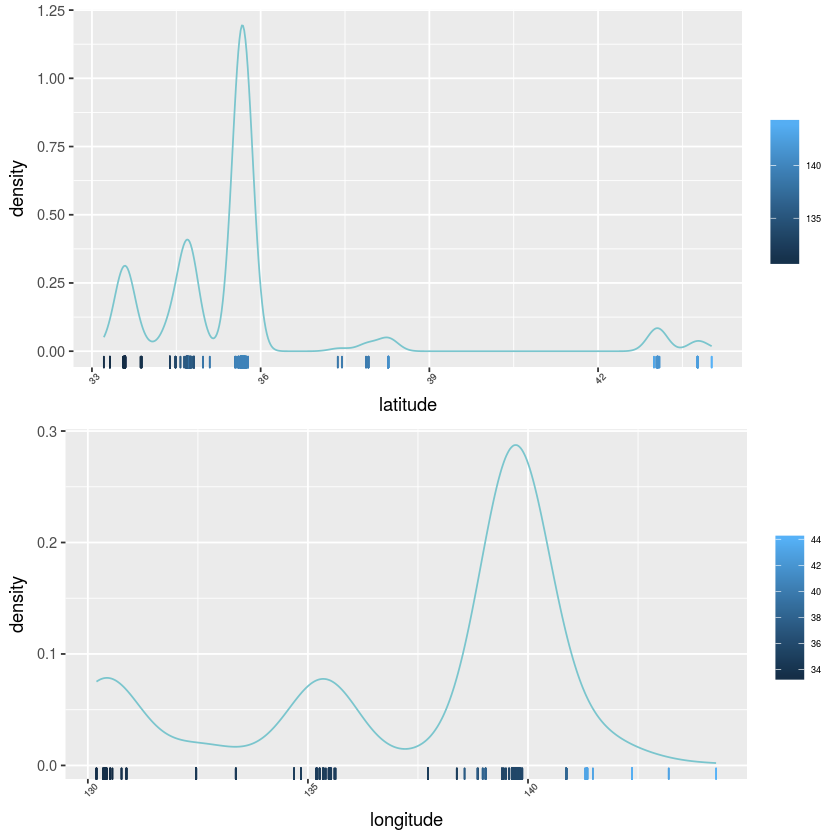

In [193]:
la <- ggplot(data = store.air, mapping = aes(x = latitude)) + 
        geom_line(colour = "cadetblue3", stat = "density") +
        geom_rug(aes(colour = longitude), sides = "b") +
        theme(legend.title = element_blank(),
              legend.text = element_text(size = 5.5), 
              axis.text.x = element_text(size = 5.5, vjust = 0.7, hjust = 0.3, angle = 45))

lg <- ggplot(data = store.air, mapping = aes(x = longitude)) + 
        geom_line(colour = "cadetblue3", stat = "density") +
        geom_rug(aes(colour = latitude), sides = "b") +
        theme(legend.title = element_blank(),
              legend.text = element_text(size = 5.5), 
              axis.text.x = element_text(size = 5.5, vjust = 0.7, hjust = 0.3, angle = 45))

multiplot(la, lg)

In [230]:
paste(rep('su', 40), c(1:40), sep = '')

[1] "su1"  "su2"  "su3"  "su4"  "su5"  "su6"  "su7"  "su8"  "su9"  "su10"
[11] "su11" "su12" "su13" "su14" "su15" "su16" "su17" "su18" "su19" "su20"
[21] "su21" "su22" "su23" "su24" "su25" "su26" "su27" "su28" "su29" "su30"
[31] "su31" "su32" "su33" "su34" "su35" "su36" "su37" "su38" "su39" "su40"

In [10]:
## #
solar.hdy <- left_join(visitor, date.info[185:478,], by = c("visit_date" = "calendar_date")) %>%
  filter(holiday_flg == 1, air_store_id %in% substr(visitor.test$id, 0, 20)) %>%
  subset(select = -c(day_of_week, holiday_flg))
hdy <- spread(solar.hdy, key = 'visit_date', value = 'visitors')
hdy[is.na(hdy)] <- 0
write.csv(t(hdy)[-1,], file = "hdy_gru.csv", row.names = FALSE) 

In [41]:
str(t(hdy)[-1,])

 chr [1:20, 1:810] "  0" "  0" "  0" "  0" "21" " 0" " 0" "  0" " 0" " 0" ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:20] "2016-07-18" "2016-08-11" "2016-08-13" "2016-08-14" ...
  ..$ : chr [1:810] "1" "2" "3" "4" ...


In [6]:
library('dplyr')
library('tidyr')
solar.sun <- left_join(visitor, date.info[185:478,], by = c("visit_date" = "calendar_date")) %>%
  filter(holiday_flg == 0, day_of_week == 'Sunday', air_store_id %in% substr(visitor.test$id, 0, 20)) %>%
  subset(select = -c(day_of_week, holiday_flg))
sun <- spread(solar.sun, key = 'visit_date', value = 'visitors')

names(sun) <- c('air_store_id', paste(rep('su', 40), c(1:40), sep = '')) 
sun.data <- sun %>%
  left_join(store.sun, by = 'air_store_id')

sun[is.na(sun)] <- 0
#write.csv(t(sun)[-1,], file = "sun_gru.csv", row.names = FALSE) 

In [9]:
head(sun)

air_store_id         su1 su2 su3 su4 su5 su6 su7 su8 su9 ⋯ su31 su32 su33
1 air_00a91d42b08b08d9  0   0   0   0   0   0   0    0  0  ⋯  0    0    0  
2 air_0241aa3964b7f861 20   3  14  19   3   1  18    9 12  ⋯  6    8    9  
3 air_0328696196e46f18 11   4   3  19   7   0   0    8  0  ⋯ 41    5    0  
4 air_034a3d5b40d5b1b1  5  13  15  10  16   5   6    2 17  ⋯ 22   64   57  
5 air_036d4f1ee7285390 37  52  10  21  23  23  31  188 25  ⋯  8   18   23  
6 air_0382c794b73b51ad 32  32  26  36  21  23  23   26 19  ⋯ 34   37   43  
  su34 su35 su36 su37 su38 su39 su40
1  0    0    0    0    0    0    0  
2  5    3   12    6   13   10   10  
3 17    0   29    0    0    0    3  
4 33   41   42   25   30   37   39  
5  7   23   25   15   28   15   30  
6 36   43   44   33   40   32   40

In [7]:
solar.mon <- left_join(visitor, date.info[185:478,], by = c("visit_date" = "calendar_date")) %>%
  filter(holiday_flg == 0, day_of_week == 'Monday', air_store_id %in% substr(visitor.test$id, 0, 20)) %>%
  subset(select = -c(day_of_week, holiday_flg))
mon <- spread(solar.mon, key = 'visit_date', value = 'visitors')
mon[is.na(mon)] <- 0
##write.csv(t(mon)[-1,], file = "mon_gru.csv", row.names = FALSE) 

solar.tyr <- left_join(visitor, date.info[185:478,], by = c("visit_date" = "calendar_date")) %>%
  filter(holiday_flg == 0, day_of_week == 'Tuesday', air_store_id %in% substr(visitor.test$id, 0, 20)) %>%
  subset(select = -c(day_of_week, holiday_flg))
tyr <- spread(solar.tyr, key = 'visit_date', value = 'visitors')
tyr[is.na(tyr)] <- 0
##write.csv(t(tyr)[-1,], file = "tyr_gru.csv", row.names = FALSE) 

solar.woden <- left_join(visitor, date.info[185:478,], by = c("visit_date" = "calendar_date")) %>%
  filter(holiday_flg == 0, day_of_week == 'Wednesday', air_store_id %in% substr(visitor.test$id, 0, 20)) %>%
  subset(select = -c(day_of_week, holiday_flg))
woden <- spread(solar.woden, key = 'visit_date', value = 'visitors') 
woden[is.na(woden)] <- 0
##write.csv(t(woden)[-1,], file = "woden_gru.csv", row.names = FALSE) 

solar.thor <- left_join(visitor, date.info[185:478,], by = c("visit_date" = "calendar_date")) %>%
  filter(holiday_flg == 0, day_of_week == 'Thursday', air_store_id %in% substr(visitor.test$id, 0, 20)) %>%
  subset(select = -c(day_of_week, holiday_flg))
thor <- spread(solar.thor, key = 'visit_date', value = 'visitors') 
thor[is.na(thor)] <- 0
##write.csv(t(thor)[-1,], file = "thor_gru.csv", row.names = FALSE) 

solar.freya <- left_join(visitor, date.info[185:478,], by = c("visit_date" = "calendar_date")) %>%
  filter(holiday_flg == 0, day_of_week == 'Friday', air_store_id %in% substr(visitor.test$id, 0, 20)) %>%
  subset(select = -c(day_of_week, holiday_flg))
freya <- spread(solar.freya, key = 'visit_date', value = 'visitors')
freya[is.na(freya)] <- 0
##write.csv(t(freya)[-1,], file = "freya_gru.csv", row.names = FALSE) 

solar.saturn <- left_join(visitor, date.info[185:478,], by = c("visit_date" = "calendar_date")) %>%
  filter(holiday_flg == 0, day_of_week == 'Saturday', air_store_id %in% substr(visitor.test$id, 0, 20)) %>%
  subset(select = -c(day_of_week, holiday_flg))
saturn <- spread(solar.saturn, key = 'visit_date', value = 'visitors')
saturn[is.na(saturn)] <- 0
##write.csv(t(saturn)[-1,], file = "saturn_gru.csv", row.names = FALSE) 

In [ ]:
write.csv(sun.data[,-22:-42][,-16:-21], file = "sun_train_x.csv", row.names = FALSE) 
write.csv(sun.data[,-22:-42][,16:21], file = "sun_train_y.csv", row.names = FALSE) 

write.csv(sun.data[,-2:-21][,-16:-21], file = "sun_test_x.csv", row.names = FALSE) 
write.csv(sun.data[,-2:-21][,16:21], file = "sun_test_y.csv", row.names = FALSE) 

write.csv(sun.data[,-22:-42][,-2:-6], file = "sun_predict.csv", row.names = FALSE) 

In [ ]:
colnames(sun.data)
colnames(sun.data[,-22:-42][,-16:-21])
colnames(sun.data[,-2:-21])
colnames(sun.data[,-2:-21][,-2:-6])

In [62]:
## #
sub.sun <- as.tibble(fread('prediction_sun.csv')) 
row.names(sub.sun) <- subset(subset(date.info[479:517,], holiday_flg == 0), 
                             day_of_week == 'Sunday')$calendar_date
colnames(sub.sun) <- sun$air_store_id
subsun <- melt(t(sub.sun), value.name = 'visitors')

sun.mean5 <- visitor %>%
  filter(visit_date %in% subset(subset(date.info[443:478,], holiday_flg == 0), 
                                day_of_week == 'Sunday')$calendar_date) %>%
  group_by(air_store_id) %>%
  summarise(visitors = mean(visitors))

subsun.positive <- subsun %>%
  filter(visitors >= 1)
subsun.negative <- subsun %>%
  filter(visitors < 1) %>%
  subset(select = -visitors) %>%
  left_join(sun.mean5, by = c('Var1' = 'air_store_id'))

## #
sub.mon <- as.tibble(fread('prediction_mon.csv')) 
row.names(sub.mon) <- subset(subset(date.info[479:517,], holiday_flg == 0), 
                             day_of_week == 'Monday')$calendar_date
colnames(sub.mon) <- mon$air_store_id
submon <- melt(t(sub.mon), value.name = 'visitors')
mon.mean5 <- visitor %>%
  filter(visit_date %in% subset(subset(date.info[443:478,], holiday_flg == 0), 
                                day_of_week == 'Monday')$calendar_date) %>%
  group_by(air_store_id) %>%
  summarise(visitors = mean(visitors))
submon.positive <- submon %>%
  filter(visitors >= 1)
submon.negative <- submon %>%
  filter(visitors < 1) %>%
  subset(select = -visitors) %>%
  left_join(mon.mean5, by = c('Var1' = 'air_store_id'))

## #
sub.tyr <- as.tibble(fread('prediction_tyr.csv')) 
row.names(sub.tyr) <- subset(subset(date.info[479:517,], holiday_flg == 0), 
                             day_of_week == 'Tuesday')$calendar_date
colnames(sub.tyr) <- tyr$air_store_id
subtyr <- melt(t(sub.tyr), value.name = 'visitors')
tyr.mean5 <- visitor %>%
  filter(visit_date %in% subset(subset(date.info[443:478,], holiday_flg == 0), 
                                day_of_week == 'Tuesday')$calendar_date) %>%
  group_by(air_store_id) %>%
  summarise(visitors = mean(visitors))
subtyr.positive <- subtyr %>%
  filter(visitors >= 1)
subtyr.negative <- subtyr %>%
  filter(visitors < 1) %>%
  subset(select = -visitors) %>%
  left_join(tyr.mean5, by = c('Var1' = 'air_store_id'))

## #
sub.woden <- as.tibble(fread('prediction_woden.csv')) 
row.names(sub.woden) <- subset(subset(date.info[479:517,], holiday_flg == 0), 
                               day_of_week == 'Wednesday')$calendar_date
colnames(sub.woden) <- woden$air_store_id
subwoden <- melt(t(sub.woden), value.name = 'visitors')
woden.mean5 <- visitor %>%
  filter(visit_date %in% subset(subset(date.info[443:478,], holiday_flg == 0), 
                                day_of_week == 'Wednesday')$calendar_date) %>%
  group_by(air_store_id) %>%
  summarise(visitors = mean(visitors))
subwoden.positive <- subwoden %>%
  filter(visitors >= 1)
subwoden.negative <- subwoden %>%
  filter(visitors < 1) %>%
  subset(select = -visitors) %>%
  left_join(woden.mean5, by = c('Var1' = 'air_store_id'))

## #
sub.thor <- as.tibble(fread('prediction_thor.csv')) 
row.names(sub.thor) <- subset(subset(date.info[479:517,], holiday_flg == 0), 
                              day_of_week == 'Thursday')$calendar_date
colnames(sub.thor) <- thor$air_store_id
subthor <- melt(t(sub.thor), value.name = 'visitors')
thor.mean5 <- visitor %>%
  filter(visit_date %in% subset(subset(date.info[443:478,], holiday_flg == 0), 
                                day_of_week == 'Thursday')$calendar_date) %>%
  group_by(air_store_id) %>%
  summarise(visitors = mean(visitors))
subthor.positive <- subthor %>%
  filter(visitors >= 1)
subthor.negative <- subthor %>%
  filter(visitors < 1) %>%
  subset(select = -visitors) %>%
  left_join(thor.mean5, by = c('Var1' = 'air_store_id'))

## #
sub.freya <- as.tibble(fread('prediction_freya.csv')) 
row.names(sub.freya) <- subset(subset(date.info[479:517,], holiday_flg == 0), 
                               day_of_week == 'Friday')$calendar_date
colnames(sub.freya) <- freya$air_store_id
subfreya <- melt(t(sub.freya), value.name = 'visitors')
freya.mean5 <- visitor %>%
  filter(visit_date %in% subset(subset(date.info[443:478,], holiday_flg == 0), 
                                day_of_week == 'Friday')$calendar_date) %>%
  group_by(air_store_id) %>%
  summarise(visitors = mean(visitors))
subfreya.positive <- subfreya %>%
  filter(visitors >= 1)
subfreya.negative <- subfreya %>%
  filter(visitors < 1) %>%
  subset(select = -visitors) %>%
  left_join(freya.mean5, by = c('Var1' = 'air_store_id'))

## #
sub.saturn <- as.tibble(fread('prediction_saturn.csv')) 
row.names(sub.saturn) <- subset(subset(date.info[479:517,], holiday_flg == 0), 
                                day_of_week == 'Saturday')$calendar_date
colnames(sub.saturn) <- saturn$air_store_id
subsaturn <- melt(t(sub.saturn), value.name = 'visitors')
saturn.mean5 <- visitor %>%
  filter(visit_date %in% subset(subset(date.info[443:478,], holiday_flg == 0), 
                                day_of_week == 'Saturday')$calendar_date) %>%
  group_by(air_store_id) %>%
  summarise(visitors = mean(visitors))
subsaturn.positive <- subsaturn %>%
  filter(visitors >= 1)
subsaturn.negative <- subsaturn %>%
  filter(visitors < 1) %>%
  subset(select = -visitors) %>%
  left_join(saturn.mean5, by = c('Var1' = 'air_store_id'))

## #
sub.hdy <- as.tibble(fread('prediction_hdy.csv')) 
row.names(sub.hdy) <- subset(date.info[479:517,], holiday_flg == 1)$calendar_date
colnames(sub.hdy) <- hdy$air_store_id
subhdy <- melt(t(sub.hdy), value.name = 'visitors')
hdy.mean5 <- visitor %>%
  filter(visit_date %in% subset(date.info[443:478,]$calendar_date, 
                                date.info$holiday_flg == 1)[2:4]) %>%
  group_by(air_store_id) %>%
  summarise(visitors = mean(visitors))
subhdy.positive <- subhdy %>%
  filter(visitors >= 1)
subhdy.negative <- subhdy %>%
  filter(visitors < 1) %>%
  subset(select = -visitors) %>%
  left_join(hdy.mean5, by = c('Var1' = 'air_store_id'))


Warning message:
“Setting row names on a tibble is deprecated.”Warning message:
“Column `Var1`/`air_store_id` joining factor and character vector, coercing into character vector”Warning message:
“Setting row names on a tibble is deprecated.”Warning message:
“Column `Var1`/`air_store_id` joining factor and character vector, coercing into character vector”Warning message:
“Setting row names on a tibble is deprecated.”Warning message:
“Column `Var1`/`air_store_id` joining factor and character vector, coercing into character vector”Warning message:
“Setting row names on a tibble is deprecated.”Warning message:
“Column `Var1`/`air_store_id` joining factor and character vector, coercing into character vector”Warning message:
“Setting row names on a tibble is deprecated.”Warning message:
“Column `Var1`/`air_store_id` joining factor and character vector, coercing into character vector”Warning message:
“Setting row names on a tibble is deprecated.”Warning message:
“Column `Var1`/`air_store_id` 

In [80]:
str(subsun.negative)
str(subsun.positive)
str(subsun)

'data.frame':	532 obs. of  3 variables:
 $ Var1    : chr  "air_0328696196e46f18" "air_03963426c9312048" "air_07bb665f9cdfbdfb" "air_084d98859256acf0" ...
 $ Var2    : Factor w/ 6 levels "2017-04-23","2017-04-30",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ visitors: num  4.75 28 34.25 13.25 25.8 ...
'data.frame':	4178 obs. of  3 variables:
 $ Var1    : Factor w/ 785 levels "air_00a91d42b08b08d9",..: 1 2 4 5 6 8 9 10 11 12 ...
 $ Var2    : Factor w/ 6 levels "2017-04-23","2017-04-30",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ visitors: num  0.119 2.002 40.015 22.069 43.881 ...
'data.frame':	4710 obs. of  3 variables:
 $ Var1    : Factor w/ 785 levels "air_00a91d42b08b08d9",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Var2    : Factor w/ 6 levels "2017-04-23","2017-04-30",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ visitors: num  0.119 2.002 -0.801 40.015 22.069 ...


In [39]:
subset(date.info[185:478,], holiday_flg == 1)$calendar_date

[1] "2016-07-18" "2016-08-11" "2016-08-13" "2016-08-14" "2016-08-15"
 [6] "2016-09-19" "2016-09-22" "2016-10-10" "2016-11-03" "2016-11-23"
[11] "2016-12-23" "2016-12-29" "2016-12-30" "2016-12-31" "2017-01-01"
[16] "2017-01-02" "2017-01-03" "2017-01-09" "2017-02-11" "2017-03-20"

In [60]:
subset(subset(date.info[443:478,], holiday_flg == 0), day_of_week == 'Saturday')$calendar_date

[1] "2017-03-18" "2017-03-25" "2017-04-01" "2017-04-08" "2017-04-15"
[6] "2017-04-22"

In [51]:
subset(subset(date.info[479:517,], holiday_flg == 0), day_of_week == 'Sunday')$calendar_date

calendar_date day_of_week holiday_flg
1 2017-04-23    Sunday      0          
2 2017-04-30    Sunday      0          
3 2017-05-07    Sunday      0          
4 2017-05-14    Sunday      0          
5 2017-05-21    Sunday      0          
6 2017-05-28    Sunday      0

In [ ]:
## #
solar.na <- visitor %>%
  filter(visit_date %in% date.info[443:478,]$calendar_date) %>%
  group_by(air_store_id) %>%
  summarise(visitors = mean(visitors))

solar <- subsun.positive %>%
  bind_rows(subsun.negative, submon.positive, submon.negative, subtyr.positive, subtyr.negative, subwoden.positive, 
            subwoden.negative, subthor.positive, subthor.negative, subfreya.positive, subfreya.negative, 
            subsaturn.positive, subsaturn.negative, subhdy.positive, subhdy.negative) %>%
  unite(id, Var1, Var2, sep = '_')

solarsystem <- left_join(visitor.test[,-2], subset(solar, is.na(visitors) == FALSE), by = 'id') 

solar.missing <- subset(solarsystem, is.na(visitors) == TRUE) %>%
  subset(select = -visitors) %>%
  separate(id, into = c('air', 'store_id', 'visit_date'), sep = '_') %>%
  unite(air_store_id, air, store_id, sep = '_') %>%
  left_join(solar.na, by = 'air_store_id') %>%
  unite(id, air_store_id, visit_date, sep = '_')

galaxy <- visitor.test[,-2] %>%
  left_join(bind_rows(subset(solarsystem, is.na(visitors) == FALSE), solar.missing), by = 'id') 
#  mutate(visitors = ceiling(visitors))
write.csv(galaxy, file = "solar_submission.csv", row.names = FALSE) 

In [154]:
summary(solarsystem$visitors)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   1.00    8.00   16.19   20.86   29.00  776.02    1760 

In [149]:
summary(solar.missing$visitors)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.542  11.000  19.421  23.447  32.750  92.600 

In [151]:
str(solarsystem)
str(solar.missing)

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	32019 obs. of  2 variables:
 $ id      : chr  "air_00a91d42b08b08d9_2017-04-23" "air_00a91d42b08b08d9_2017-04-24" "air_00a91d42b08b08d9_2017-04-25" "air_00a91d42b08b08d9_2017-04-26" ...
 $ visitors: num  NA 17 28 41 40 ...
Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	1760 obs. of  2 variables:
 $ id      : chr  "air_00a91d42b08b08d9_2017-04-23" "air_00a91d42b08b08d9_2017-04-30" "air_00a91d42b08b08d9_2017-05-07" "air_00a91d42b08b08d9_2017-05-14" ...
 $ visitors: num  27.9 27.9 27.9 27.9 27.9 ...


In [159]:
str(galaxy)
str(visitor.test)
summary(galaxy$visitors)

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	32019 obs. of  2 variables:
 $ id      : chr  "air_00a91d42b08b08d9_2017-04-23" "air_00a91d42b08b08d9_2017-04-24" "air_00a91d42b08b08d9_2017-04-25" "air_00a91d42b08b08d9_2017-04-26" ...
 $ visitors: num  27.9 17 28 41 40 ...
Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	32019 obs. of  2 variables:
 $ id      : chr  "air_00a91d42b08b08d9_2017-04-23" "air_00a91d42b08b08d9_2017-04-24" "air_00a91d42b08b08d9_2017-04-25" "air_00a91d42b08b08d9_2017-04-26" ...
 $ visitors: int  0 0 0 0 0 0 0 0 0 0 ...
 - attr(*, ".internal.selfref")=<externalptr> 


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   8.007  16.742  21.000  29.133 776.020 

In [ ]:
e571 <- as.tibble(fread('ch_ensemble571.csv'))
e578 <- as.tibble(fread('crrr_en578.csv'))
s668 <- as.tibble(fread('solar_submission668.csv'))

solar.ensemble <- galaxy %>%
  mutate(visitors = ceiling(s668$visitors * 0.5 + e578$visitors * 0.2 + e571$visitors * 0.3))
write.csv(solar.ensemble, file = "solar_en_cei.csv", row.names = FALSE) 

In [164]:
c630 <- as.tibble(fread('recruit_submission_ceiling_630.csv'))
e607 <- as.tibble(fread('chrr_en607.csv'))
s668 <- as.tibble(fread('solar_submission668.csv'))

solar.ensemble <- galaxy %>%
  mutate(visitors = ceiling(s668$visitors * 0.4 + e607$visitors * 0.3 + c630$visitors * 0.3))
write.csv(solar.ensemble, file = "sec_en.csv", row.names = FALSE) 

In [166]:
c1 <- as.tibble(fread('ch_ensemble571.csv'))
s2 <- as.tibble(fread('sec_en571.csv'))
s1 <- as.tibble(fread('solar_en_cei564.csv'))
s0 <- as.tibble(fread('solar_en552.csv'))

solar.ensemble <- galaxy %>%
  mutate(visitors = floor(s0$visitors * 0.25 + s1$visitors * 0.25 + s2$visitors * 0.25 + c1$visitors * 0.25))
write.csv(solar.ensemble, file = "en4_5.csv", row.names = FALSE) 

In [62]:
sur <- as.tibble(fread('sur_submission483.csv'))
gru <- as.tibble(fread('solar_en552.csv'))
gr2 <- as.tibble(fread('solar_en_cei564.csv'))

sg.en1 <- sur %>%
  mutate(visitors = floor(sur$visitors * 0.7 + gru$visitors * 0.2 + gru$visitors * 0.1))
write.csv(sg.en1, file = 'sg_en1.csv', row.names = FALSE)

sg.en2 <- sur %>%
  mutate(visitors = floor((sur$visitors * gru$visitors * gr2$visitors)^(1/3)))
write.csv(sg.en2, file = 'sg_en2.csv', row.names = FALSE)

sg.en3 <- sur %>%
  mutate(visitors = (sur$visitors * gru$visitors)^(1/2))
write.csv(sg.en3, file = 'sg_en3.csv', row.names = FALSE)

In [39]:
recruit.test <- visitor.test %>%
  separate(id, into = c('air', 'store_id', 'visit_date'), sep = '_') %>%
  unite(air_store_id, air, store_id, sep = '_')

recruit <- left_join(bind_rows(visitor, recruit.test), date.info, by = c("visit_date" = "calendar_date"))%>%
  filter(visit_date %in% date.info[185:517,]$calendar_date) %>%
  left_join(store, by = 'air_store_id') %>%
  mutate(air_store_id = as.factor(air_store_id), 
         visit_date = as.factor(visit_date), 
         day_of_week = as.factor(day_of_week), 
         holiday_flg = as.factor(holiday_flg), 
         air_area_name = as.factor(air_area_name))

In [40]:
str(recruit)

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	234934 obs. of  19 variables:
 $ air_store_id  : Factor w/ 829 levels "air_00a91d42b08b08d9",..: 604 604 604 604 604 604 604 604 604 604 ...
 $ visit_date    : Factor w/ 333 levels "2016-07-03","2016-07-04",..: 2 3 4 5 6 7 9 10 11 12 ...
 $ visitors      : int  21 24 19 22 29 33 20 28 25 22 ...
 $ day_of_week   : Factor w/ 7 levels "Friday","Monday",..: 2 6 7 5 1 3 2 6 7 5 ...
 $ holiday_flg   : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ air_genre_name: Factor w/ 14 levels "Asian","Bar/Cocktail",..: 5 5 5 5 5 5 5 5 5 5 ...
 $ air_area_name : Factor w/ 103 levels "Fukuoka-ken Fukuoka-shi Daimyō",..: 75 75 75 75 75 75 75 75 75 75 ...
 $ area_ken      : Factor w/ 9 levels "Fukuoka-ken",..: 9 9 9 9 9 9 9 9 9 9 ...
 $ area_shi      : Factor w/ 55 levels "Abashiri-shi",..: 30 30 30 30 30 30 30 30 30 30 ...
 $ area_local    : Factor w/ 99 levels "6","Akasaka",..: 82 82 82 82 82 82 82 82 82 82 ...
 $ latitude      : num  35.7 35.7 35.7 35.7

In [46]:
str(subset(recruit, visit_date %in% date.info[185:478,]$calendar_date))

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	202915 obs. of  19 variables:
 $ air_store_id  : Factor w/ 829 levels "air_00a91d42b08b08d9",..: 604 604 604 604 604 604 604 604 604 604 ...
 $ visit_date    : Factor w/ 333 levels "2016-07-03","2016-07-04",..: 2 3 4 5 6 7 9 10 11 12 ...
 $ visitors      : int  21 24 19 22 29 33 20 28 25 22 ...
 $ day_of_week   : Factor w/ 7 levels "Friday","Monday",..: 2 6 7 5 1 3 2 6 7 5 ...
 $ holiday_flg   : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ air_genre_name: Factor w/ 14 levels "Asian","Bar/Cocktail",..: 5 5 5 5 5 5 5 5 5 5 ...
 $ air_area_name : Factor w/ 103 levels "Fukuoka-ken Fukuoka-shi Daimyō",..: 75 75 75 75 75 75 75 75 75 75 ...
 $ area_ken      : Factor w/ 9 levels "Fukuoka-ken",..: 9 9 9 9 9 9 9 9 9 9 ...
 $ area_shi      : Factor w/ 55 levels "Abashiri-shi",..: 30 30 30 30 30 30 30 30 30 30 ...
 $ area_local    : Factor w/ 99 levels "6","Akasaka",..: 82 82 82 82 82 82 82 82 82 82 ...
 $ latitude      : num  35.7 35.7 35.7 35.7

In [42]:
require(Matrix)
recruit.sparse <- sparse.model.matrix(visitors +
                                      latitude + longitude + mean_la + mean_lg + dist_vertical + dist_horizon +
                                      center + tier + stores ~.-1, recruit)

In [43]:
str(recruit.sparse)
recruit.sparse

Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  ..@ i       : int [1:1796888] 71340 71341 71342 71343 71344 71345 71346 71347 71348 71349 ...
  ..@ p       : int [1:1444] 0 269 457 735 890 1178 1496 1797 2088 2417 ...
  ..@ Dim     : int [1:2] 234934 1443
  ..@ Dimnames:List of 2
  .. ..$ : chr [1:234934] "1" "2" "3" "4" ...
  .. ..$ : chr [1:1443] "air_store_idair_00a91d42b08b08d9" "air_store_idair_0164b9927d20bcc3" "air_store_idair_0241aa3964b7f861" "air_store_idair_0328696196e46f18" ...
  ..@ x       : num [1:1796888] 1 1 1 1 1 1 1 1 1 1 ...
  ..@ factors : list()


   [[ suppressing 31 column names ‘air_store_idair_00a91d42b08b08d9’, ‘air_store_idair_0164b9927d20bcc3’, ‘air_store_idair_0241aa3964b7f861’ ... ]]
   [[ suppressing 31 column names ‘air_store_idair_00a91d42b08b08d9’, ‘air_store_idair_0164b9927d20bcc3’, ‘air_store_idair_0241aa3964b7f861’ ... ]]
   [[ suppressing 31 column names ‘air_store_idair_00a91d42b08b08d9’, ‘air_store_idair_0164b9927d20bcc3’, ‘air_store_idair_0241aa3964b7f861’ ... ]]


234934 x 1443 sparse Matrix of class "dgCMatrix"
                                                                         
1    . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . ......
2    . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . ......
3    . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . ......
4    . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . ......
5    . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . ......
6    . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . ......
7    . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . ......
8    . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . ......
9    . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . ......
10   . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . ......
11   . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . ......
12   . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

In [23]:
head(recruit)

air_store_id         visit_date visitors day_of_week holiday_flg
1 air_ba937bf13d40fb24 2016-07-04 21       Monday      0          
2 air_ba937bf13d40fb24 2016-07-05 24       Tuesday     0          
3 air_ba937bf13d40fb24 2016-07-06 19       Wednesday   0          
4 air_ba937bf13d40fb24 2016-07-07 22       Thursday    0          
5 air_ba937bf13d40fb24 2016-07-08 29       Friday      0          
6 air_ba937bf13d40fb24 2016-07-09 33       Saturday    0          
  air_genre_name air_area_name                area_ken area_shi  area_local
1 Dining bar     Tōkyō-to Minato-ku Shibakōen Tōkyō-to Minato-ku Shibakōen 
2 Dining bar     Tōkyō-to Minato-ku Shibakōen Tōkyō-to Minato-ku Shibakōen 
3 Dining bar     Tōkyō-to Minato-ku Shibakōen Tōkyō-to Minato-ku Shibakōen 
4 Dining bar     Tōkyō-to Minato-ku Shibakōen Tōkyō-to Minato-ku Shibakōen 
5 Dining bar     Tōkyō-to Minato-ku Shibakōen Tōkyō-to Minato-ku Shibakōen 
6 Dining bar     Tōkyō-to Minato-ku Shibakōen Tōkyō-to Minato-ku Shibakōen 
  latitude longitude mean_la  mean_lg  dist_vertical dist_horizon center    
1 35.65807 139.7516  35.67596 139.7129 0.01789468    0.03865315   0.05654783
2 35.65807 139.7516  35.67596 139.7129 0.01789468    0.03865315   0.05654783
3 35.65807 139.7516  35.67596 139.7129 0.01789468    0.03865315   0.05654783
4 35.65807 139.7516  35.67596 139.7129 0.01789468    0.03865315   0.05654783
5 35.65807 139.7516  35.67596 139.7129 0.01789468    0.03865315   0.05654783
6 35.65807 139.7516  35.67596 139.7129 0.01789468    0.03865315   0.05654783
  tier         stores
1 0.0006916858 51    
2 0.0006916858 51    
3 0.0006916858 51    
4 0.0006916858 51    
5 0.0006916858 51    
6 0.0006916858 51

In [38]:
str

In [45]:
library(xgboost)
help(xgboost)


Attaching package: ‘xgboost’

The following object is masked from ‘package:dplyr’:

    slice



In [54]:
library(xgboost)
mosaic <- xgboost(data = recruit[,11:19][1:202915,], 
                  label = recruit[1:202915,]$visitors,
                  eta = 0.15,
                  max_depth = 10, 
                  nround = 25, 
                  subsample = 0.78, 
                  colsample_bytree = 0.8, 
                  seed = 7)

v_pred <- predict(mosaic, recruit[,11:19][202916:234934,])

Warning message in xgb.get.DMatrix(data, label, missing, weight):
“xgboost: label will be ignored.”Warning message in if (inClass == "character") {:
“the condition has length > 1 and only the first element will be used”Warning message in if (inClass == "xgb.DMatrix") {:
“the condition has length > 1 and only the first element will be used”Warning message in if (inClass == "data.frame") {:
“the condition has length > 1 and only the first element will be used”

ERROR: Error in xgb.get.DMatrix(data, label, missing, weight): xgboost: Invalid input of data


In [50]:
str(recruit.sparse[1:202915,])

Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  ..@ i       : int [1:1549552] 71340 71341 71342 71343 71344 71345 71346 71347 71348 71349 ...
  ..@ p       : int [1:1444] 0 230 379 618 734 983 1262 1524 1776 2066 ...
  ..@ Dim     : int [1:2] 202915 1443
  ..@ Dimnames:List of 2
  .. ..$ : chr [1:202915] "1" "2" "3" "4" ...
  .. ..$ : chr [1:1443] "air_store_idair_00a91d42b08b08d9" "air_store_idair_0164b9927d20bcc3" "air_store_idair_0241aa3964b7f861" "air_store_idair_0328696196e46f18" ...
  ..@ x       : num [1:1549552] 1 1 1 1 1 1 1 1 1 1 ...
  ..@ factors : list()


In [51]:
str(recruit[,3][1:202915,])

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	202915 obs. of  1 variable:
 $ visitors: int  21 24 19 22 29 33 20 28 25 22 ...
